# NETTOYAGE ET ANALYSE EXPLORATOIRE

# Objectifs :

- Segmentation des clients utile au quotidien pour leurs campagnes de communication.

- Compréhension des différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

- Description utilisable de segmentation.

- Logique sous-jacente pour une utilisation optimale.

- Proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Importation des Bibliothèques et Mise en Forme :

In [2]:
# Installation des Bibliothèques :

import matplotlib.pyplot as plt
import matplotlib.colors 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import os
import missingno as msno
import warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from time import time
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kmodes.kprototypes import KPrototypes

In [3]:
# Modification des Affichages de Colonnes, Lignes et Largeurs de Colonnes pour avoir un Maximum d'Informations :

pd.set_option('display.max_columns', 400)

pd.set_option('display.max_rows', 200)

pd.set_option('display.max_colwidth', -100)

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_98145/2796369751.py:7: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



# I Traitement des Fichiers Initiaux et Dataframes de Départ :

# A- Fichier "olist_customers_dataset" :

In [4]:
# Chargement et Visualisation du fichier csv "olist_customers" :

clients_dataset = pd.read_csv('olist_customers_dataset.csv')

clients_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [5]:
# Mise en Majuscule :

clients_dataset['customer_city'] = clients_dataset['customer_city'].str.capitalize()

In [6]:
# Données Statistiques : 

clients_dataset.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
# Listage des colonnes constituant la dataframe initiale :

clients_dataset.columns.to_list()

['customer_id',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state']

# Compréhension des Variables :


- customer_id  / Jeton d'identification client pour chaque commande / Clé unique
- customer_unique_id / Identifiant technique unique pour chaque client / Clé d'un Client
- customer_zip_code_prefix / Code Postal de la Ville du Client 
- customer_city / Ville de Résidence du Client
- customer_state / Etat de Résidence du Client

In [8]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

clients_dataset.shape

(99441, 5)

In [9]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

clients_dataset.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    int64 
customer_city               object
customer_state              object
dtype: object

In [10]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

clients_dataset.duplicated().sum()

0

<AxesSubplot:>

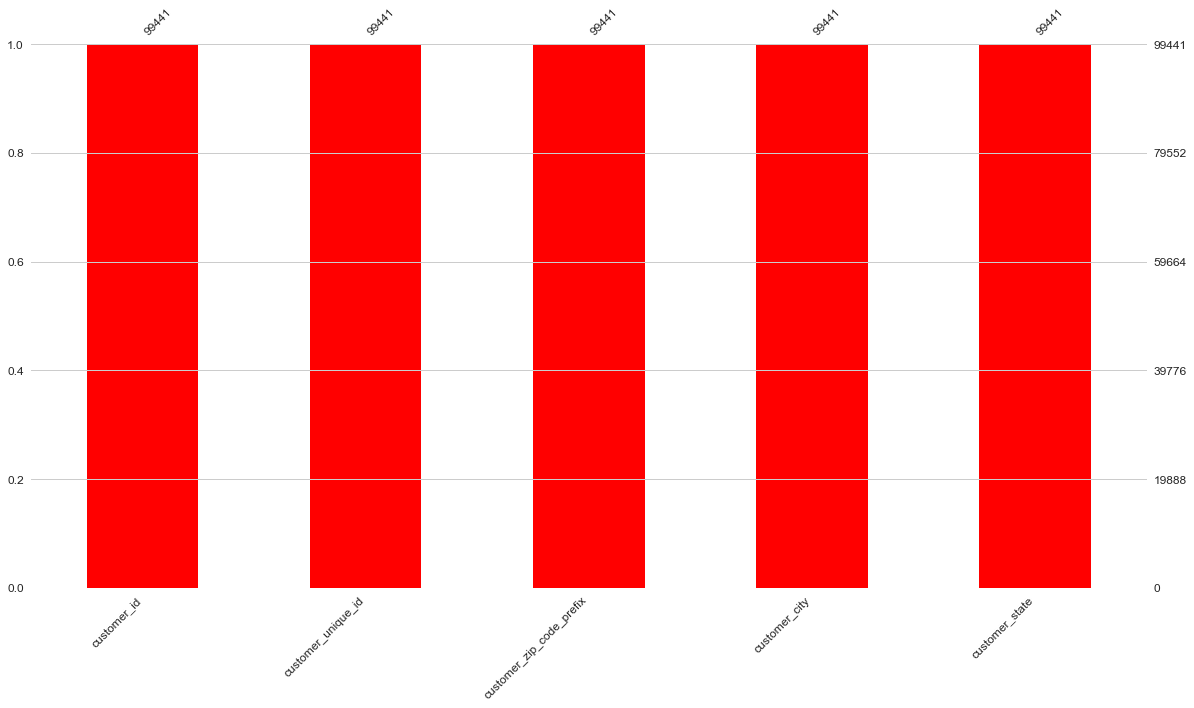

In [11]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

msno.bar(clients_dataset, sort = "ascending", color = "red", figsize = (20,10), fontsize = 12)

<AxesSubplot:>

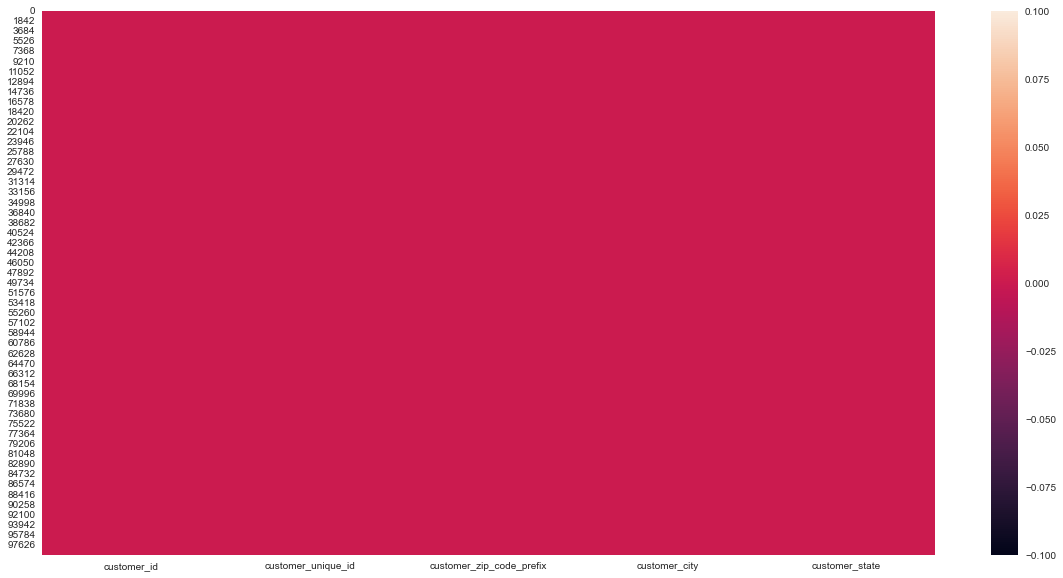

In [12]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(clients_dataset.isnull())

In [13]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count1 = clients_dataset.isnull().sum()

missing_count1

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count1 = clients_dataset.isnull().count()

value_count1

customer_id                 99441
customer_unique_id          99441
customer_zip_code_prefix    99441
customer_city               99441
customer_state              99441
dtype: int64

In [15]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage1 = round((missing_count1 / value_count1) * 100)

In [16]:
# Dataframe des Pourcentages de NaN :

missing_df1 = pd.DataFrame({'Nombre' : missing_count1, 'Pourcentage' : missing_percentage1})

In [17]:
# Dataframe "Missing_df" :

missing_df1

,Nombre,Pourcentage
customer_id,0,0.0
customer_unique_id,0,0.0
customer_zip_code_prefix,0,0.0
customer_city,0,0.0
customer_state,0,0.0


# Observations :

On constate qu'il n'y a aucune NaN dans le dataset.

# Graphiques d'Exploration du Fichier :

# Codes Postaux :

<AxesSubplot:title={'center':'Code Postal avec le Plus de Clients'}, xlabel='Zip Code', ylabel='Count'>

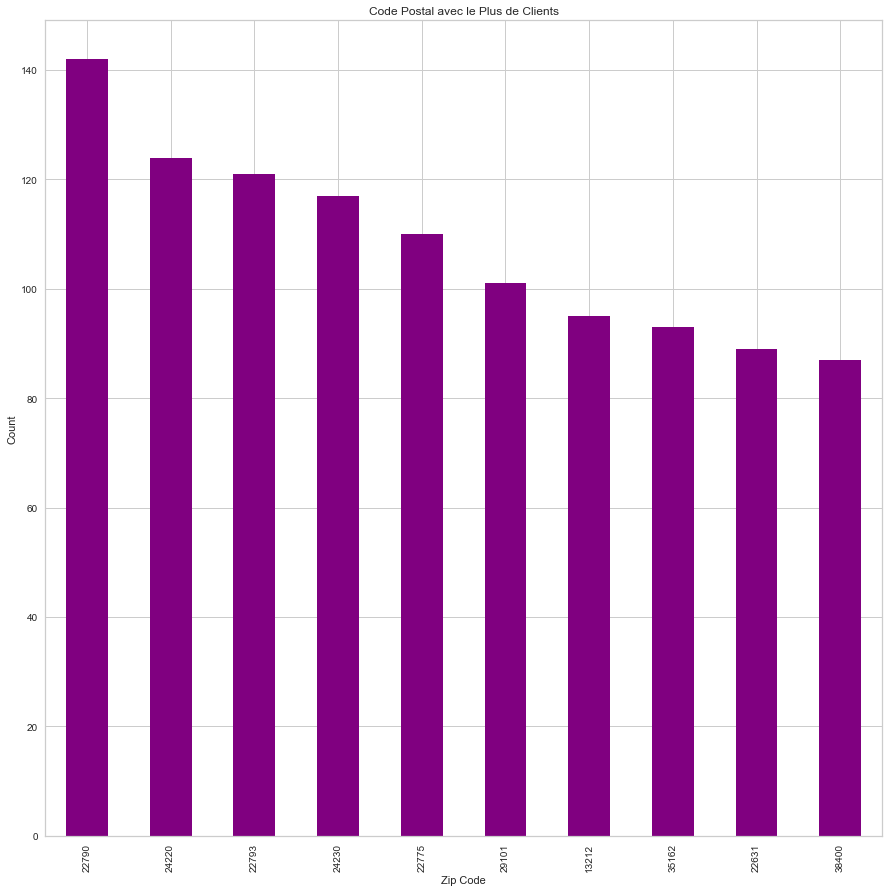

In [18]:
# Histogramme des Dix Premiers Codes Postaux avec le plus de Clients :

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Zip Code")

plt.ylabel("Count")

plt.title("Code Postal avec le Plus de Clients")

clients_dataset.customer_zip_code_prefix.value_counts()[:10].plot(kind='bar', color ='purple')

# Observations : 

Le Code Postal 22790 compte le plus grand nombre de Clients.

# TOP 10 des Villes avec le Plus de Clients :

<AxesSubplot:title={'center':'Villes avec le Plus de Clients'}, xlabel='Villes', ylabel='Count'>

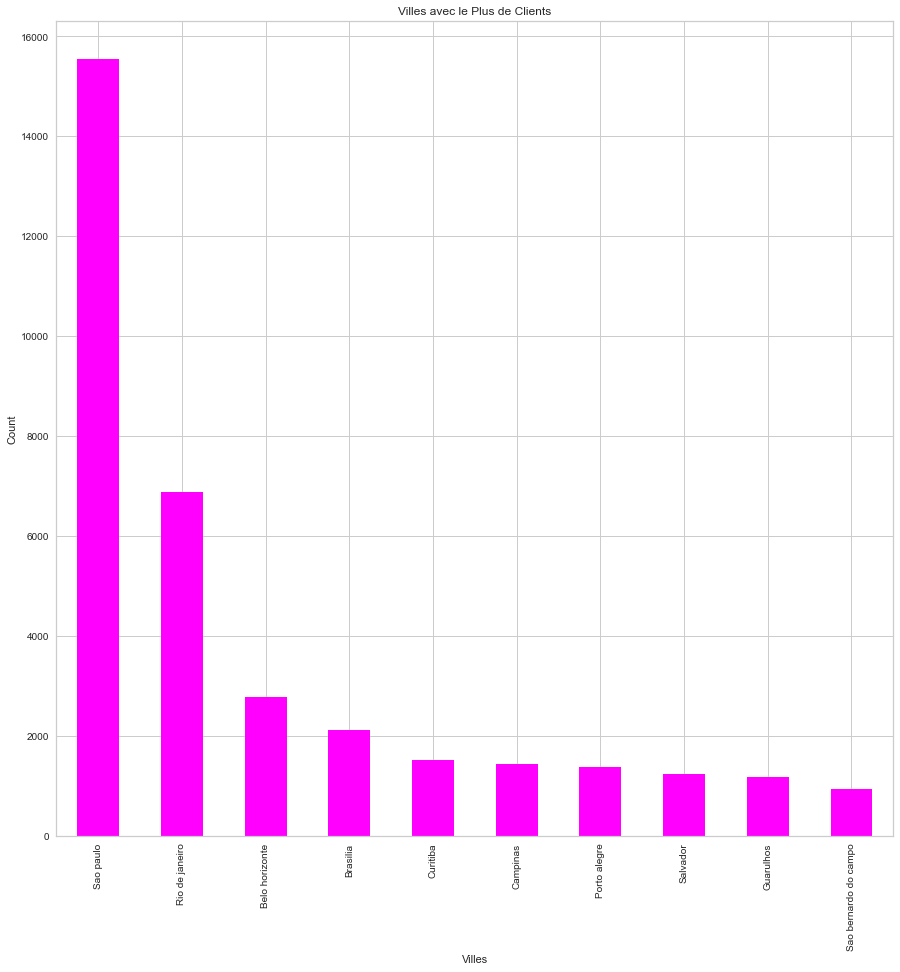

In [19]:
# Histogramme des Dix Premières Villes avec le Plus de Clients :

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Villes")

plt.ylabel("Count")

plt.title("Villes avec le Plus de Clients")

clients_dataset.customer_city.value_counts()[:10].plot(kind='bar',color ='magenta')

# Etats avec le Plus de Clients :

<AxesSubplot:title={'center':'Etats avec le Plus de Clients'}, xlabel='Etats', ylabel='Count'>

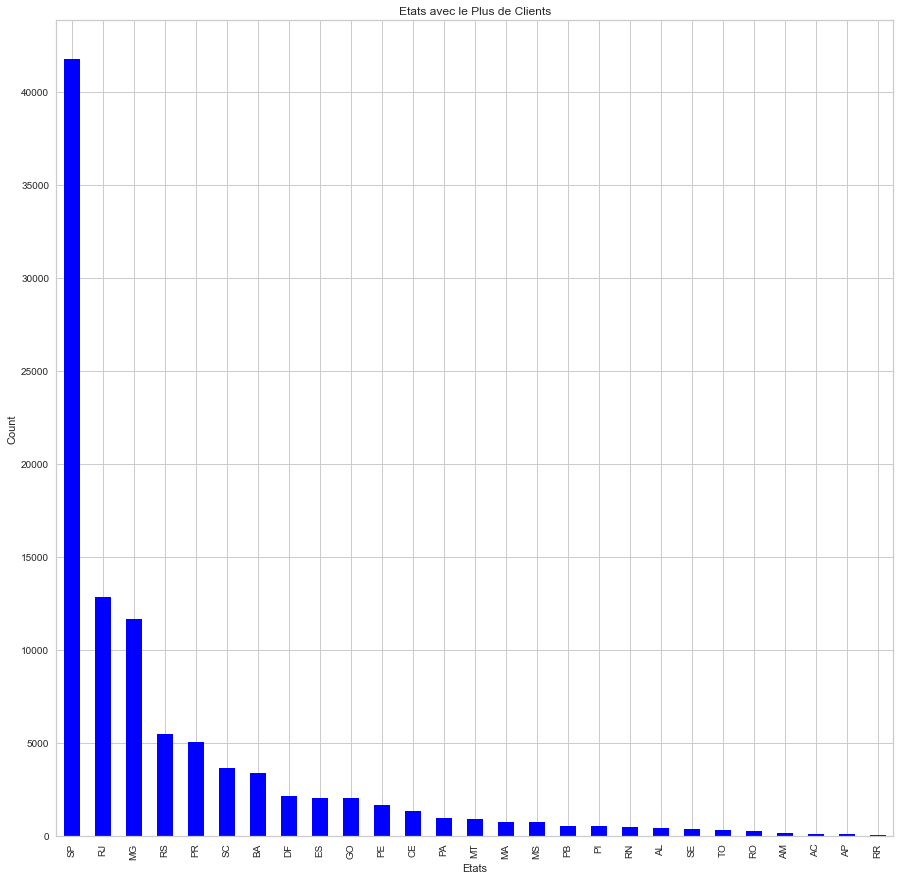

In [20]:
# Histogramme des Etats ayant le Plus de Clients :

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Etats")

plt.ylabel("Count")

plt.title("Etats avec le Plus de Clients")

clients_dataset.customer_state.value_counts().plot(kind='bar',color = 'blue')

# Observations :

L'Etat de Sao Paulo compte le plus grand nombre de Clients.

# B- Fichier "olist_geolocation_dataset" :

In [21]:
# Chargement et Visualisation du fichier csv "olist_customers" :

geolocation_dataset = pd.read_csv('olist_geolocation_dataset.csv')

geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [22]:
# Mise en Majuscule :

geolocation_dataset['geolocation_city'] = geolocation_dataset['geolocation_city'].str.capitalize()

In [23]:
# Données Statistiques : 

geolocation_dataset.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [24]:
# Listage des colonnes constituant la dataframe initiale :

geolocation_dataset.columns.to_list()

['geolocation_zip_code_prefix',
 'geolocation_lat',
 'geolocation_lng',
 'geolocation_city',
 'geolocation_state']

# Compréhension des Variables :

- geolocation_zip_code_prefix / Code postal
- geolocation_lat / Latitude
- geolocation_lng / Longitude
- geolocation_city / Ville
- geolocation_state / État

In [25]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

geolocation_dataset.shape

(1000163, 5)

In [26]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

geolocation_dataset.dtypes

geolocation_zip_code_prefix    int64  
geolocation_lat                float64
geolocation_lng                float64
geolocation_city               object 
geolocation_state              object 
dtype: object

In [27]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

geolocation_dataset.duplicated().sum()

261831

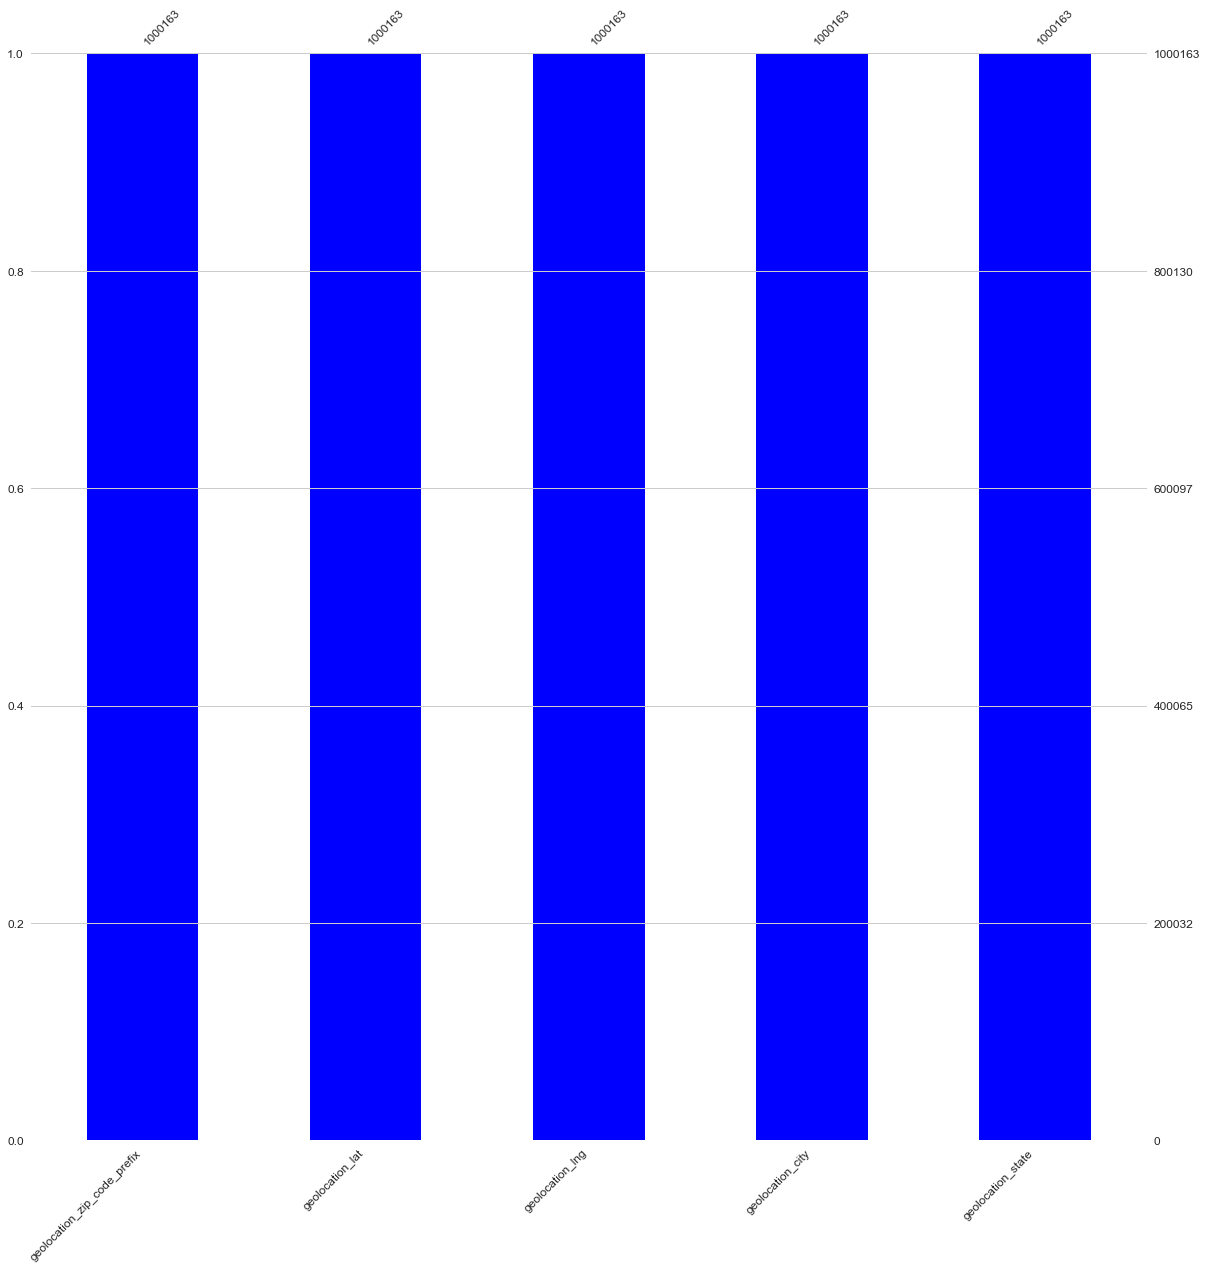

In [28]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

ax = msno.bar(geolocation_dataset, sort = "ascending", color = "blue", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

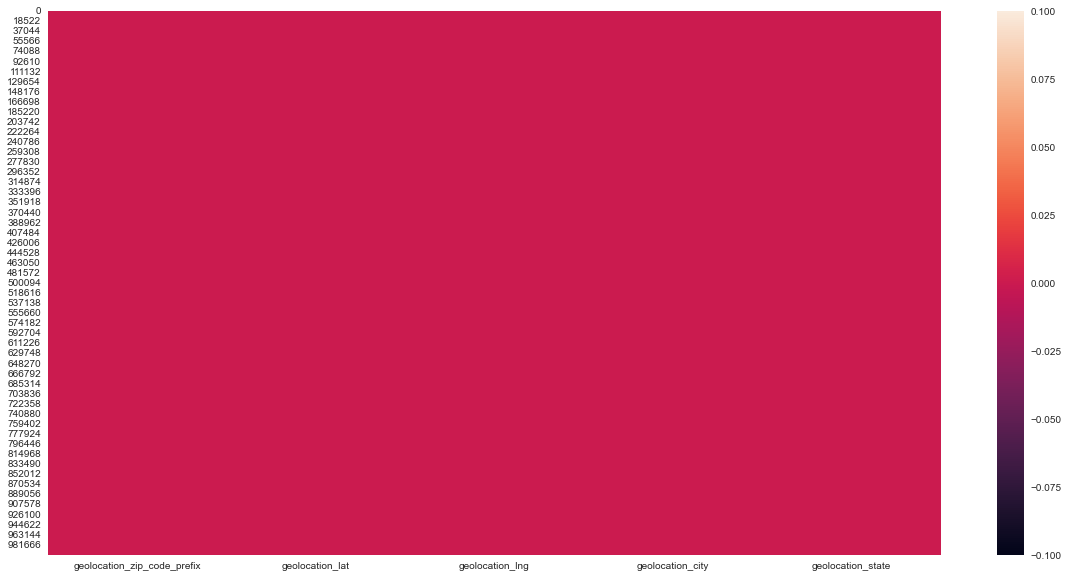

In [29]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(geolocation_dataset.isnull())

In [30]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count2 = geolocation_dataset.isnull().sum()

missing_count2

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [31]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count2 = geolocation_dataset.isnull().count()

value_count2

geolocation_zip_code_prefix    1000163
geolocation_lat                1000163
geolocation_lng                1000163
geolocation_city               1000163
geolocation_state              1000163
dtype: int64

In [32]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage2 = round((missing_count2 / value_count2) * 100)

In [33]:
# Dataframe des Pourcentages de NaN :

missing_df2 = pd.DataFrame({'Nombre' : missing_count2, 'Pourcentage' : missing_percentage2})

In [34]:
# Dataframe "Missing_df" :

missing_df2

,Nombre,Pourcentage
geolocation_zip_code_prefix,0,0.0
geolocation_lat,0,0.0
geolocation_lng,0,0.0
geolocation_city,0,0.0
geolocation_state,0,0.0


# Observations :

Il n'y a aucune NaN dans ce dataset.

# MAP 

In [35]:
# Installation :

import folium

In [36]:
# Visualisation des villes de résidence des clients au Brésil :

geolocation_dataset

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao paulo,SP
1,1046,-23.546081,-46.644820,Sao paulo,SP
2,1046,-23.546129,-46.642951,Sao paulo,SP
3,1041,-23.544392,-46.639499,Sao paulo,SP
4,1035,-23.541578,-46.641607,Sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,Tapejara,RS
1000159,99900,-27.877125,-52.224882,Getulio vargas,RS
1000160,99950,-28.071855,-52.014716,Tapejara,RS
1000161,99980,-28.388932,-51.846871,David canabarro,RS


In [37]:
# Sélection des 200 Premières Lignes de notre Dataset :

selectgeo = geolocation_dataset.iloc[:50,:]

selectgeo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao paulo,SP
1,1046,-23.546081,-46.644820,Sao paulo,SP
2,1046,-23.546129,-46.642951,Sao paulo,SP
3,1041,-23.544392,-46.639499,Sao paulo,SP
4,1035,-23.541578,-46.641607,Sao paulo,SP
5,1012,-23.547762,-46.635361,São paulo,SP
6,1047,-23.546273,-46.641225,Sao paulo,SP
7,1013,-23.546923,-46.634264,Sao paulo,SP
8,1029,-23.543769,-46.634278,Sao paulo,SP
9,1011,-23.547640,-46.636032,Sao paulo,SP


In [38]:
# Paramètrage de la Géolocalisation :

locations = selectgeo[['geolocation_lat', 'geolocation_lng']]

locationlist = locations.values.tolist()

len(locationlist)

locationlist[7]

[-23.546923208436723, -46.6342636964915]

In [39]:
# Folium :

map = folium.Map(location=[-23.546923208436723, -46.6342636964915], zoom_start = 20)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point], popup= selectgeo['geolocation_city'][point]).add_to(map)
    
map

# C- Fichier "olist_order_items_dataset" :

In [40]:
# Chargement et Visualisation du fichier csv "olist_order_items_dataset" :

order_items_dataset = pd.read_csv('olist_order_items_dataset.csv')

order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [41]:
# Données Statistiques : 

order_items_dataset.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [42]:
# Listage des colonnes constituant la dataframe initiale :

order_items_dataset.columns.to_list()

['order_id',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value']

# Compréhension des Variables :

- order_id / identifiant unique de la commande
- order_item_id / numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre
- product_id / identifiant unique du produit
- seller_id / identifiant unique du vendeur
- shipping_limit_date / date limite d'expédition
- price / prix de l'article
- freight_value / frais de transport

In [43]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

order_items_dataset.shape

(112650, 7)

In [44]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

order_items_dataset.dtypes

order_id               object 
order_item_id          int64  
product_id             object 
seller_id              object 
shipping_limit_date    object 
price                  float64
freight_value          float64
dtype: object

In [45]:
# Transformation de la Variable Qualitative "shipping_limit_date" en Datetime :

order_items_dataset['shipping_limit_date'] = pd.to_datetime(order_items_dataset['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

order_items_dataset.dtypes

order_id               object        
order_item_id          int64         
product_id             object        
seller_id              object        
shipping_limit_date    datetime64[ns]
price                  float64       
freight_value          float64       
dtype: object

In [46]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

order_items_dataset.duplicated().sum()

0

<AxesSubplot:>

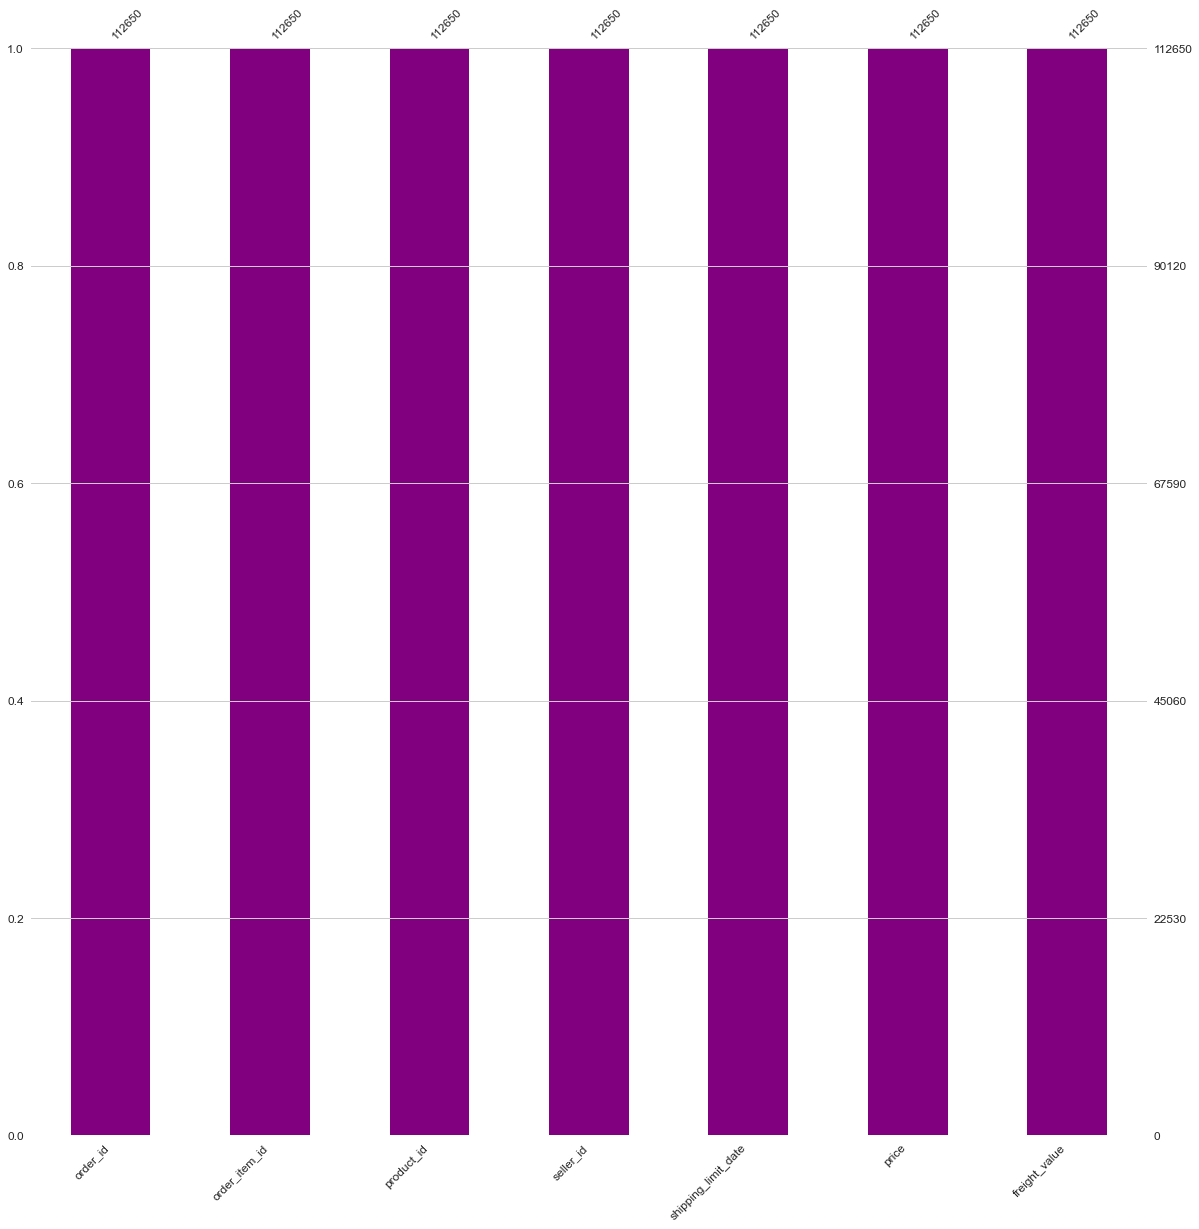

In [47]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

msno.bar(order_items_dataset, sort = "ascending", color = "purple", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

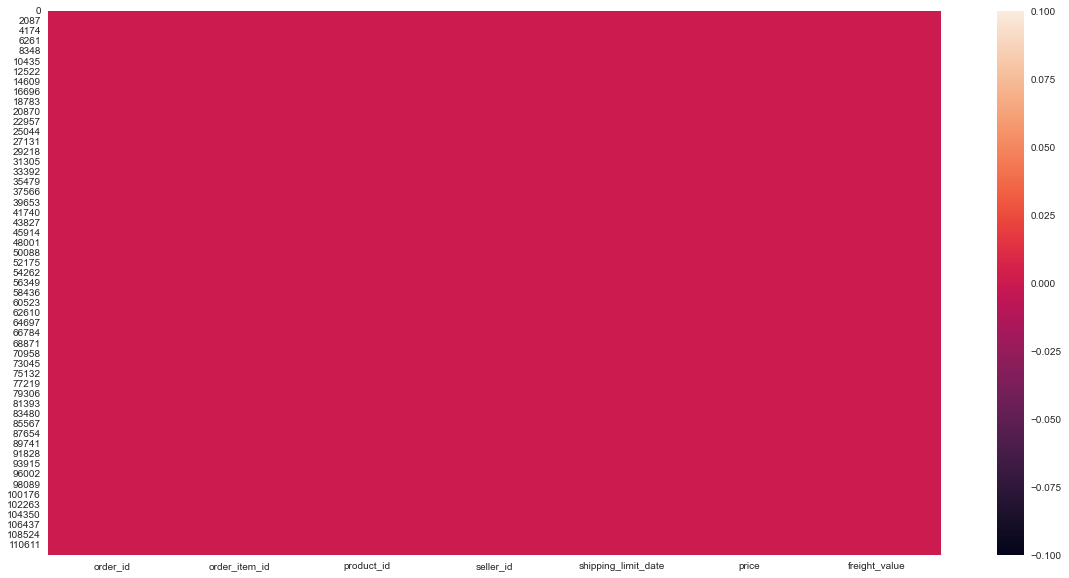

In [48]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(order_items_dataset.isnull())

In [49]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count3 = order_items_dataset.isnull().sum()

missing_count3

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [50]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count3 = order_items_dataset.isnull().count()

value_count3

order_id               112650
order_item_id          112650
product_id             112650
seller_id              112650
shipping_limit_date    112650
price                  112650
freight_value          112650
dtype: int64

In [51]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage3 = round((missing_count3 / value_count3) * 100)

In [52]:
# Dataframe des Pourcentages de NaN :

missing_df3 = pd.DataFrame({'Nombre' : missing_count3, 'Pourcentage' : missing_percentage3})


In [53]:
# Dataframe "Missing_df" :

missing_df3

,Nombre,Pourcentage
order_id,0,0.0
order_item_id,0,0.0
product_id,0,0.0
seller_id,0,0.0
shipping_limit_date,0,0.0
price,0,0.0
freight_value,0,0.0


# Observations :

On constate qu'il n'y a aucune NaN dans ce dataset.

# Graphiques d'Exploration du Fichier :

In [54]:
# Préparation de la Dataframe et Sélection :

priceship = order_items_dataset.iloc[0:10]

priceship

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


# Prix et Date de Livraison :

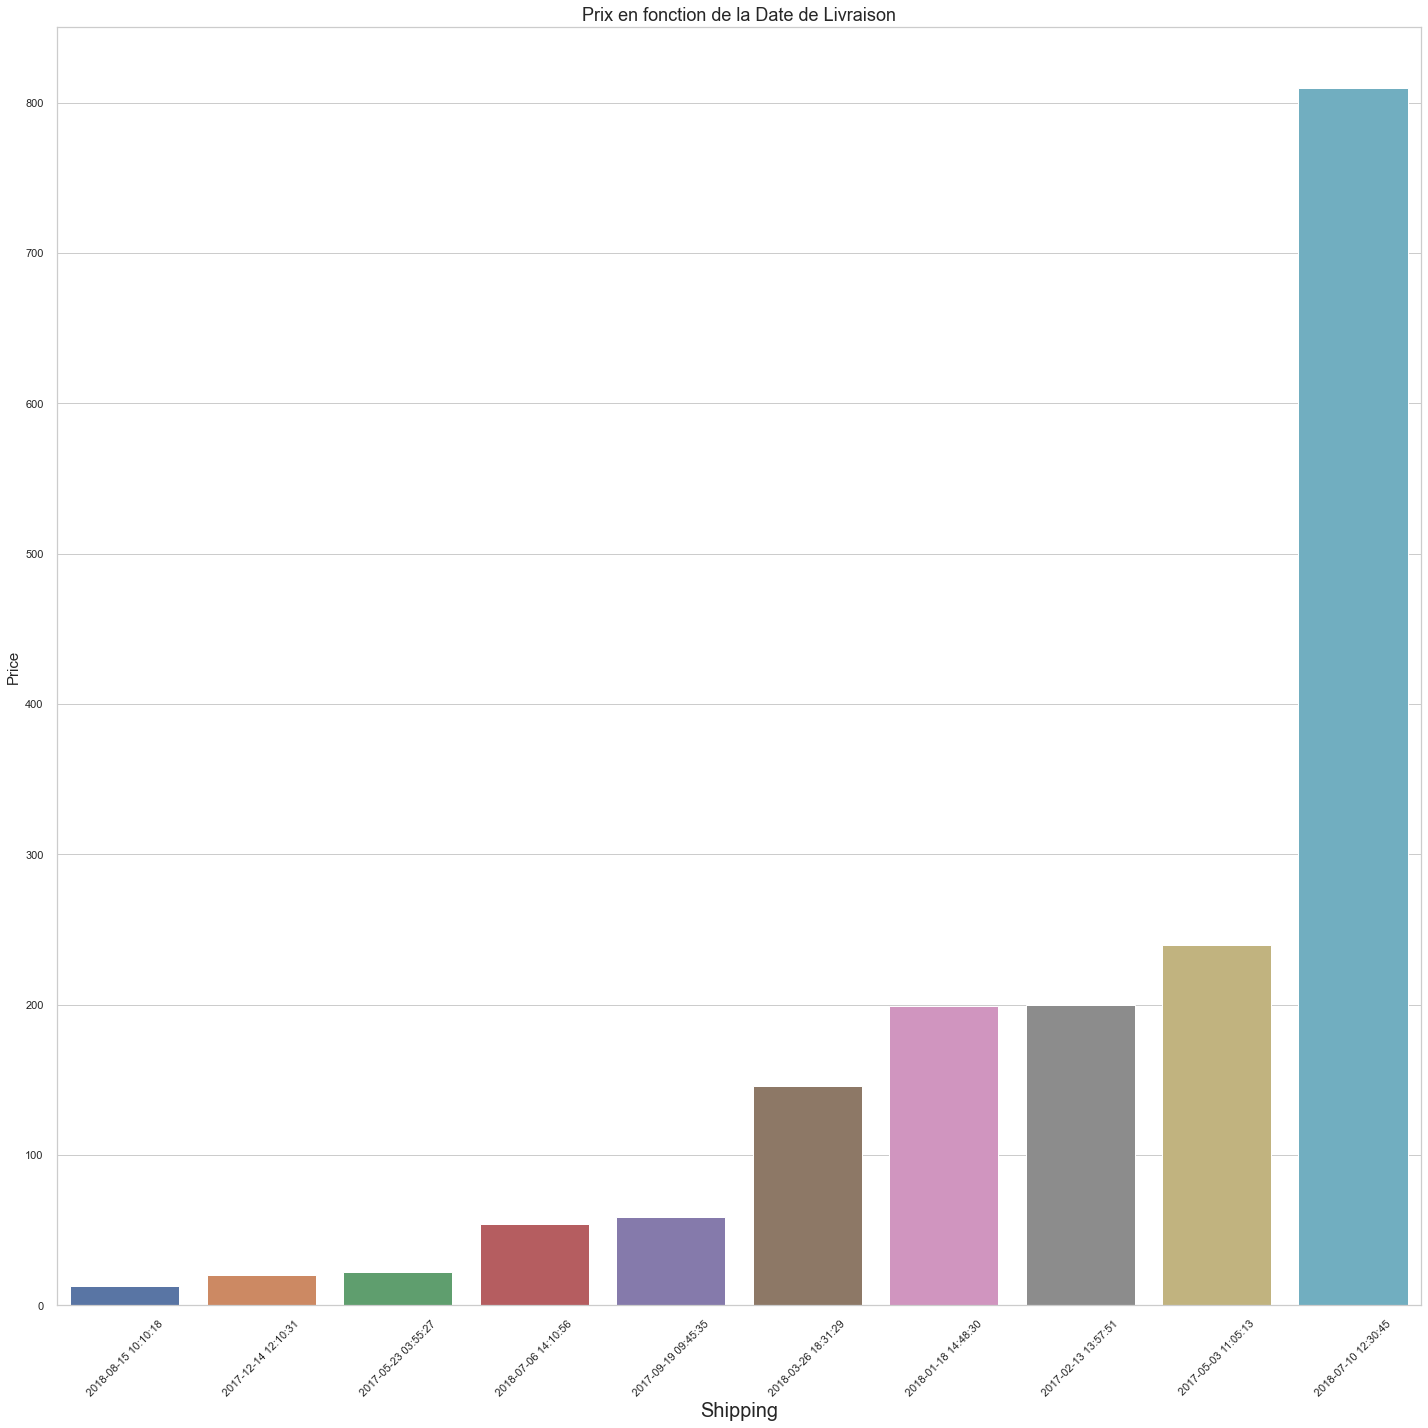

In [55]:
# Histogramme des Prix en fonction de la Date de Livraison :

sns.set_theme(style="whitegrid")

plt.subplots(figsize=(20, 20))

sns.barplot(x="shipping_limit_date", y="price", data=priceship, order=priceship.sort_values('price').shipping_limit_date)

plt.xlabel("Shipping", size=20)

plt.xticks(rotation = 45)

plt.ylabel("Price", size=15)

plt.title("Prix en fonction de la Date de Livraison", size=18)

plt.tight_layout()

# Observations :

On constate que les Prix étaient au plus haut, le 10 Juillet 2018.

# Récurrence des Articles Commandés :

<AxesSubplot:title={'center':"Nombre d'Articles Commandés Plusieurs Fois"}, xlabel="Nombre d'Articles Multiples", ylabel='Count'>

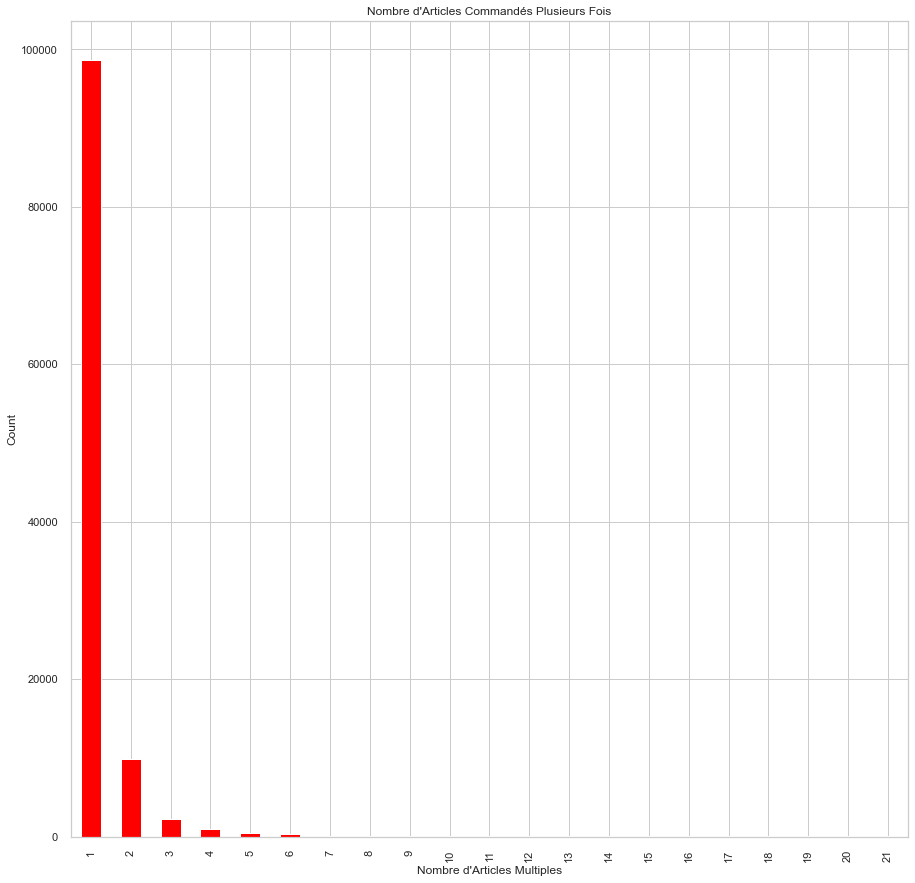

In [56]:
# Histogramme des Etats ayant le Plus de Clients :

sns.set_style("whitegrid")

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Nombre d'Articles Multiples")

plt.ylabel("Count")

plt.title("Nombre d'Articles Commandés Plusieurs Fois")

order_items_dataset.order_item_id.value_counts().plot(kind='bar',color = 'red')

# D- Fichier "olist_order_payments_dataset" :

In [57]:
# Chargement et Visualisation du fichier csv "olist_order_payments_dataset" :

order_payments_dataset = pd.read_csv('olist_order_payments_dataset.csv')

order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [58]:
# Mise en Majuscule :

order_payments_dataset['payment_type'] = order_payments_dataset['payment_type'].str.capitalize()

In [59]:
# Données Statistiques : 

order_payments_dataset.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [60]:
# Listage des colonnes constituant la dataframe initiale :

order_payments_dataset.columns.to_list()

['order_id',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value']

# Compréhension des Variables :

- order_id / identifiant unique de la commande
- order_item_id / numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre
- product_id / identifiant unique du produit
- seller_id / identifiant unique du vendeur
- shipping_limit_date / date limite d'expédition
- price / prix de l'article
- freight_value / frais de transport

In [61]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

order_payments_dataset.shape

(103886, 5)

In [62]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

order_payments_dataset.dtypes

order_id                object 
payment_sequential      int64  
payment_type            object 
payment_installments    int64  
payment_value           float64
dtype: object

In [63]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

order_payments_dataset.duplicated().sum()

0

<AxesSubplot:>

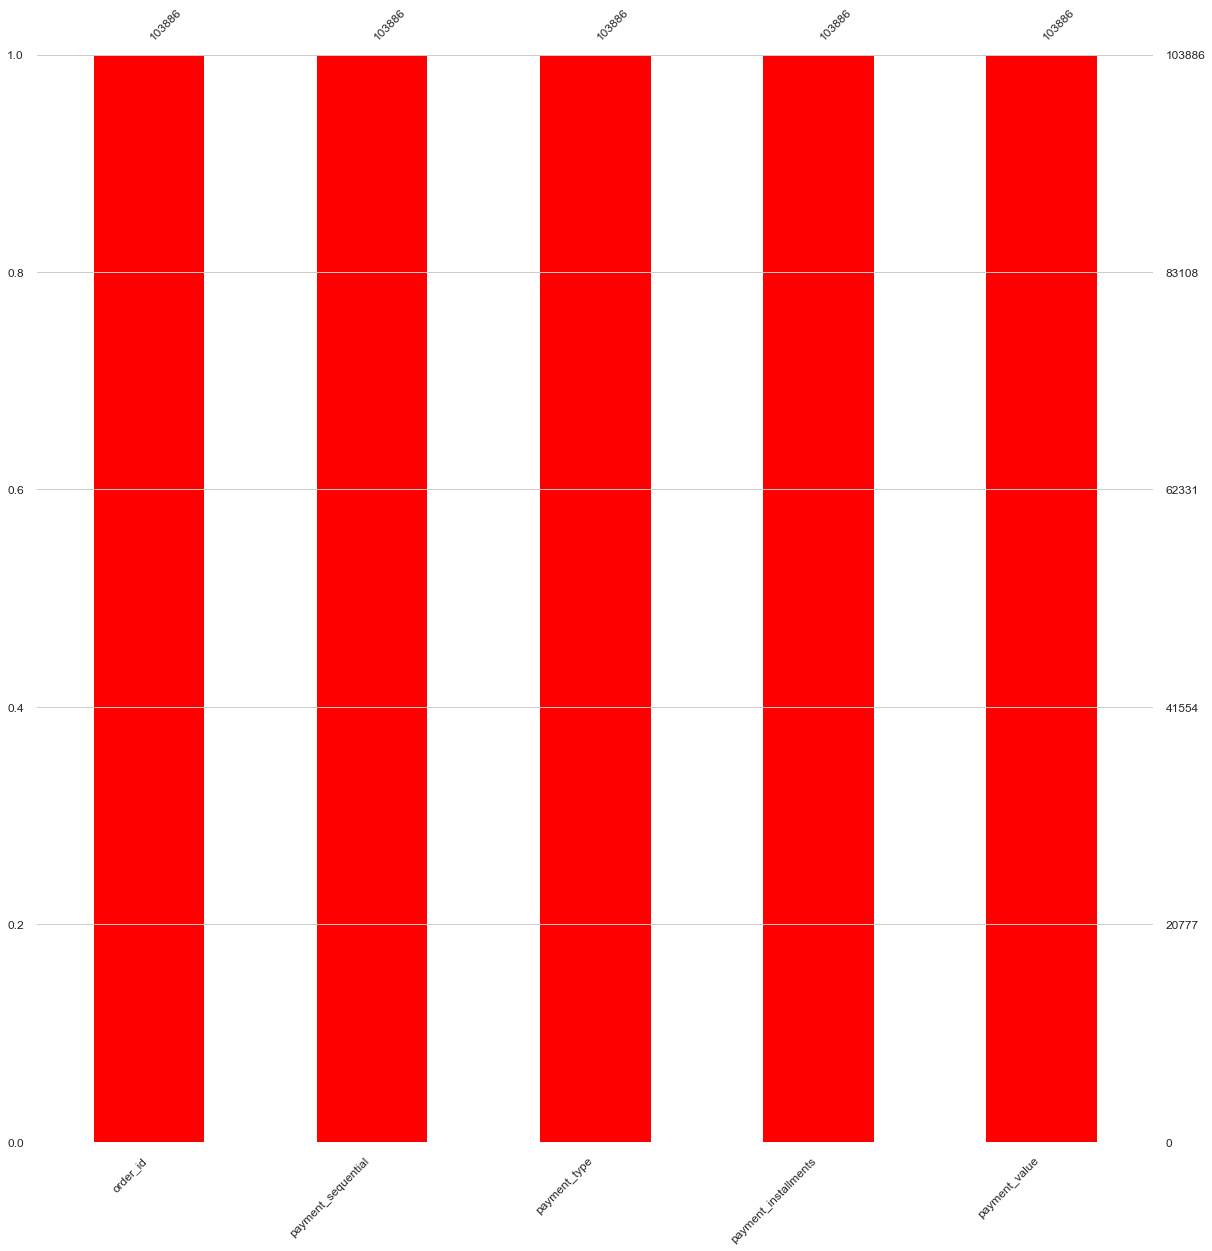

In [64]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(order_payments_dataset, sort = "ascending", color = "red", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

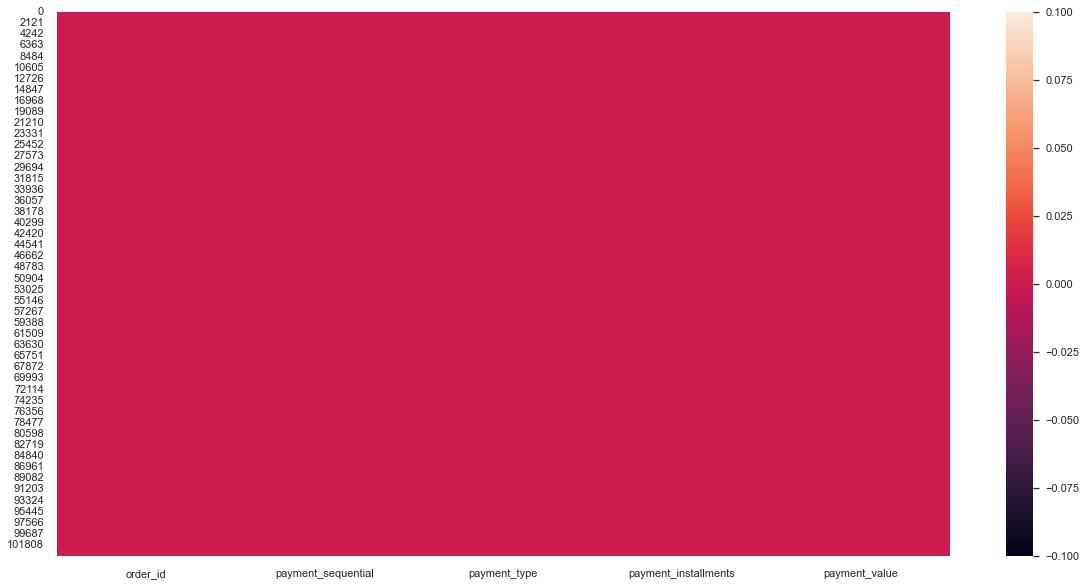

In [65]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(order_payments_dataset.isnull())

In [66]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count4 = order_payments_dataset.isnull().sum()

missing_count4

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [67]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count4 = order_payments_dataset.isnull().count()

value_count4

order_id                103886
payment_sequential      103886
payment_type            103886
payment_installments    103886
payment_value           103886
dtype: int64

In [68]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage4 = round((missing_count4 / value_count4) * 100)

In [69]:
# Dataframe des Pourcentages de NaN :

missing_df4 = pd.DataFrame({'Nombre' : missing_count4, 'Pourcentage' : missing_percentage4})

In [70]:
# Dataframe "Missing_df" :

missing_df4

,Nombre,Pourcentage
order_id,0,0.0
payment_sequential,0,0.0
payment_type,0,0.0
payment_installments,0,0.0
payment_value,0,0.0


# Observations :

On constate qu'il n'y a aucune NaN dans ce dataset.

# Graphiques d'Exploration du Fichier :

# Types de Paiements :

<AxesSubplot:title={'center':'Différents Types de Paiements'}, xlabel='Différents Types de Paiements', ylabel='Count'>

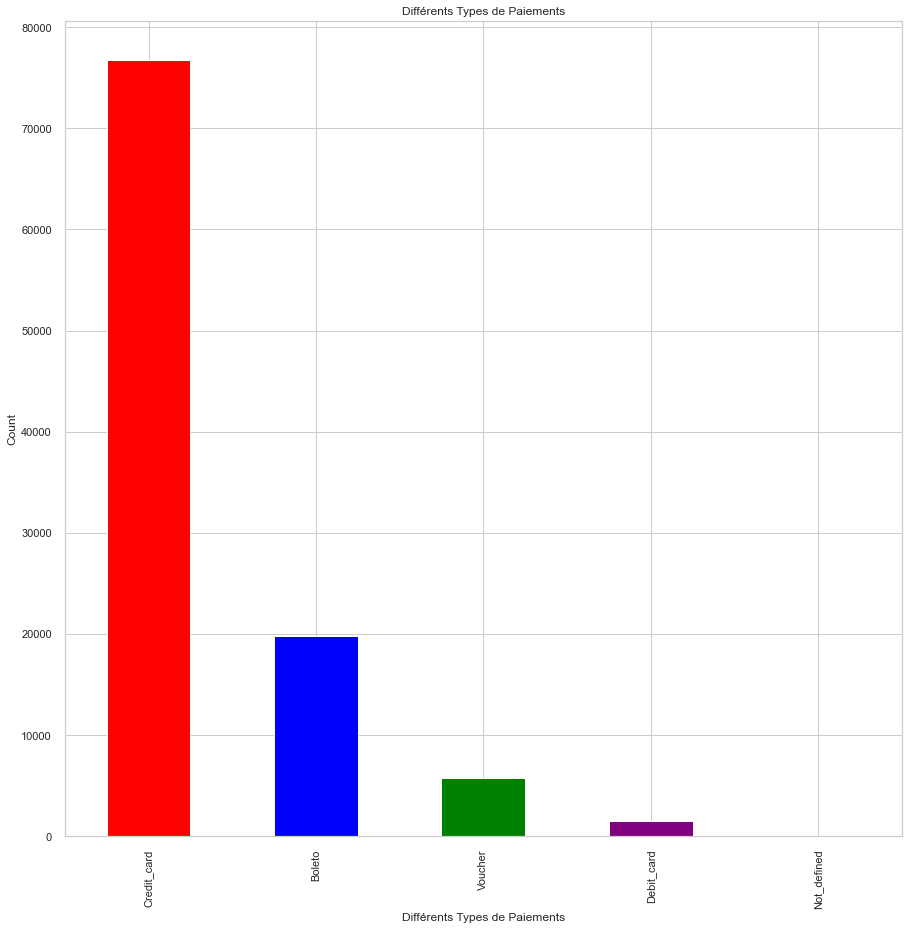

In [71]:
# Histogramme de Répartition des Différents Types de Paiements :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Différents Types de Paiements")

plt.ylabel("Count")

plt.title("Différents Types de Paiements")

order_payments_dataset.payment_type.value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'purple', 'cyan'])

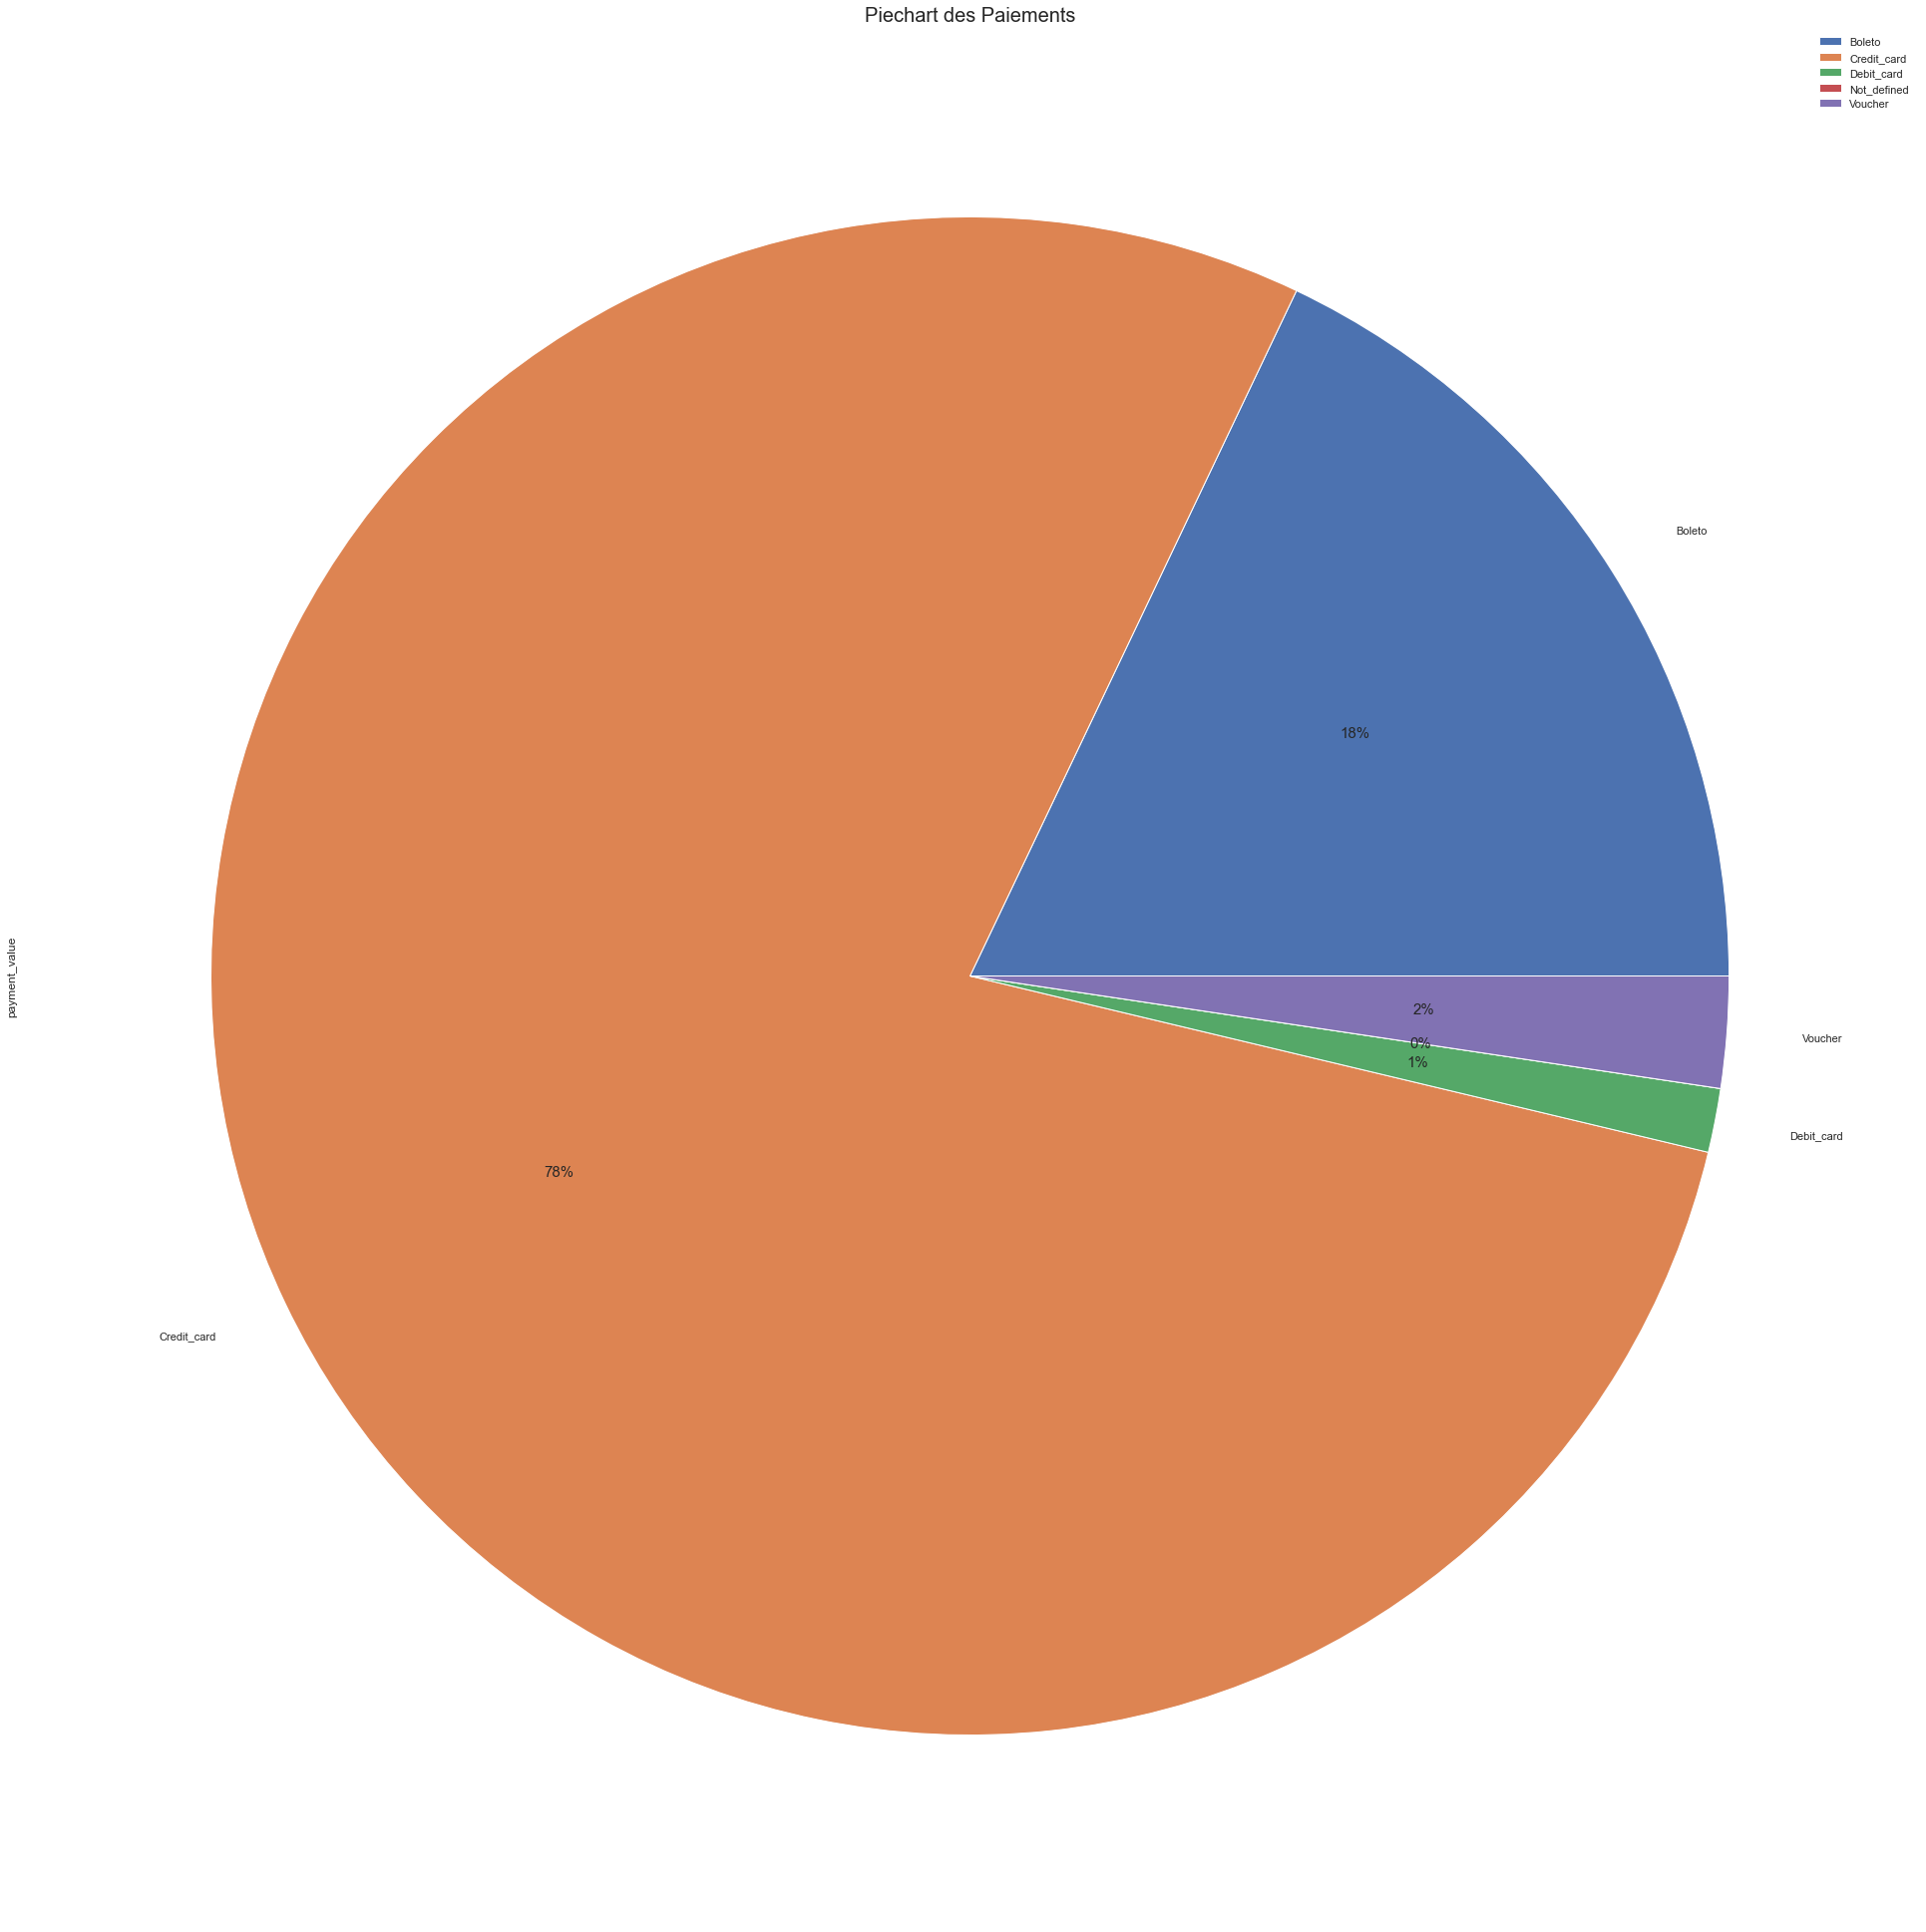

In [72]:
# Piechart des Paiements :

import matplotlib as mpl

mpl.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (35,35)

order_payments_dataset.groupby(['payment_type']).sum().plot(kind='pie', y='payment_value',autopct='%1.0f%%')

plt.title('Piechart des Paiements', fontsize = 20)

plt.show()

# Observations :

Le mode de paiement "Carte de Crédit" est majoritaire sur tous les autres types de paiement.

# E- Fichier "olist_order_reviews_dataset" :

In [73]:
# Chargement et Visualisation du fichier csv "olist_customers" :

order_reviews_dataset = pd.read_csv('olist_order_reviews_dataset.csv')

order_reviews_dataset

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super recomendo essa loja!",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [74]:
# Mise en Majuscule :

order_reviews_dataset['review_comment_message'] = order_reviews_dataset['review_comment_message'].str.capitalize()

In [75]:
# Données Statistiques : 

order_reviews_dataset.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [76]:
# Listage des colonnes constituant la dataframe initiale :

order_reviews_dataset.columns.to_list()

['review_id',
 'order_id',
 'review_score',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

# Compréhension des Variables :

- review_id / identifiant unique des avis.
- order_id / identifiant unique de la commande.
- review_score / Note allant de 1 à 5 donnée par le client dans une enquête de satisfaction.
- review_comment_title / Titre du commentaire laissé par le client, en portugais.
- review_comment_message / Message de commentaire de l'avis laissé par le client, en portugais.
- review_creation_date / Indique la date à laquelle l'enquête de satisfaction a été envoyée au client.
- review_answer_timestamp / Indique l'horodatage de la réponse à l'enquête de satisfaction.

In [77]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

order_reviews_dataset.shape

(99224, 7)

In [78]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

order_reviews_dataset.dtypes

review_id                  object
order_id                   object
review_score               int64 
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [79]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

order_reviews_dataset.duplicated().sum()

0

<AxesSubplot:>

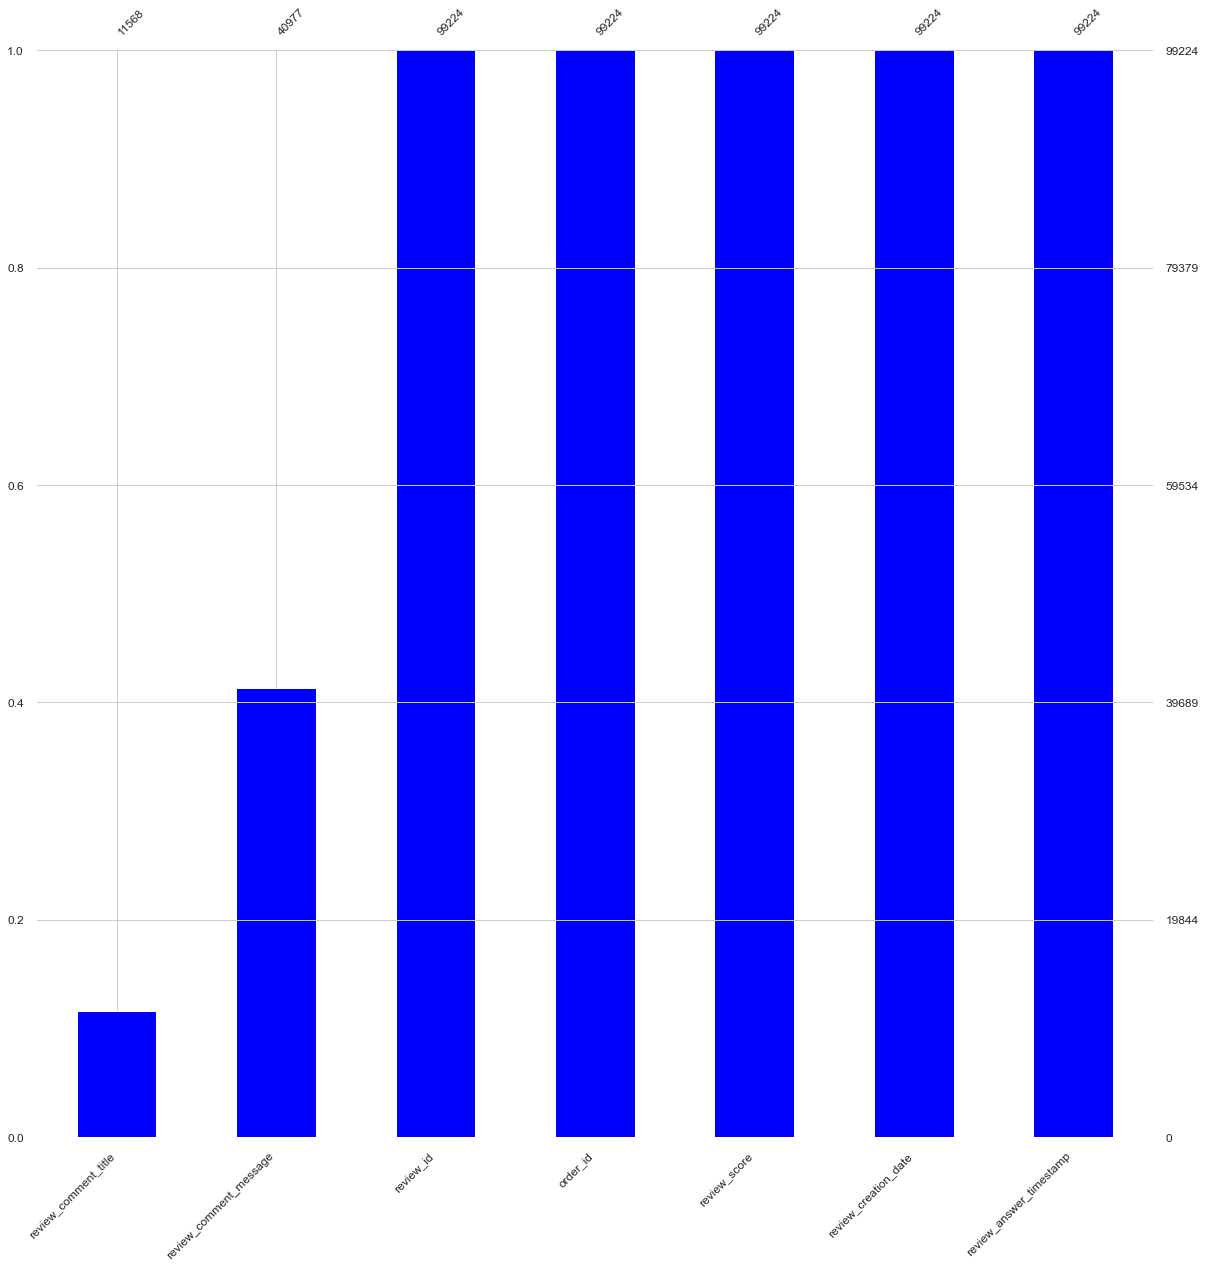

In [80]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(order_reviews_dataset, sort = "ascending", color = "blue", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

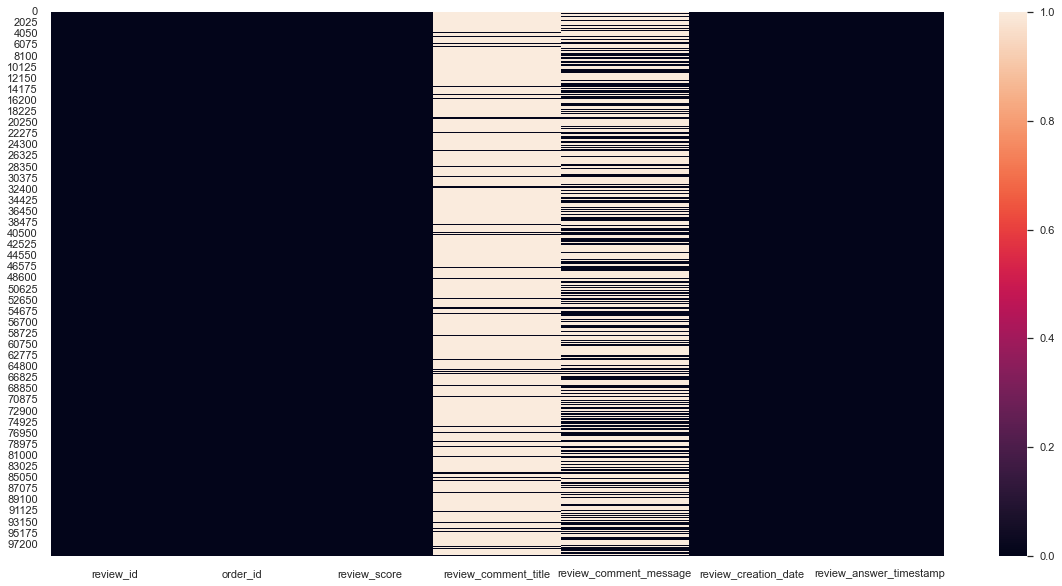

In [81]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(order_reviews_dataset.isnull())

In [82]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count5 = order_reviews_dataset.isnull().sum()

missing_count5

review_id                  0    
order_id                   0    
review_score               0    
review_comment_title       87656
review_comment_message     58247
review_creation_date       0    
review_answer_timestamp    0    
dtype: int64

In [83]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count5 = order_reviews_dataset.isnull().count()

value_count5

review_id                  99224
order_id                   99224
review_score               99224
review_comment_title       99224
review_comment_message     99224
review_creation_date       99224
review_answer_timestamp    99224
dtype: int64

In [84]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage5 = round((missing_count5 / value_count5) * 100)

In [85]:
# Dataframe des Pourcentages de NaN :

missing_df5 = pd.DataFrame({'Nombre' : missing_count5, 'Pourcentage' : missing_percentage5})

In [86]:
# Dataframe "Missing_df" :

missing_df5

,Nombre,Pourcentage
review_id,0,0.0
order_id,0,0.0
review_score,0,0.0
review_comment_title,87656,88.0
review_comment_message,58247,59.0
review_creation_date,0,0.0
review_answer_timestamp,0,0.0


# Observations :

Les Colonnes "review_comment_title" et "review_comment_message" présentent de nombreux NaN.

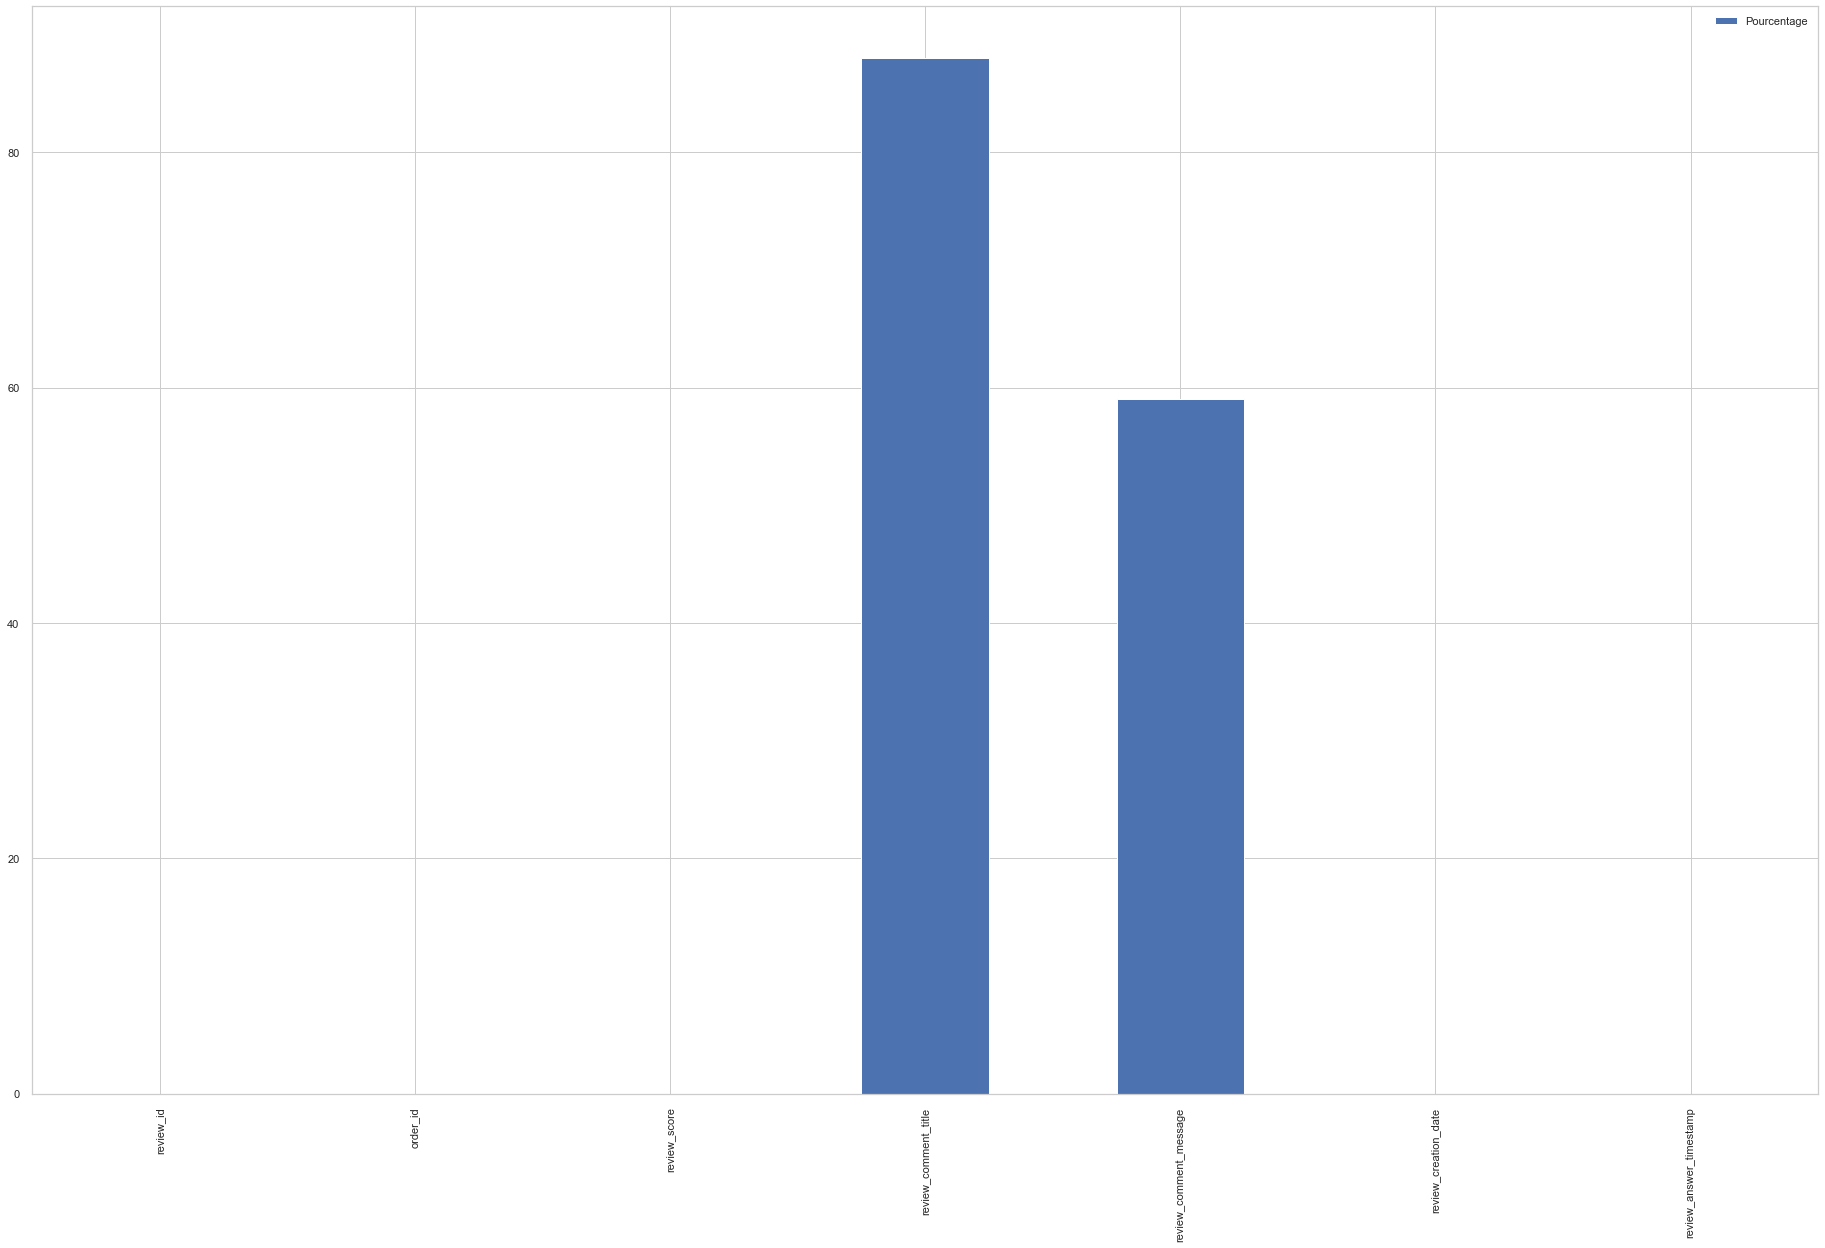

In [87]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (32,20)

barchart = missing_df5.plot.bar(y='Pourcentage')

# Graphiques d'Exploration du Fichier :

# Différentes Notes Attribuées :

<AxesSubplot:title={'center':'Répartition des Notes des Avis du Client sur les Commandes'}, xlabel='Note des Avis des Clients', ylabel='Count'>

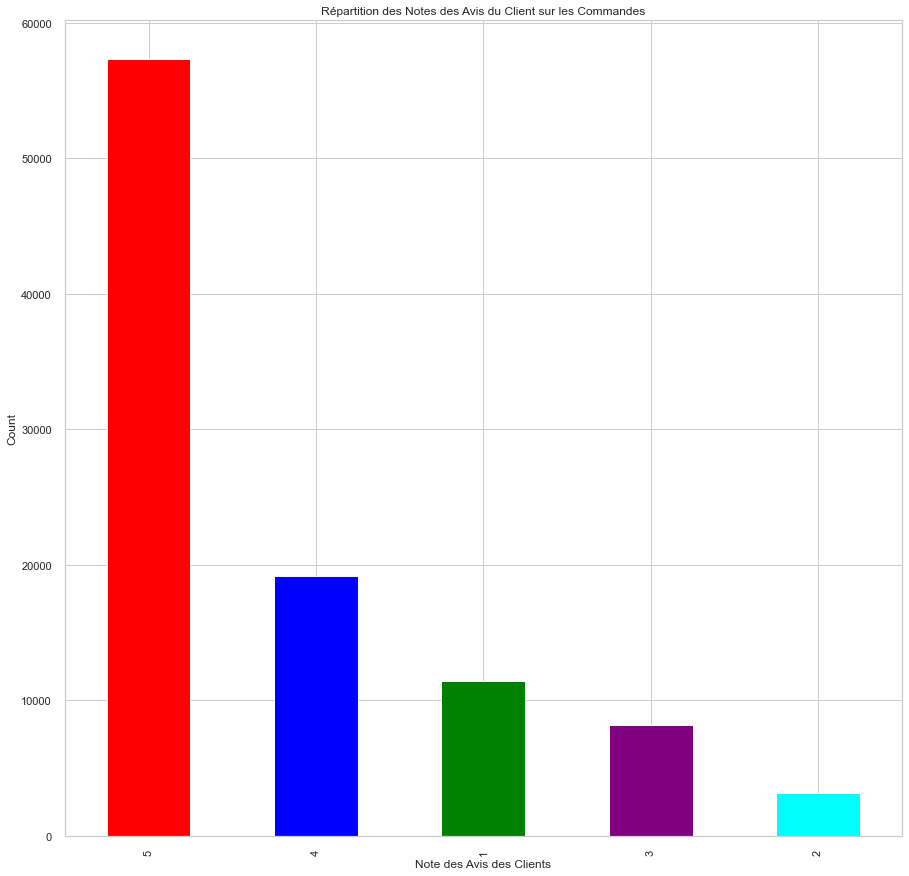

In [88]:
# Histogramme de Répartition des Différents Notes des Avis du Client sur les Commandes :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Note des Avis des Clients")

plt.ylabel("Count")

plt.title("Répartition des Notes des Avis du Client sur les Commandes")

order_reviews_dataset.review_score.value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'purple', 'cyan'])

# Observations :

La Note de 5 est la plus donnée, parmi toutes les autres notes.

# F- Fichier "olist_orders_dataset" :

In [89]:
# Chargement et Visualisation du fichier csv "olist_orders_dataset" :

orders_dataset = pd.read_csv('olist_orders_dataset.csv')

orders_dataset

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [90]:
# Données Statistiques : 

orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [91]:
# Listage des colonnes constituant la dataframe initiale :

orders_dataset.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

# Compréhension des Variables :

- order_id / identifiant unique de la commande.
- customer_id / Clé du jeu de données des clients.
- order_status / Référence au statut de la commande (livrée, expédiée, etc).
- order_purchase_timestamp / Indique l'horodatage de l'achat.
- order_approved_at / Indique l'horodatage de l'approbation du paiement.
- order_delivered_carrier_date / Indique l'horodatage de la commande. 
- order_delivered_customer_date / Indique la date réelle de livraison de la commande au client
- order_estimated_delivery_date / Indique la date de livraison estimée qui a été communiquée au client au moment de l'achat.

In [92]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

orders_dataset.shape

(99441, 8)

In [93]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

orders_dataset.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [94]:
# Transformation de la Variable Qualitative "shipping_limit_date" en Datetime :

orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'], format='%Y-%m-%d %H:%M:%S')

orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')

orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')

orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

orders_dataset.dtypes

order_id                         object        
customer_id                      object        
order_status                     object        
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [95]:
# Date d'Achat / Période :

min = orders_dataset['order_purchase_timestamp'].min().strftime('%d/%m/%Y')

max = orders_dataset['order_purchase_timestamp'].max().strftime('%d/%m/%Y')

print(f'Période d\'achat : du {min} au {max}')

Période d'achat : du 04/09/2016 au 17/10/2018


In [96]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

orders_dataset.duplicated().sum()

0

<AxesSubplot:>

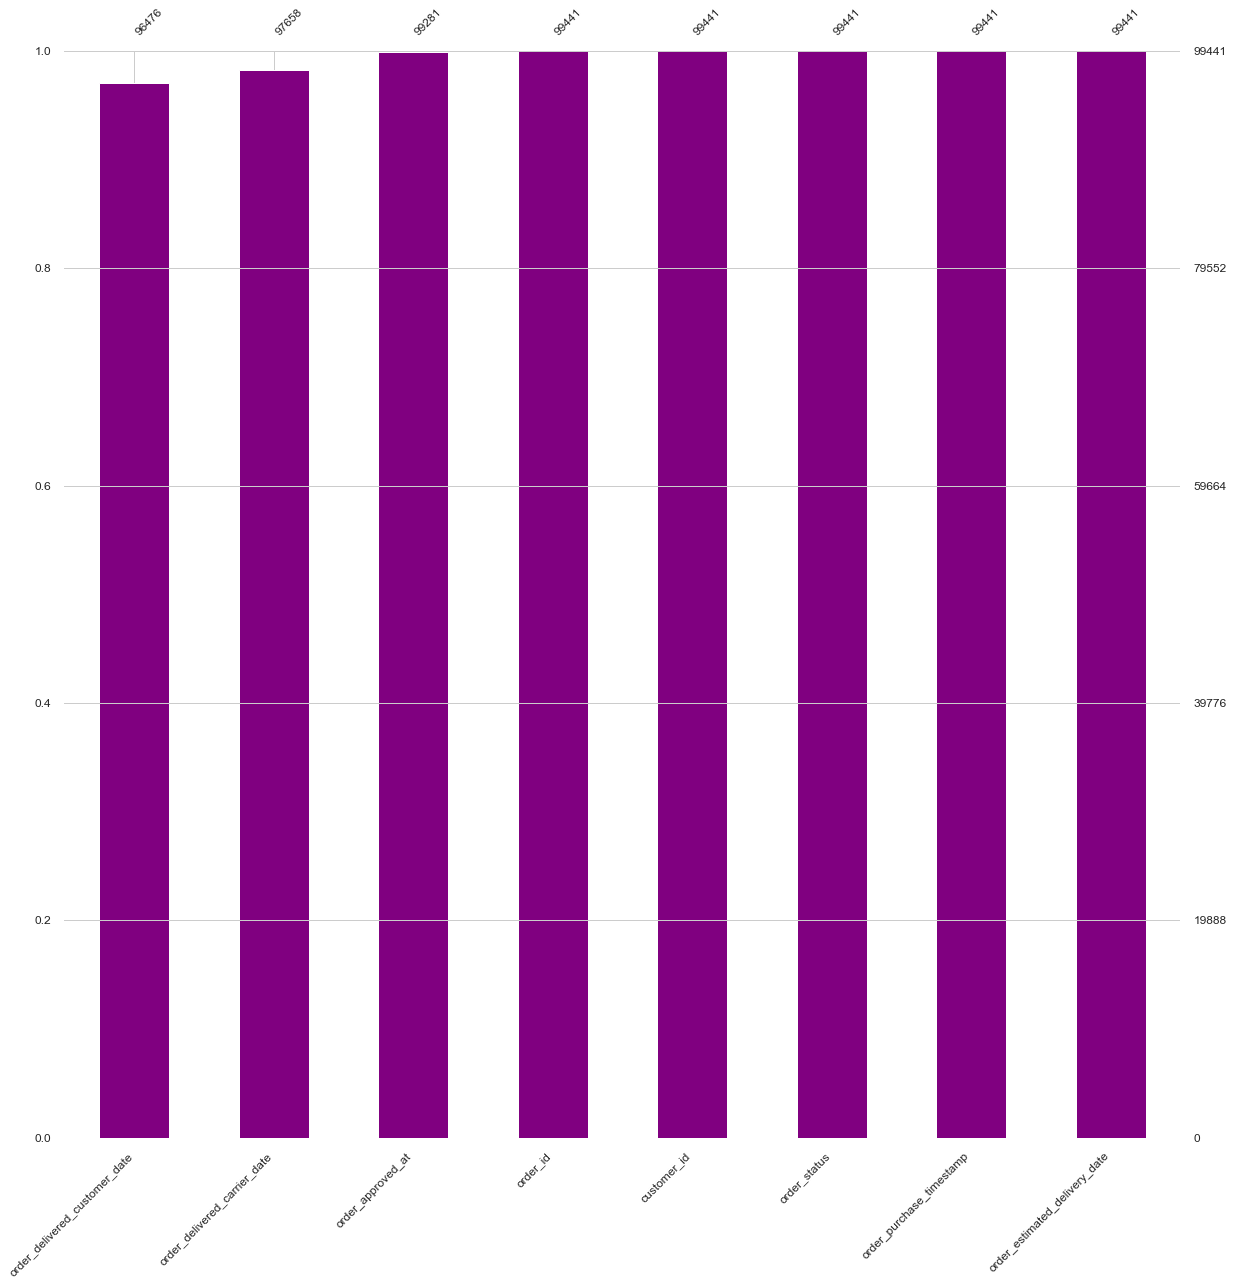

In [97]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(orders_dataset, sort = "ascending", color = "purple", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

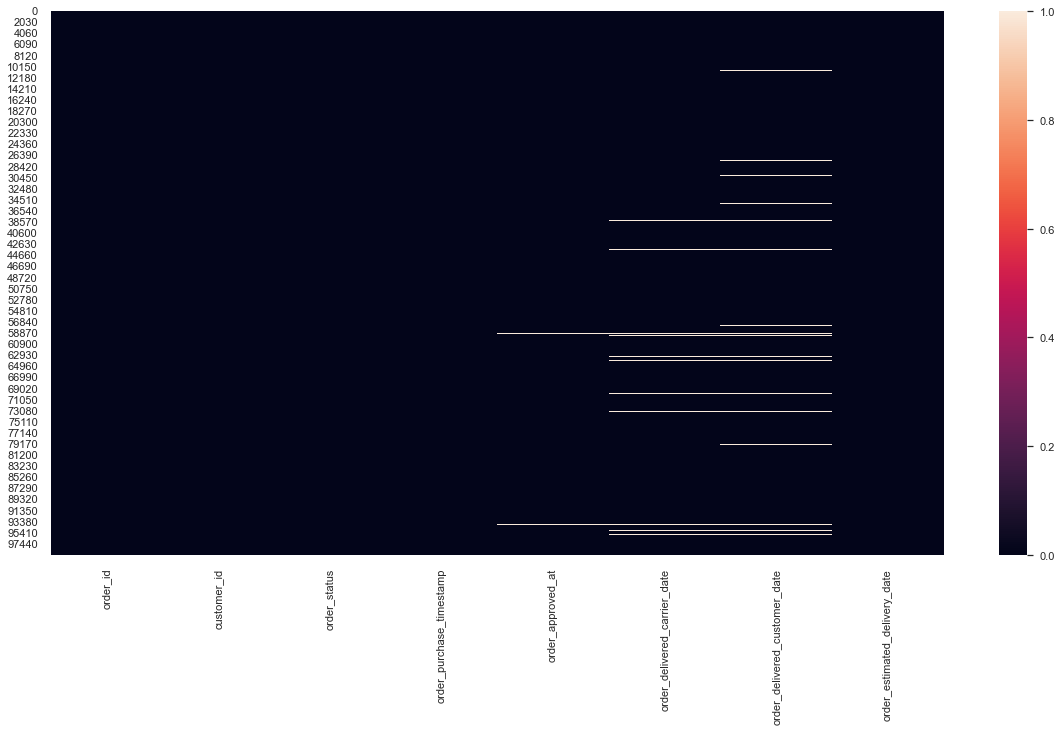

In [98]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(orders_dataset.isnull())

In [99]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count6 = orders_dataset.isnull().sum()

missing_count6

order_id                         0   
customer_id                      0   
order_status                     0   
order_purchase_timestamp         0   
order_approved_at                160 
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date    0   
dtype: int64

In [100]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count6 = orders_dataset.isnull().count()

value_count6

order_id                         99441
customer_id                      99441
order_status                     99441
order_purchase_timestamp         99441
order_approved_at                99441
order_delivered_carrier_date     99441
order_delivered_customer_date    99441
order_estimated_delivery_date    99441
dtype: int64

In [101]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage6 = round((missing_count6 / value_count6) * 100)

In [102]:
# Dataframe des Pourcentages de NaN :

missing_df6 = pd.DataFrame({'Nombre' : missing_count6, 'Pourcentage' : missing_percentage6})


In [103]:
# Dataframe "Missing_df" :

missing_df6

,Nombre,Pourcentage
order_id,0,0.0
customer_id,0,0.0
order_status,0,0.0
order_purchase_timestamp,0,0.0
order_approved_at,160,0.0
order_delivered_carrier_date,1783,2.0
order_delivered_customer_date,2965,3.0
order_estimated_delivery_date,0,0.0


# Observations :

Les Colonnes "order_approved_at", "order_delivered_carrier_date" et "order_delivered_customer_date" présentent de nombreux NaN.

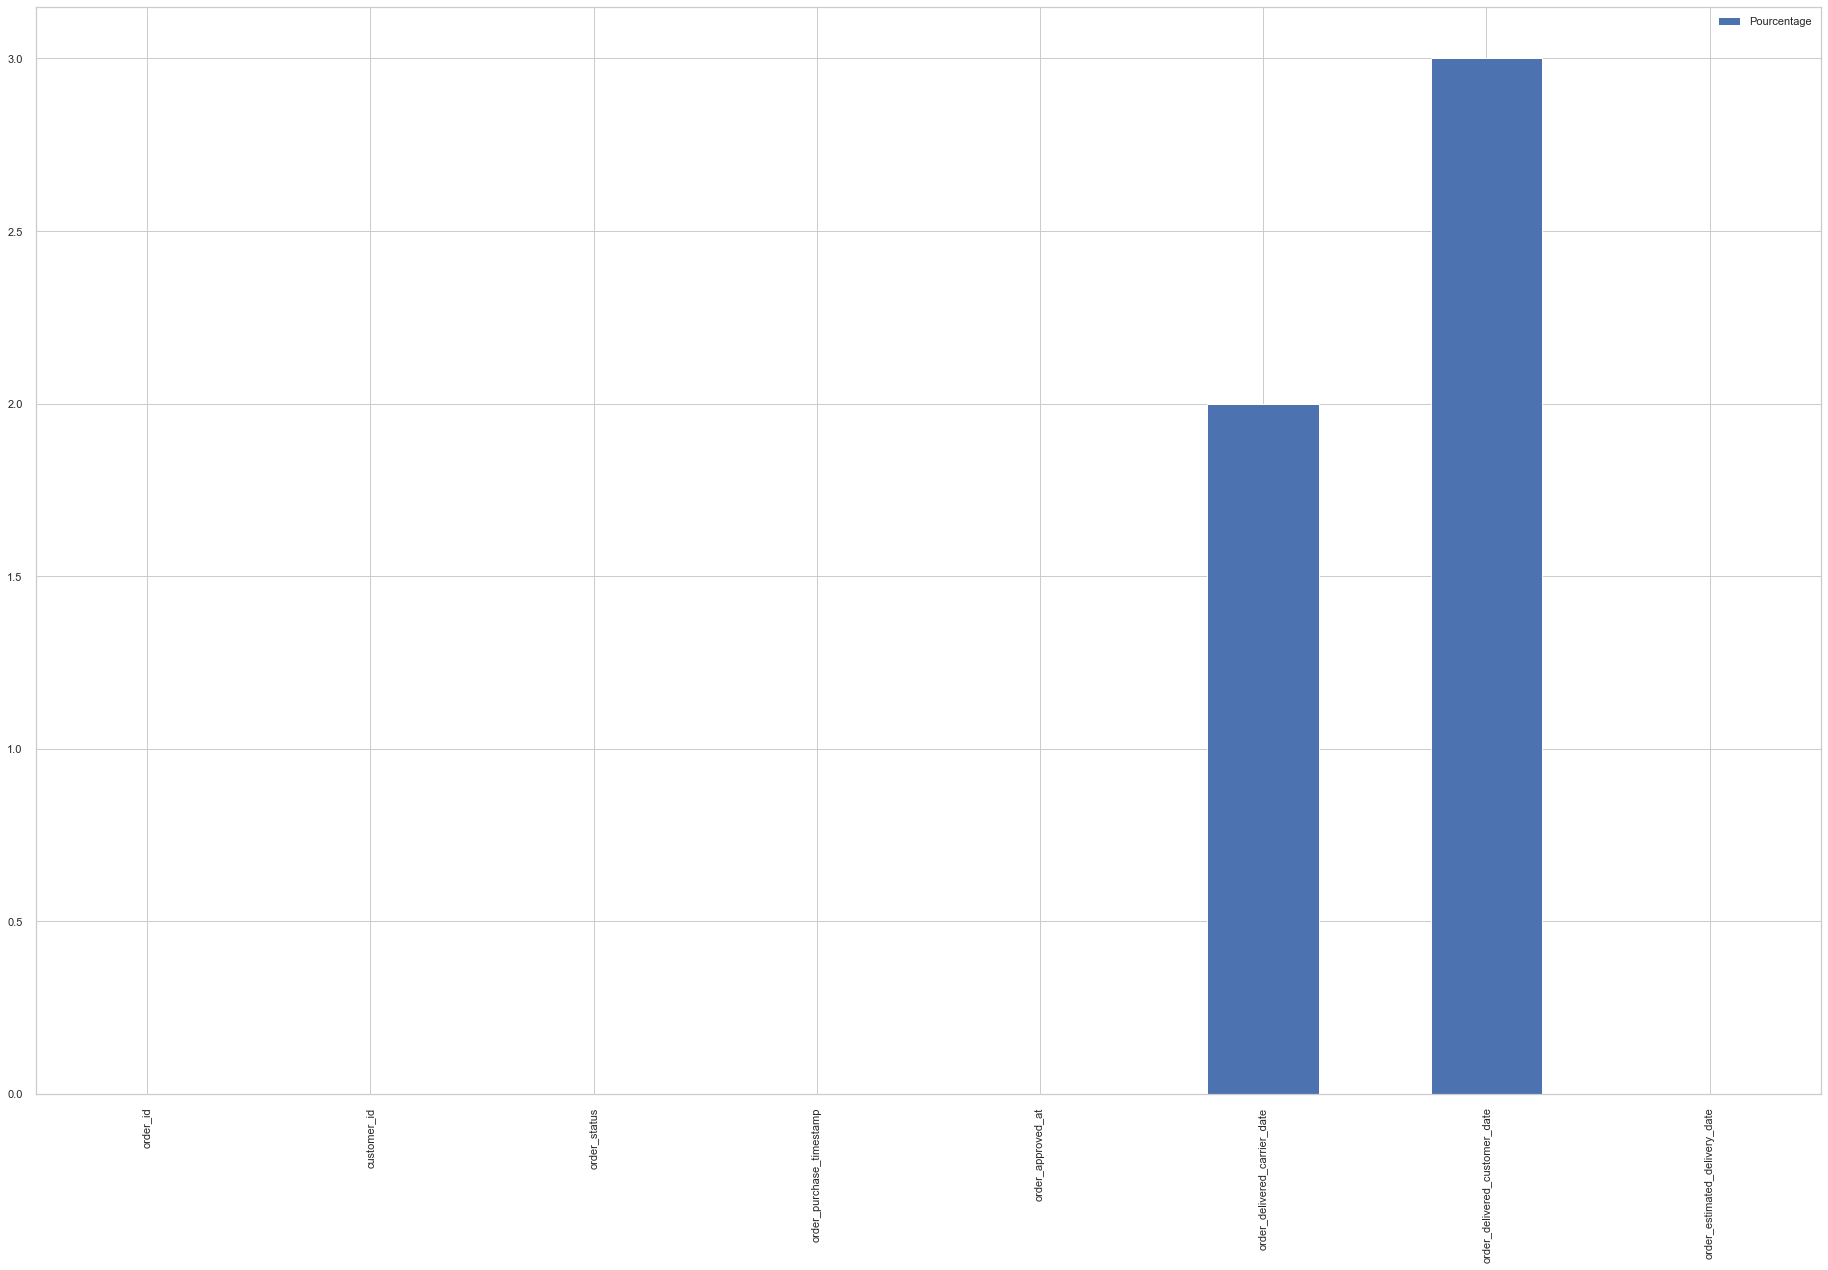

In [104]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (32,20)

barchart = missing_df6.plot.bar(y='Pourcentage')

# Graphiques d'Exploration du Fichier :

# Statuts des Commandes :

<AxesSubplot:title={'center':'Répartition des Statuts des Commandes'}, xlabel='Statuts', ylabel='Count'>

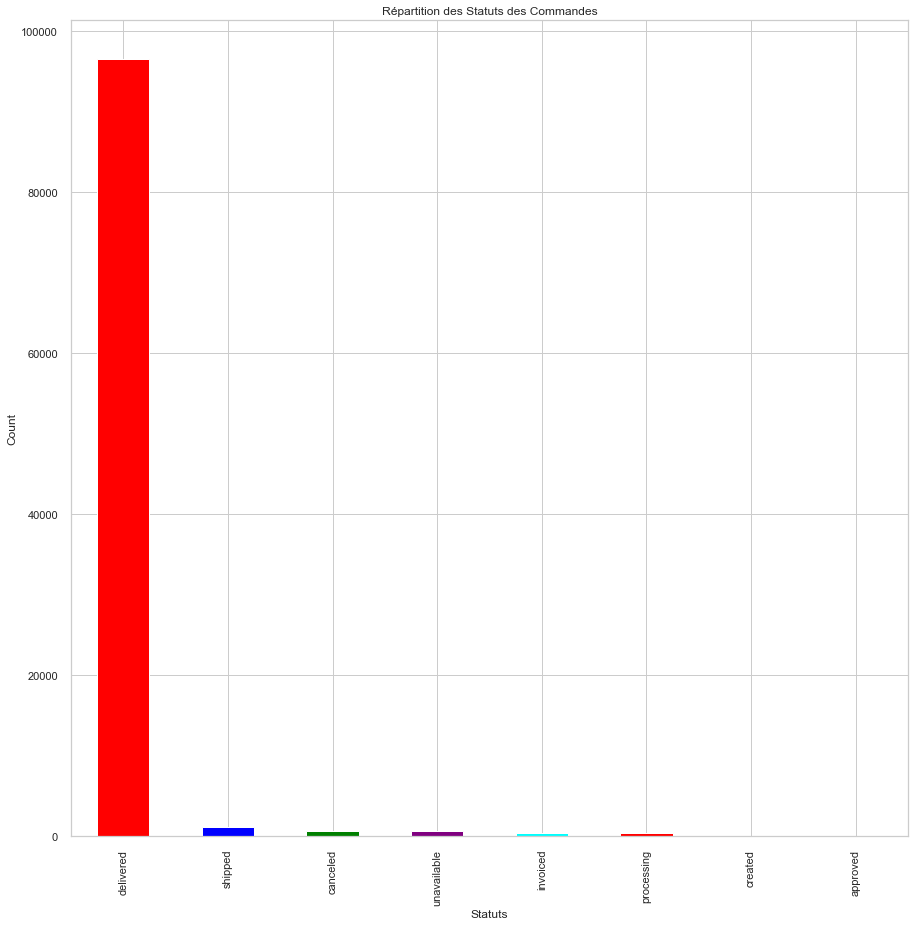

In [105]:
# Histogramme de Répartition des statuts des commandes :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (15,15)

plt.xlabel("Statuts")

plt.ylabel("Count")

plt.title("Répartition des Statuts des Commandes")

orders_dataset.order_status.value_counts().plot(kind='bar',color = ['red', 'blue', 'green', 'purple', 'cyan'])

# Observations :

La majorité des Commandes ont le statut "Délivrées".

# G- Fichier "olist_products_dataset" :

In [106]:
# Chargement et Visualisation du fichier csv "olist_products_dataset" :

products_dataset = pd.read_csv('olist_products_dataset.csv')

products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [107]:
# Données Statistiques : 

products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [108]:
# Listage des colonnes constituant la dataframe initiale :

products_dataset.columns.to_list()

['product_id',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [109]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

products_dataset.shape

(32951, 9)

In [110]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

products_dataset.dtypes

product_id                    object 
product_category_name         object 
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [111]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

products_dataset.duplicated().sum()

0

<AxesSubplot:>

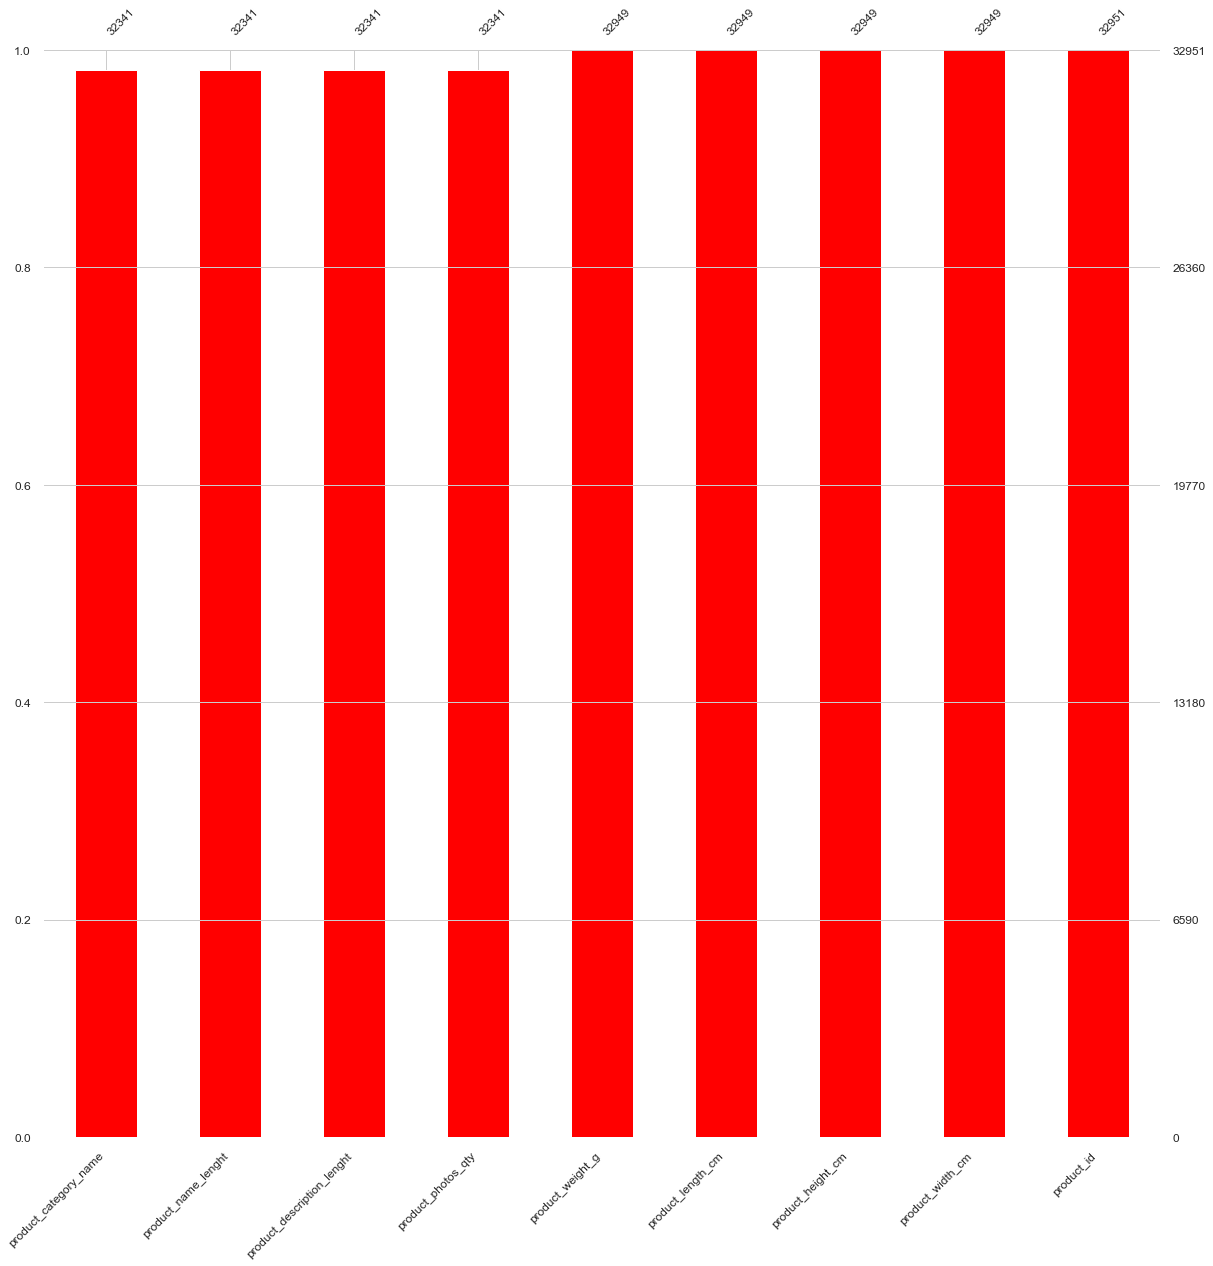

In [112]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(products_dataset, sort = "ascending", color = "red", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

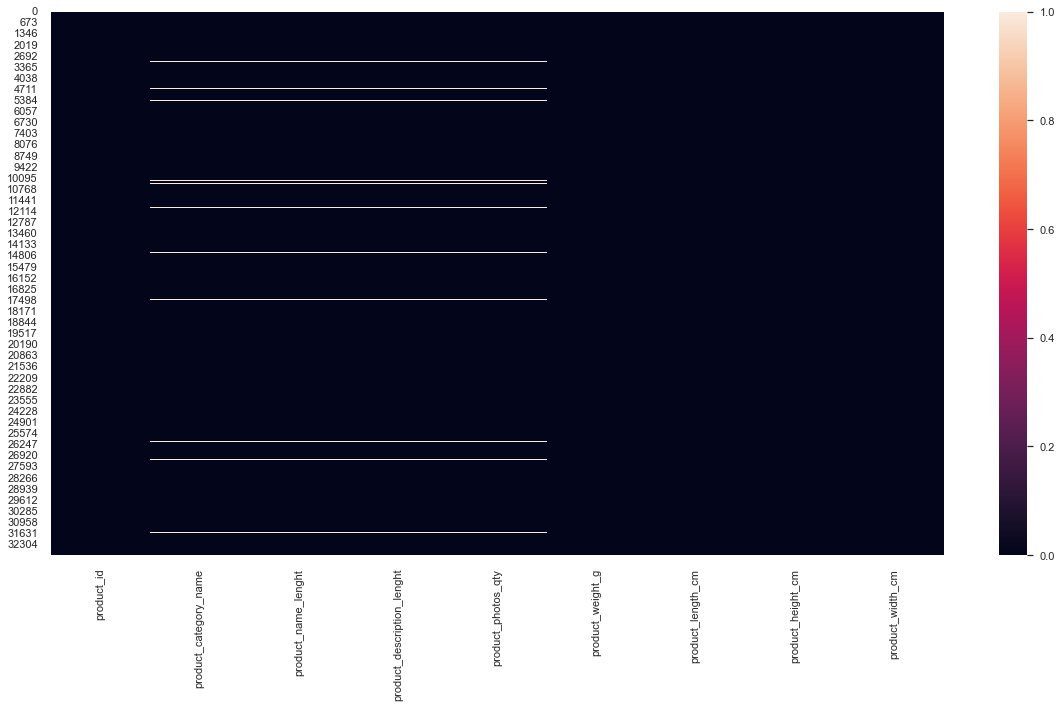

In [113]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(products_dataset.isnull())

In [114]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count7 = products_dataset.isnull().sum()

missing_count7

product_id                    0  
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g              2  
product_length_cm             2  
product_height_cm             2  
product_width_cm              2  
dtype: int64

In [115]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count7 = products_dataset.isnull().count()

value_count7

product_id                    32951
product_category_name         32951
product_name_lenght           32951
product_description_lenght    32951
product_photos_qty            32951
product_weight_g              32951
product_length_cm             32951
product_height_cm             32951
product_width_cm              32951
dtype: int64

In [116]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage7 = round((missing_count7 / value_count7) * 100)

In [117]:
# Dataframe des Pourcentages de NaN :

missing_df7 = pd.DataFrame({'Nombre' : missing_count7, 'Pourcentage' : missing_percentage7})

In [118]:
# Dataframe "Missing_df" :

missing_df7

,Nombre,Pourcentage
product_id,0,0.0
product_category_name,610,2.0
product_name_lenght,610,2.0
product_description_lenght,610,2.0
product_photos_qty,610,2.0
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


# Observations :

Certaines colonnes présentent de nombreux NaN.

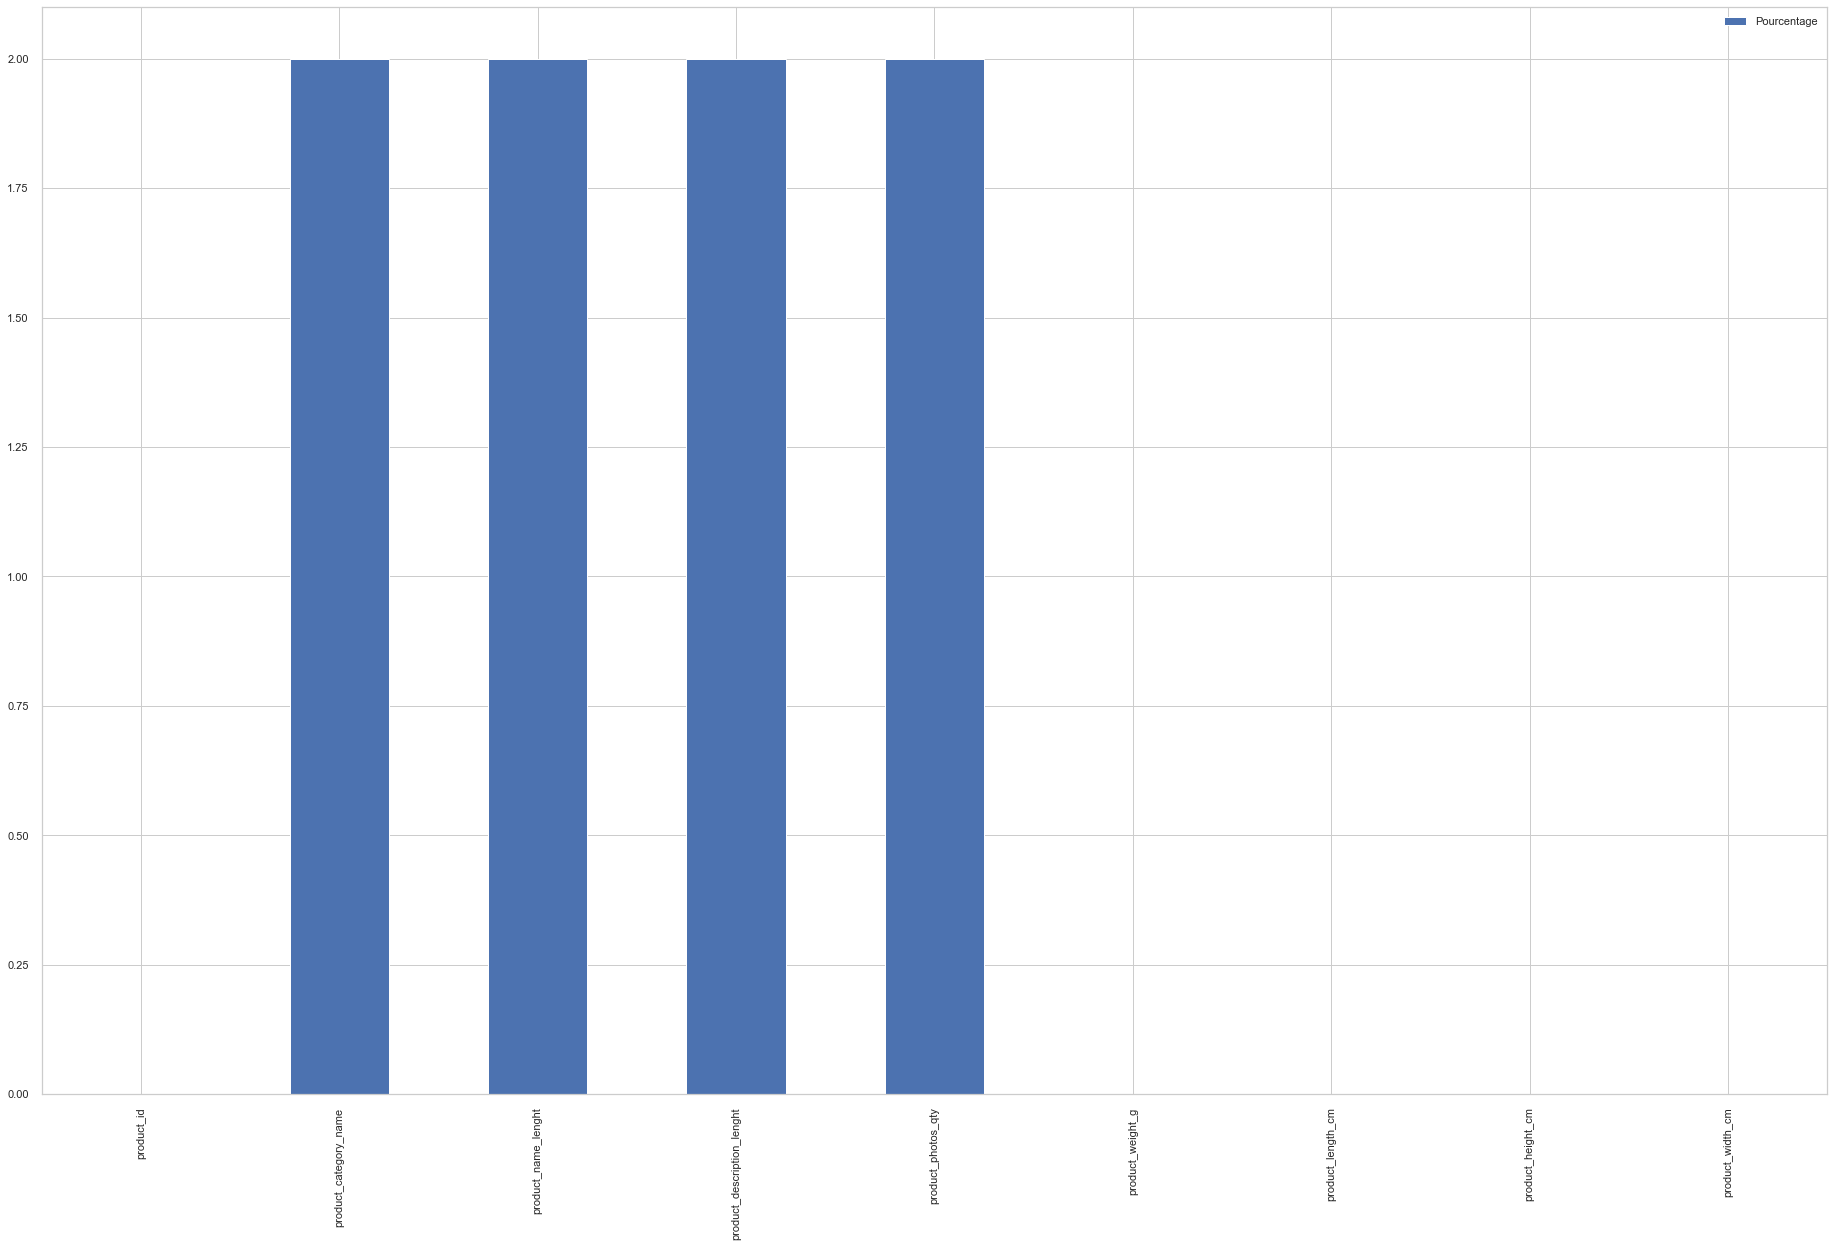

In [119]:
# Pourcentage de Valeurs Manquantes selon les différentes Variables :

sns.set_theme(style="whitegrid")

plt.rcParams["figure.figsize"] = (32,20)

barchart = missing_df7.plot.bar(y='Pourcentage')

# H- Fichier "olist_sellers_dataset" :

In [120]:
# Chargement et Visualisation du fichier csv "olist_sellers_dataset" :

sellers_dataset = pd.read_csv('olist_sellers_dataset.csv')

sellers_dataset

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [121]:
# Données Statistiques : 

sellers_dataset.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [122]:
# Listage des colonnes constituant la dataframe initiale :

sellers_dataset.columns.to_list()

['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

In [123]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

sellers_dataset.shape

(3095, 4)

In [124]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

sellers_dataset.dtypes

seller_id                 object
seller_zip_code_prefix    int64 
seller_city               object
seller_state              object
dtype: object

In [125]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

sellers_dataset.duplicated().sum()

0

<AxesSubplot:>

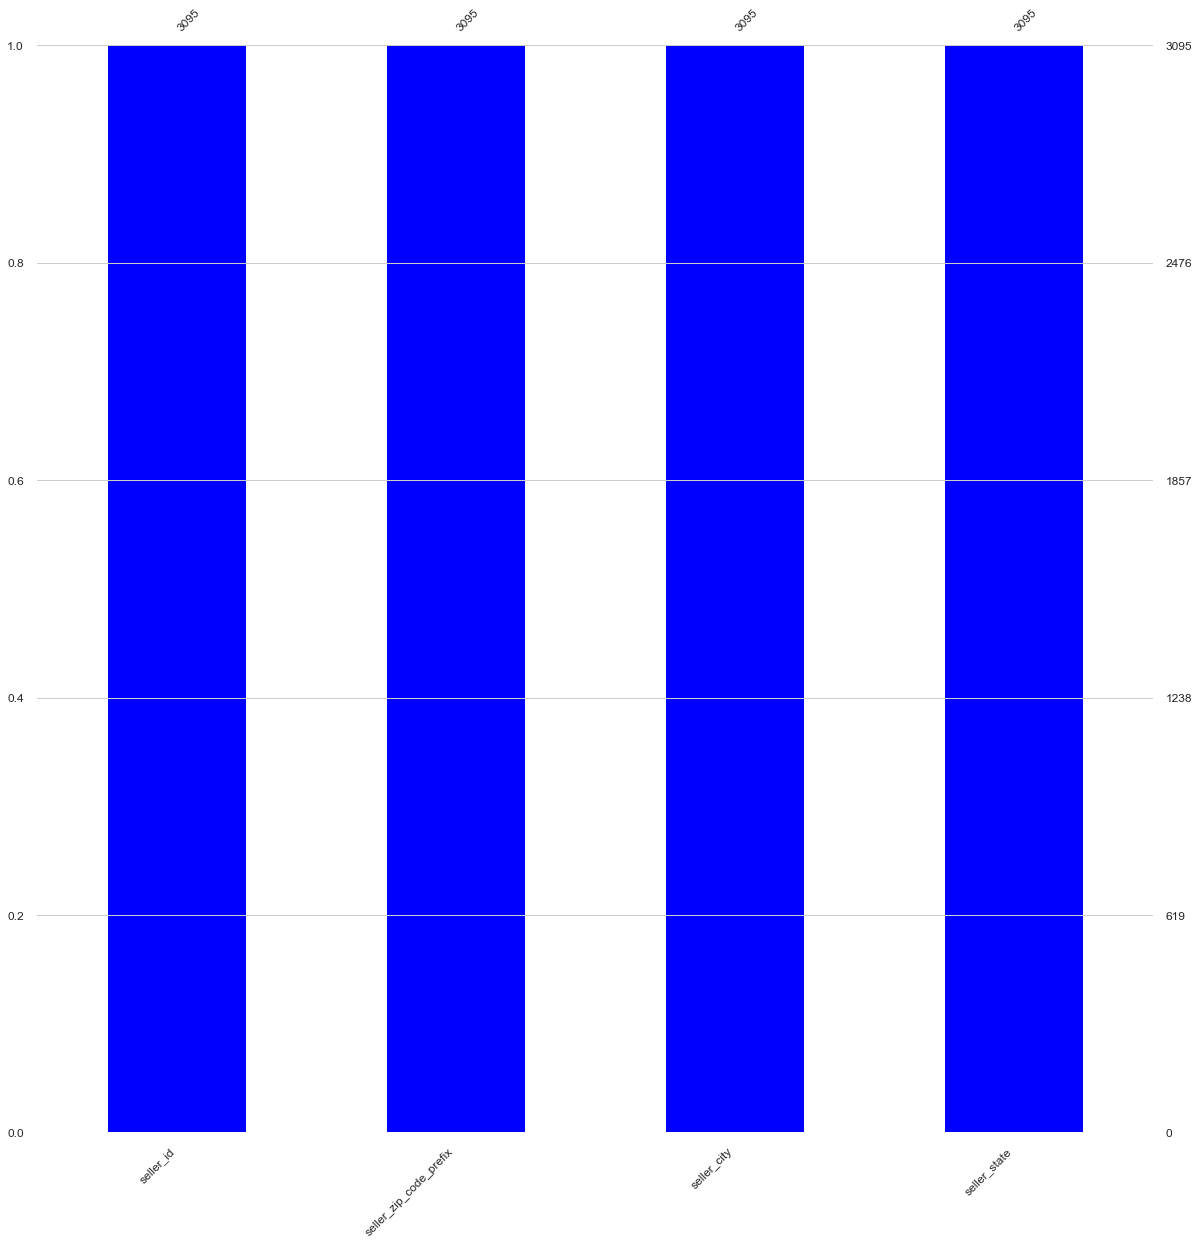

In [126]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(sellers_dataset, sort = "ascending", color = "blue", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

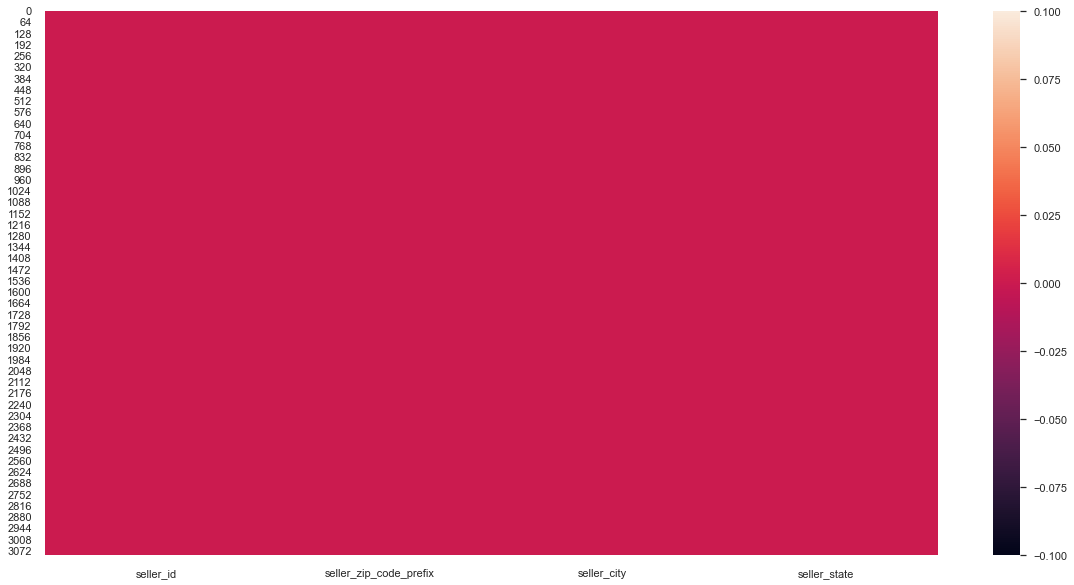

In [127]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(sellers_dataset.isnull())

In [128]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count8 = sellers_dataset.isnull().sum()

missing_count8

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [129]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count8 = sellers_dataset.isnull().count()

value_count8

seller_id                 3095
seller_zip_code_prefix    3095
seller_city               3095
seller_state              3095
dtype: int64

In [130]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage8 = round((missing_count8 / value_count8) * 100)

In [131]:
# Dataframe des Pourcentages de NaN :

missing_df8 = pd.DataFrame({'Nombre' : missing_count8, 'Pourcentage' : missing_percentage8})

In [132]:
# Dataframe "Missing_df" :

missing_df8

,Nombre,Pourcentage
seller_id,0,0.0
seller_zip_code_prefix,0,0.0
seller_city,0,0.0
seller_state,0,0.0


# Observations :

Ce fichier ne présente pas de Valeurs Manquantes.

# I- Fichier "product_category_name_translation" :

In [133]:
# Chargement et Visualisation du fichier csv "product_category_name_translation" :

product_category_name_translation_dataset = pd.read_csv('product_category_name_translation.csv')

product_category_name_translation_dataset.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [134]:
# Données Statistiques : 

product_category_name_translation_dataset.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [135]:
# Listage des colonnes constituant la dataframe initiale :

product_category_name_translation_dataset.columns.to_list()

['product_category_name', 'product_category_name_english']

# Compréhension de Variables :

- product_category_name : nom de la catégorie en portugais.
- product_category_name_english : nom de la catégorie en anglais.

In [136]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe initiale :

product_category_name_translation_dataset.shape

(71, 2)

In [137]:
# Types de Variables Qualitatives et Quantitatives de la Dataframe intiale :

product_category_name_translation_dataset.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

In [138]:
# Quantification des Valeurs Dupliquées de la Dataframe initiale :

product_category_name_translation_dataset.duplicated().sum()

0

<AxesSubplot:>

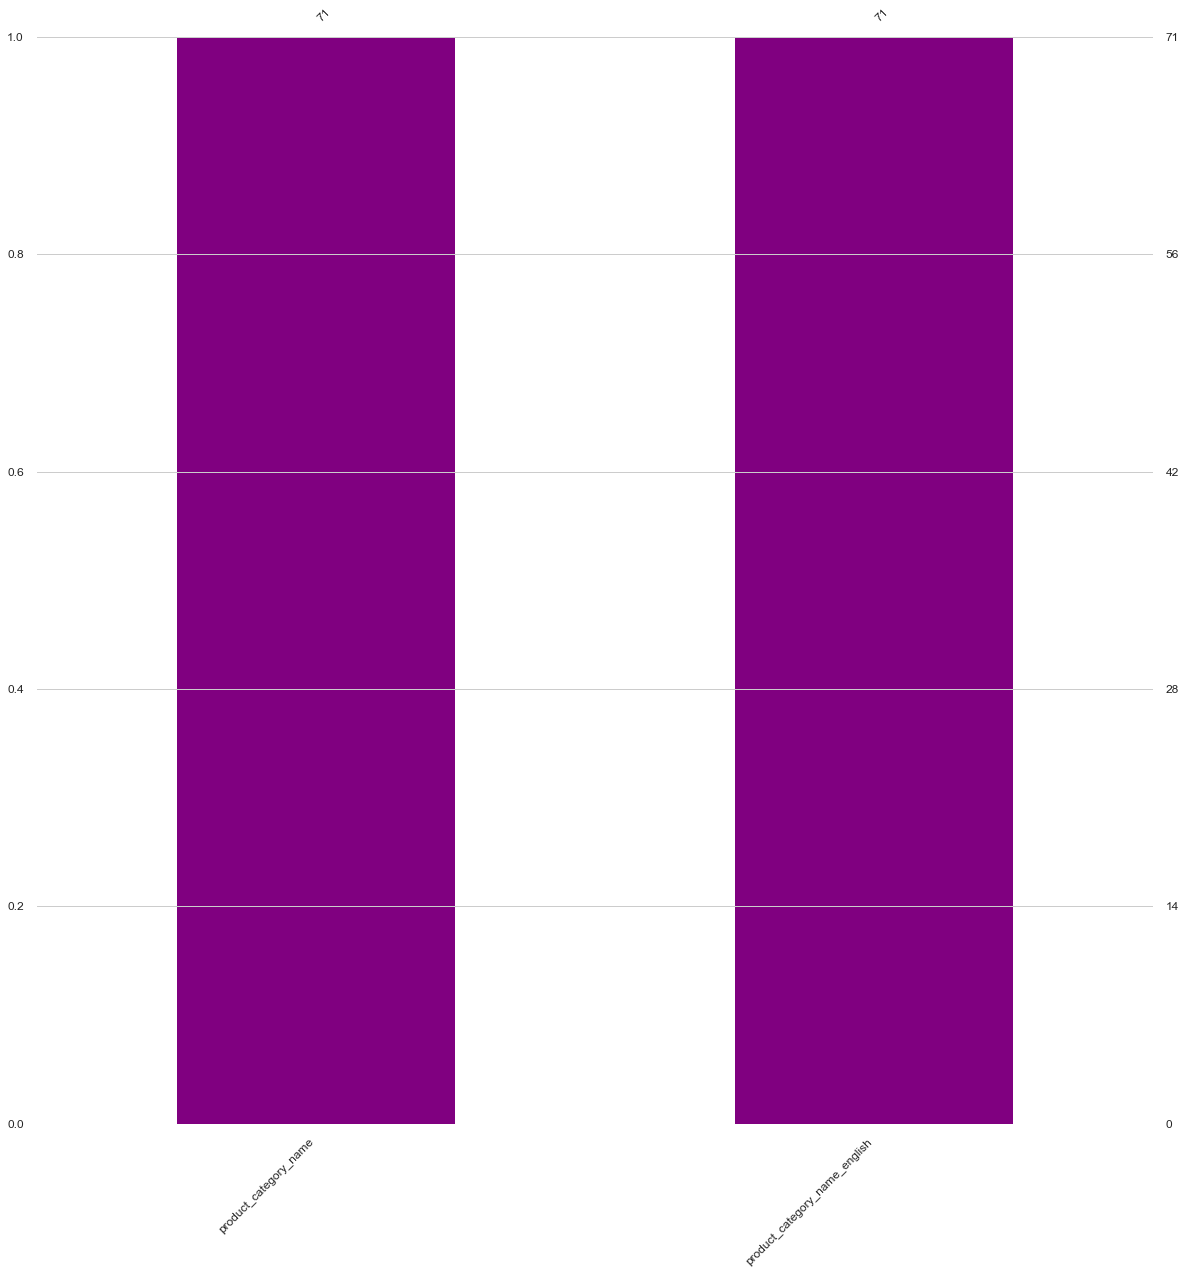

In [139]:
# Matrice de Remplissage des NaN de la Dataframe initiale :

sns.set_style("whitegrid")

msno.bar(product_category_name_translation_dataset, sort = "ascending", color = "purple", figsize = (20,20), fontsize = 12)

<AxesSubplot:>

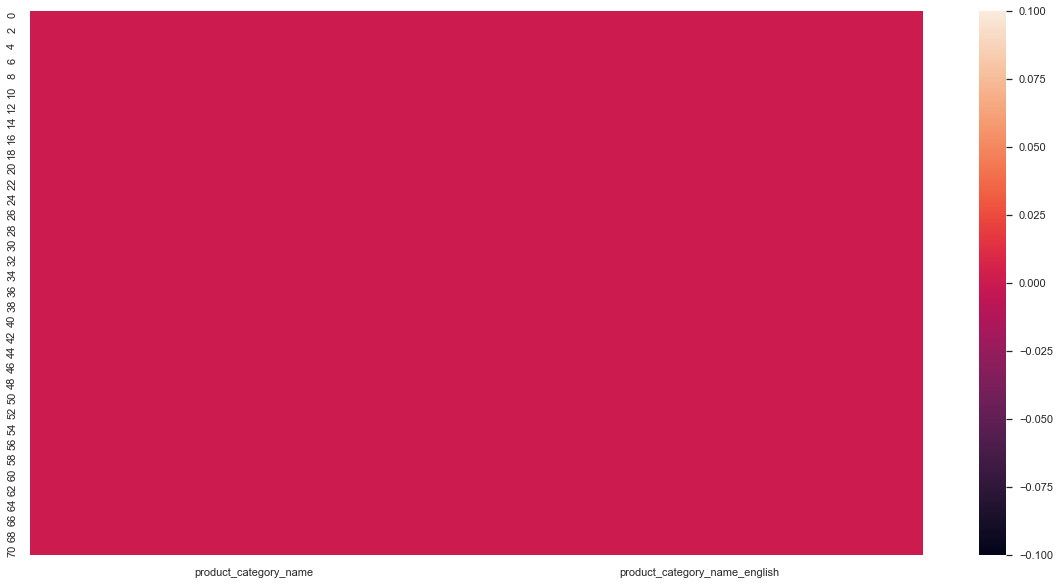

In [140]:
# Heatmap de Valeurs Manquantes de la Dataframe d'Origine :

fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(product_category_name_translation_dataset.isnull())

In [141]:
# Traduction en Pourcentage des Valeurs Manquantes :

missing_count9 = product_category_name_translation_dataset.isnull().sum()

missing_count9

product_category_name            0
product_category_name_english    0
dtype: int64

In [142]:
# Traduction en Pourcentage des Valeurs Manquantes :

value_count9 = product_category_name_translation_dataset.isnull().count()

value_count9

product_category_name            71
product_category_name_english    71
dtype: int64

In [143]:
# Calcul du Pourcentage de Valeurs Manquantes :

missing_percentage9 = round((missing_count9 / value_count9) * 100)

In [144]:
# Dataframe des Pourcentages de NaN :

missing_df9 = pd.DataFrame({'Nombre' : missing_count9, 'Pourcentage' : missing_percentage9})


In [145]:
# Dataframe "Missing_df" :

missing_df9

,Nombre,Pourcentage
product_category_name,0,0.0
product_category_name_english,0,0.0


# Observations :

Ce Fichier ne présente pas de NaN.

# Catégorisation :

In [146]:
# Regroupement en Catégories sous forme de Dictionnaires : 

categories = {

    # Alimentation :
    
    'drinks': 'food',
    'food': 'food',
    'food_drink': 'food',
    'la_cuisine': 'food',
    'kitchen_laptops_and_food_preparers': 'food',

    # Mode :
    
    'fashio_female_clothing': 'fashion',
    'fashion_bags_accessories': 'fashion',
    'fashion_childrens_clothes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_sport': 'fashion',
    'fashion_underwear_beach': 'fashion',
    'health_beauty': 'fashion',
    'perfumery': 'fashion',
    'diapers_and_hygiene': 'fashion',
    'baby': 'fashion',
    'luggage_accessories': 'fashion',

    # Loisirs :
    
    'sports_leisure': 'leisure',
    'consoles_games': 'leisure',
    'musical_instruments': 'leisure',
    'toys': 'leisure',
    'cine_photo': 'leisure',
    'dvds_blu_ray': 'leisure',
    'cds_dvds_musicals': 'leisure',
    'music': 'leisure',
    'books_general_interest': 'leisure',
    'books_imported': 'leisure',
    'books_technical': 'leisure',

    # Maison :
    
    'furniture_bedroom': 'home',
    'furniture_decor': 'home',
    'furniture_living_room': 'home',
    'furniture_mattress_and_upholstery': 'home',
    'bed_bath_table': 'home',
    'christmas_supplies': 'misc',
    'kitchen_dining_laundry_garden_furniture': 'home',
    'office_furniture': 'home',
    'home_appliances': 'home',
    'home_appliances_2': 'home',
    'home_comfort_2': 'home',
    'home_confort': 'home',
    'air_conditioning': 'home',
    'housewares': 'home',
    'art': 'home',
    'arts_and_craftmanship': 'home',
    'party_supplies': 'misc',
    'flowers': 'home',
    'cool_stuff': 'home',

    # Travaux :
    
    'construction_tools_construction': 'construction',
    'construction_tools_lights': 'construction',
    'construction_tools_safety': 'construction',
    'costruction_tools_garden': 'construction',
    'costruction_tools_tools': 'construction',
    'garden_tools': 'construction',
    'home_construction': 'construction',

    # Haute Technologie :
    
    'electronics': 'high_technology',
    'audio': 'high_technology',
    'tablets_printing_image': 'high_technology',
    'telephony': 'high_technology',
    'fixed_telephony': 'high_technology',
    'small_appliances': 'high_technology',
    'small_appliances_home_oven_and_coffee': 'high_technology',
    'computers_accessories': 'high_technology',
    'computers': 'high_technology',
    'security_and_services': 'misc',
    'signaling_and_security': 'misc',

    # Autres :
    
    'stationery': 'misc',
    'auto': 'misc',
    'watches_gifts': 'misc',
    'agro_industry_and_commerce': 'misc',
    'industry_commerce_and_business': 'misc',
    'market_place': 'misc',
    'pet_shop': 'misc',
    'other': 'misc'
}

In [147]:
# Regroupement et Application : 

product_category_name_translation_dataset['product_category_name_english'] = product_category_name_translation_dataset['product_category_name_english'].map(categories)

In [148]:
# Résultats de la Catégorisation :

product_category_name_translation_dataset['product_category_name_english'].unique()

array(['fashion', 'high_technology', 'misc', 'home', 'leisure', 'food',
       'construction'], dtype=object)

In [149]:
# Nomination et Capitalisation :

x = product_category_name_translation_dataset['product_category_name_english']

y = x.str.title()

# Répartition en Pourcentage des Catégories :

<AxesSubplot:ylabel='product_category_name_english'>

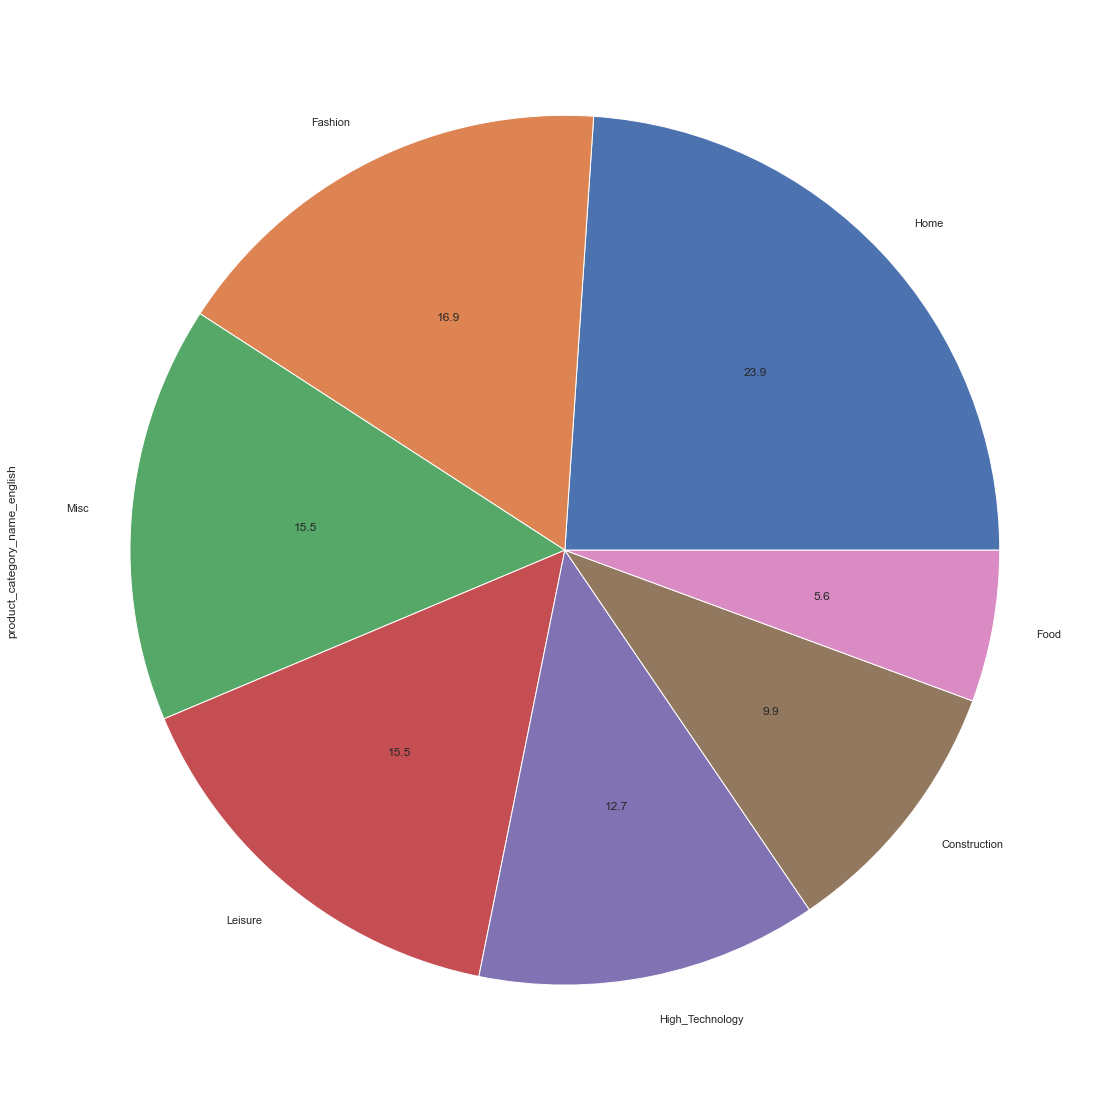

In [150]:
# Piechart des Catégories :

y.value_counts(normalize=True).plot(kind='pie', autopct="%.1f")

# Observations :

La Catégorie Home occupe la plus grande place (23.9 %), suivie de la Catégorie Fashion (16.9%).

# II Création et Etude du DATASET de Travail :

# Revisualisation de tous les Fichiers :

In [151]:
# Visualisation du Dataset Clients :

clients_dataset.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,Jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,Sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,Timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,Curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,Belo horizonte,MG


In [152]:
# Visualisation du Dataset Géolocalisation :

geolocation_dataset.head(10)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao paulo,SP
1,1046,-23.546081,-46.644820,Sao paulo,SP
2,1046,-23.546129,-46.642951,Sao paulo,SP
3,1041,-23.544392,-46.639499,Sao paulo,SP
4,1035,-23.541578,-46.641607,Sao paulo,SP
5,1012,-23.547762,-46.635361,São paulo,SP
6,1047,-23.546273,-46.641225,Sao paulo,SP
7,1013,-23.546923,-46.634264,Sao paulo,SP
8,1029,-23.543769,-46.634278,Sao paulo,SP
9,1011,-23.547640,-46.636032,Sao paulo,SP


In [153]:
# Visualisation du Dataset Commandes Clients :

orders_dataset.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [154]:
# Visualisation du Dataset Items Commandes Clients :

order_items_dataset.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [155]:
# Visualisation du Dataset Paiements :

order_payments_dataset.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_card,2,128.45
5,298fcdf1f73eb413e4d26d01b25bc1cd,1,Credit_card,2,96.12
6,771ee386b001f06208a7419e4fc1bbd7,1,Credit_card,1,81.16
7,3d7239c394a212faae122962df514ac7,1,Credit_card,3,51.84
8,1f78449c87a54faf9e96e88ba1491fa9,1,Credit_card,6,341.09
9,0573b5e23cbd798006520e1d5b4c6714,1,Boleto,1,51.95


In [156]:
# Visualisation du Dataset Avis :

order_reviews_dataset.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela internet seguro e prático parabéns a todos feliz páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,Aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00,2018-05-23 16:45:47


In [157]:
# Visualisation du Dataset Produits :

products_dataset.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [158]:
# Visualisation du Dataset Catégories :

product_category_name_translation_dataset.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,fashion
1,informatica_acessorios,high_technology
2,automotivo,misc
3,cama_mesa_banho,home
4,moveis_decoracao,home
5,esporte_lazer,leisure
6,perfumaria,fashion
7,utilidades_domesticas,home
8,telefonia,high_technology
9,relogios_presentes,misc


# Fusion "products_dataset / product_category_name_translation_dataset" :

In [159]:
# Merge products_dataset / product_category_name_translation_dataset :

products_merge_dataset = pd.merge(products_dataset, product_category_name_translation_dataset, how="right", on="product_category_name")

colsup = ["product_category_name", "product_weight_g", "product_length_cm", "product_height_cm","product_width_cm"]

products_merge_dataset.drop(colsup, axis=1, inplace=True)

products_merge_dataset = products_merge_dataset.rename(columns={"product_category_name_english": "product_category_name"})

products_merge_dataset.head(10)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,e3e020af31d4d89d2602272b315c3f6e,58.0,1987.0,3.0,fashion
1,c5d8079278e912d7e3b6beb48ecb56e8,60.0,330.0,1.0,fashion
2,36555a2f528d7b2a255c504191445d39,51.0,1069.0,1.0,fashion
3,e586ebb6022265ae1eea38f46ffe3ead,40.0,1469.0,3.0,fashion
4,75b4372e69a42f8ae1d908c076f547b2,22.0,1313.0,1.0,fashion
5,3569d4374a919941a50f57371b1dc93d,37.0,1168.0,1.0,fashion
6,3a6a0247ced9dcb444b46caafdcdd368,60.0,2497.0,1.0,fashion
7,adf591c625cb265c12bc6749d3a2f757,60.0,1146.0,6.0,fashion
8,50556c630443502c11acde1c320fe278,59.0,257.0,1.0,fashion
9,88d2c501ec765f5d7e8038fa6aab0e62,51.0,863.0,1.0,fashion


# Fusion "orders_items_dataset / orders_dataset" :

In [160]:
# Merge orders_items_dataset / orders_dataset :

order_merge_items = pd.merge(order_items_dataset, orders_dataset, how="right", on="order_id")

colsup2 = ["seller_id", "shipping_limit_date", "order_approved_at", "order_delivered_carrier_date", "order_estimated_delivery_date"]

order_merge_items.drop(colsup2, axis=1, inplace=True)

order_merge_items.head(10)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02
5,a4591c265e18cb1dcee52889e2d8acc3,1.0,060cb19345d90064d1015407193c233d,147.90,27.36,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-26 10:57:55
6,136cce7faa42fdb2cefd53fdc79a6098,1.0,a1804276d9941ac0733cfd409f5206eb,49.90,16.05,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,NaT
7,6514b8ad8028c9f2cc2374ded245783f,1.0,4520766ec412348b8d4caa5e8a18c464,59.99,15.17,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-26 12:55:51
8,76c6e866289321a7c93b82b54852dc33,1.0,ac1789e492dcd698c5c10b97a671243a,19.90,16.05,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-02-02 14:08:10
9,e69bfb5eb88e0ed6a785585b27e16dbf,1.0,9a78fb9862b10749a117f7fc3c31f051,149.99,19.77,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-16 17:14:30


In [161]:
# Quantification des Etapes des Commandes :

gordon = order_merge_items.groupby(by="order_status").sum()["order_item_id"]

gordon

order_status
approved       4.0     
canceled       704.0   
created        0.0     
delivered      132036.0
invoiced       435.0   
processing     455.0   
shipped        1294.0  
unavailable    8.0     
Name: order_item_id, dtype: float64

In [162]:
# Conservation du Statut "Delivered" des Commandes :

order_merge_items = order_merge_items[order_merge_items["order_status"] == "delivered"]

In [163]:
# Modification des Colonnes Temporelles au format "datetime64[ns]" :

time_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]

for col in time_cols:
    order_merge_items[col] = order_merge_items[col].astype('datetime64[ns]')

# Fonction Agrégation PAIEMENTS :

In [164]:
# Fonction Agrégation : PAIEMENTS :

groupement_pay = order_payments_dataset.groupby(by="order_id").agg({"payment_sequential": 'count', "payment_installments": 'sum'})

order_merge_items = pd.merge(order_merge_items, groupement_pay, how="right", on="order_id")

order_merge_items = order_merge_items.rename(columns={"payment_sequential": "nb_payment_sequential", "payment_installments": "sum_payment_installments"})

order_merge_items.head(10)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_payment_sequential,sum_payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1,2
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1,3
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1,5
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1,3
5,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-22 13:44:35,1,1
6,00054e8431b9d7675808bcb819fb4a32,1.0,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-18 22:03:38,1,1
7,000576fe39319847cbb9d288c5617fa6,1.0,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-09 14:04:07,1,10
8,0005a1a1728c9d785b8e2b08b904576c,1.0,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-29 18:17:31,1,3
9,0005f50442cb953dcd1d21e1fb923495,1.0,4535b0e1091c278dfd193e5a1d63b39f,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-04 17:28:31,1,1


# Fonction Agrégation AVIS :

In [165]:
# Agrégation : AVIS :

groupement_avis = order_reviews_dataset.groupby("order_id").agg({"review_id": "count", "review_score": "mean"})

order_merge_items = pd.merge(order_merge_items, groupement_avis, how="right", on="order_id")

order_merge_items = order_merge_items.rename(columns={"review_id": "reviewed"})

order_merge_items.head(10)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_payment_sequential,sum_payment_installments,reviewed,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,1.0,2.0,1,5.0
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,1.0,3.0,1,4.0
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,1.0,5.0,1,5.0
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,1.0,2.0,1,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,1.0,3.0,1,5.0
5,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,ef92defde845ab8450f9d70c526ef70f,21.90,12.69,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-22 13:44:35,1.0,1.0,1,4.0
6,00054e8431b9d7675808bcb819fb4a32,1.0,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,11.85,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-18 22:03:38,1.0,1.0,1,4.0
7,000576fe39319847cbb9d288c5617fa6,1.0,557d850972a7d6f792fd18ae1400d9b6,810.00,70.75,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-09 14:04:07,1.0,10.0,1,5.0
8,0005a1a1728c9d785b8e2b08b904576c,1.0,310ae3c140ff94b03219ad0adc3c778f,145.95,11.65,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-29 18:17:31,1.0,3.0,1,1.0
9,0005f50442cb953dcd1d21e1fb923495,1.0,4535b0e1091c278dfd193e5a1d63b39f,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-04 17:28:31,1.0,1.0,1,4.0


In [166]:
# Exemple de Note Attribuée :

order_merge_items["reviewed"] = np.where(order_merge_items["reviewed"] == 1, True, False)

# Fusion "orders_merge_items / clients_dataset" :

In [167]:
# Merge orders_items/ clients_dataset :

order_merge_items = pd.merge(order_merge_items, clients_dataset, how="right", on="customer_id")

order_merge_items.head(10)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_payment_sequential,sum_payment_installments,reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1.0,2.0,True,4.0,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1.0,8.0,True,5.0,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP
2,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1.0,7.0,True,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao paulo,SP
3,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1.0,1.0,True,5.0,259dac757896d24d7702b9acbbff3f3c,8775,Mogi das cruzes,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1.0,8.0,True,5.0,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP
5,5741ea1f91b5fbab2bd2dc653a5b5099,1.0,0be701e03657109a8a4d5168122777fb,259.90,22.31,879864dab9bc3047522c92c82e1212b8,delivered,2017-09-14 18:14:31,2017-09-28 17:32:43,1.0,1.0,True,5.0,4c93744516667ad3b8f1fb645a3116a4,89254,Jaragua do sul,SC
6,36e694cf4cbc2a4803200c35e84abdc4,1.0,b5466db4cecf95c3c1be0ba32538ce1a,14.99,7.78,fd826e7cf63160e536e0908c76c3f441,delivered,2018-02-19 14:38:35,2018-02-20 16:25:51,1.0,1.0,True,5.0,addec96d2e059c80c30fe6871d30d177,4534,Sao paulo,SP
7,1093c8304c7a003280dd34598194913d,1.0,124f74f703e88efe001a10bfa718b6ff,19.90,16.11,5e274e7a0c3809e14aba7ad5aae0d407,delivered,2017-11-16 19:29:02,2017-11-27 12:44:36,1.0,3.0,True,3.0,57b2a98a409812fe9618067b6b8ebe4f,35182,Timoteo,MG
8,1ebeea841c590e86a14a0d7a48e7d062,1.0,08401f48b67a852d06105725c3013eff,25.00,14.10,5adf08e34b2e993982a47070956c5c65,delivered,2018-01-18 12:35:44,2018-01-26 15:17:57,1.0,1.0,True,5.0,1175e95fb47ddff9de6b2b06188f7e0d,81560,Curitiba,PR
9,7433cbcc783205509d66a5260da5b574,1.0,78efe838c04bbc568be034082200ac20,99.90,22.57,4b7139f34592b3a31687243a302fa75b,delivered,2018-01-08 11:22:34,2018-01-13 14:51:55,1.0,1.0,True,5.0,9afe194fb833f79e300e37e580171f22,30575,Belo horizonte,MG


# Dataset Final :

In [168]:
# Dataset Final :

datasetfinal = pd.merge(order_merge_items, products_merge_dataset, how="right", on="product_id")

datasetfinal.head(10)

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_payment_sequential,sum_payment_installments,reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_name_lenght,product_description_lenght,product_photos_qty,product_category_name
0,a41753c6a1d8accb89732e36243432d7,1.0,e3e020af31d4d89d2602272b315c3f6e,29.9,15.79,9c2f403519bcb363683a7179f0f94bd4,delivered,2017-05-12 10:51:43,2017-05-19 14:13:02,1.0,3.0,True,4.0,dc83fe8f72fb4388f079a2f9b586240c,8599.0,Itaquaquecetuba,SP,58.0,1987.0,3.0,fashion
1,6a1594b5f5cfc5bac6dcdc3f48f22b5e,1.0,c5d8079278e912d7e3b6beb48ecb56e8,95.9,27.22,397cbe809e45d41179dcdd64966e4747,delivered,2018-03-06 18:14:49,2018-03-14 14:38:53,1.0,6.0,True,5.0,ba0a84d4272f023846c748fd2eb76ffd,20261.0,Rio de janeiro,RJ,60.0,330.0,1.0,fashion
2,f6fbf7907913892ffc12ada3bff286ba,1.0,c5d8079278e912d7e3b6beb48ecb56e8,89.9,38.18,1d7d832199ca5ea415e212d226ae106c,delivered,2017-07-31 18:47:11,2017-08-10 20:04:29,1.0,4.0,True,4.0,46e277a4bd2d4bf3e0e8cfaf4ea3c41b,39401.0,Montes claros,MG,60.0,330.0,1.0,fashion
3,a63144d37a00c28ef382668a5d5ece8b,1.0,36555a2f528d7b2a255c504191445d39,29.9,16.11,af4cda2d3ad3e63a2e7eb0d75379f1d8,delivered,2018-02-08 13:55:48,2018-02-21 14:35:19,1.0,2.0,True,5.0,8ad15fb1cf056731335e36eb723c0eac,98780.0,Santa rosa,RS,51.0,1069.0,1.0,fashion
4,93d7cfb112111edec49fd02555f48da3,1.0,e586ebb6022265ae1eea38f46ffe3ead,64.9,19.64,f05b7d5565860304973f163aba0b8804,delivered,2018-08-15 17:00:58,2018-08-23 14:44:39,1.0,1.0,True,3.0,f77ac730b6784c05fb61e42cac98d9c1,88740.0,Armazem,SC,40.0,1469.0,3.0,fashion
5,3ea7135b7064169abacfc10aa72f2e3a,1.0,e586ebb6022265ae1eea38f46ffe3ead,64.9,19.64,1d4bf184a06178a13974e82fe96f26df,delivered,2018-08-12 13:21:59,2018-08-21 21:16:33,1.0,4.0,True,5.0,463b274f7ab4cac3b894531a03a7afa1,97105.0,Santa maria,RS,40.0,1469.0,3.0,fashion
6,396b08e638fbc9a9d6747df738dbd29c,1.0,75b4372e69a42f8ae1d908c076f547b2,255.0,15.88,b86fa13640bbe026753973deebf377c8,delivered,2018-04-04 17:16:55,2018-04-14 19:32:33,1.0,3.0,True,3.0,49c8c4575d64540960170de12edb2ff7,11680.0,Ubatuba,SP,22.0,1313.0,1.0,fashion
7,d9f834b712ac280bbbbcd7a3114c240c,1.0,75b4372e69a42f8ae1d908c076f547b2,255.0,12.99,01268a9cd062a41dbaebe24bd8b07cbf,delivered,2017-12-03 17:28:22,2017-12-07 18:56:43,1.0,6.0,True,1.0,3a75fe04b67f463a4cbb5cd665321cc6,5574.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
8,f409f5ae35c08a9135d9e5d15ec6ab67,1.0,75b4372e69a42f8ae1d908c076f547b2,219.9,12.74,278d8ca725342a1f850e1ebbe341b052,delivered,2017-07-10 10:58:31,2017-07-14 16:32:17,2.0,2.0,True,4.0,e9dde8681b9a6edddc49eb0fabad01f0,4186.0,Sao paulo,SP,22.0,1313.0,1.0,fashion
9,dd8c2ff157394afacbcc50a161e1af4e,1.0,75b4372e69a42f8ae1d908c076f547b2,253.0,19.02,7aa9979edeecc4c0748cfb942a7850db,delivered,2017-07-14 09:18:17,2017-07-24 17:52:07,1.0,10.0,True,4.0,29a3dfd056ce4de7aebfe9f2e78f8268,88805.0,Criciuma,SC,22.0,1313.0,1.0,fashion


In [169]:
# Export des Données Nettoyées Datacore :

datasetfinal.to_csv('timestamp.csv')

In [170]:
# Données Statistiques : 

datasetfinal.describe()

,order_item_id,price,freight_value,nb_payment_sequential,sum_payment_installments,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty
count,107820.000000,107820.000000,107820.000000,107820.000000,107820.000000,107820.000000,107820.000000,108667.000000,108667.000000,108667.000000
mean,1.195984,119.968148,19.979362,1.043730,3.068114,4.084276,35153.049175,48.788344,787.122181,2.210404
std,0.692141,180.829073,15.724407,0.375627,2.831160,1.343762,29910.050189,10.022795,651.055410,1.721433
min,1.000000,0.850000,0.000000,1.000000,0.000000,1.000000,1003.000000,5.000000,4.000000,1.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,4.000000,11310.000000,42.000000,348.000000,1.000000
50%,1.000000,74.900000,16.290000,1.000000,2.000000,5.000000,24340.000000,52.000000,602.000000,1.000000
75%,1.000000,134.900000,21.150000,1.000000,4.000000,5.000000,59065.000000,57.000000,985.000000,3.000000
max,21.000000,6735.000000,409.680000,26.000000,26.000000,5.000000,99980.000000,76.000000,3992.000000,20.000000


In [171]:
# Nombre de Lignes / Nombre de Colonnes de la Dataframe Finale :

datasetfinal.shape

(108667, 21)

In [172]:
# Nombre de Lignes et de Colonnes :

nRow, nCol = datasetfinal.shape

print(f'Le dataset contient {nRow} Lignes et {nCol} Colonnes.')

Le dataset contient 108667 Lignes et 21 Colonnes.


# FEATURE ENGINEERING : 

In [173]:
# Délai de Livraison de Commande et Elimination de Colonne :

datasetfinal["interval_days"] = (datasetfinal.order_delivered_customer_date - datasetfinal.order_purchase_timestamp).dt.round('1d').dt.days

datasetfinal.drop("order_delivered_customer_date", axis=1, inplace=True)

# Nouvelle Catégorisation :

In [174]:
# Catégorisation et Création du Nouvelle Variable :

datasetfinal['product_cat'] = np.where((datasetfinal['product_category_name'].str.contains("fashio|luggage")==True),
                                    'fashion_clothing_accessories',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("health|beauty|perfum")==True),
                                    'health_beauty',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("toy|baby|diaper")==True),
                                     'toys_baby',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("book|cd|dvd|media")==True),
                                     'books_cds_media',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("grocer|food|drink")==True), 
                                     'groceries_food_drink',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("phon|compu|tablet|electro|consol")==True), 
                                     'technology',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("home|furnitur|garden|bath|house|applianc")==True), 
                                                                                          'home_furniture',
                                             
                                    np.where((datasetfinal['product_category_name'].str.contains("flow|gift|stuff")==True),
                                     'flowers_gifts',
                           
                                    np.where((datasetfinal['product_category_name'].str.contains("sport")==True),
                                     'sport',
                                             
                                     'other')))))))))

In [175]:
# Elimination de la Colonne "product_category_name" :

datasetfinal.drop("product_category_name", axis=1, inplace=True)

In [176]:
# Rapport du Nombre de Produits par Catégorie sur le Nombre de Produits Total :

cat_clients = datasetfinal.groupby(["customer_unique_id", "product_cat"]).agg({"order_item_id": "count"}).unstack()

cat_clients.columns = cat_clients.columns.droplevel(0)

cat_clients.fillna(0, inplace=True)

cat_clients["total_items"] = cat_clients.sum(axis=1)

for col in cat_clients.columns:
    if (col != "total_items"):
        cat_clients[col] = (cat_clients[col]/cat_clients["total_items"])
        
cat_clients.reset_index(inplace=True)        

cat_clients.head(10)

product_cat,customer_unique_id,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items
0,0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,1.0,0.0,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,0.0,0.0,0.0,1.0
2,0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,1.0,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,1.0,1.0
4,0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,1.0,1.0
5,0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,0.0,1.0,1.0
6,00050ab1314c0e55a6ca13cf7181fecf,0.0,0.0,0.0,1.0,1.0
7,00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,1.0,2.0
8,0005e1862207bf6ccc02e4228effd9a0,1.0,0.0,0.0,0.0,1.0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,0.0,0.0,0.0,1.0,1.0


In [177]:
# Nombre Moyen d'Articles par Commande :

prod_per_order = datasetfinal.groupby(["customer_unique_id", "order_id"]).agg({"order_item_id": "count"})

prod_per_order = prod_per_order.groupby("customer_unique_id").agg({"order_item_id": "mean"})

In [178]:
# Nombre de Jours écoulés entre la Première et la Dernière Commande :

recurrence = datasetfinal.groupby("customer_unique_id").agg({"order_purchase_timestamp": ["min","max"]})

recurrence.columns = recurrence.columns.droplevel(0)

In [179]:
# Maximum Timestamp :

maximal_date = datasetfinal["order_purchase_timestamp"].max()

In [180]:
# Délai Dernière Commande :

recurrence["order_total_delay"] = [(y[1] - y[0]).round('1d').days if y[1] != y[0] 
                                    else (maximal_date - y[0]).round('1d').days 
                                    for x,y in recurrence.iterrows()]

recurrence.drop(["min", "max"], axis=1, inplace=True)

recurrence.head(10)

,order_total_delay
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,111
0000b849f77a49e4a4ce2b2a4ca5be3f,114
0000f46a3911fa3c0805444483337064,537
0000f6ccb0745a6a4b88665a16c9f078,321
0004aac84e0df4da2b147fca70cf8255,288
0004bd2a26a76fe21f786e4fbd80607f,146
00050ab1314c0e55a6ca13cf7181fecf,131
00053a61a98854899e70ed204dd4bafe,182
0005e1862207bf6ccc02e4228effd9a0,543


# Mise En Place du Dataset Clients : 

In [181]:
# Mise En Place du Dataset Clients : Groupement :

datasetfinal = datasetfinal.groupby("customer_unique_id").agg({"order_id": "nunique","price": "sum", "freight_value": "sum","nb_payment_sequential": "mean", "sum_payment_installments": "mean", "review_score": "mean","interval_days": "mean"})

In [182]:
# Renommage :

datasetfinal = datasetfinal.rename(columns={"order_id": "nb_orders",
                            "price": "total_spend",
                            "freight_value": "total_freight",
                            "nb_payment_sequential": "mean_payment_sequential",
                            "sum_payment_installments": "mean_payment_installments",
                            "review_score": "mean_review_score",
                            "interval_days": "mean_delivery_days"})

In [183]:
# Merge :

datasetfinal = pd.merge(datasetfinal, cat_clients, how="right", on="customer_unique_id")

datasetfinal = pd.merge(datasetfinal, prod_per_order, how="right", on="customer_unique_id").rename(columns={"order_item_id": "mean_nb_items"})

datasetfinal = pd.merge(datasetfinal, recurrence, how="right", on="customer_unique_id")

datasetfinal.head(10)

,customer_unique_id,nb_orders,total_spend,total_freight,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items,mean_nb_items,order_total_delay
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,12.00,1.0,8.0,5.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,8.29,1.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,114
2,0000f46a3911fa3c0805444483337064,1,69.00,17.22,1.0,8.0,3.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,17.63,1.0,4.0,4.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,16.89,1.0,6.0,5.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,288
5,0004bd2a26a76fe21f786e4fbd80607f,1,154.00,12.98,1.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,146
6,00050ab1314c0e55a6ca13cf7181fecf,1,27.99,7.39,1.0,1.0,4.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,131
7,00053a61a98854899e70ed204dd4bafe,1,382.00,37.18,1.0,3.0,1.0,16.0,0.0,0.0,0.0,1.0,2.0,2.0,182
8,0005e1862207bf6ccc02e4228effd9a0,1,135.00,15.12,1.0,3.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,543
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1,104.90,24.86,1.0,4.0,1.0,54.0,0.0,0.0,0.0,1.0,1.0,1.0,170


# FEATURE ENGINEERING : Quelques Calculs Supplémentaires :

In [184]:
# Délai Moyen Entre Plusieurs Achats :

datasetfinal["order_total_delay"] = (datasetfinal["order_total_delay"] / datasetfinal["nb_orders"])

datasetfinal = datasetfinal.rename(columns={"order_total_delay": "order_mean_delay"})

In [185]:
# Rapport Fret / Total Commande :

datasetfinal["freight_ratio"] = (round(datasetfinal["total_freight"] / (datasetfinal["total_spend"] + datasetfinal["total_freight"]),1))

In [186]:
# Prix Moyen Par Commande :

datasetfinal["mean_price_order"] = (round(datasetfinal["total_spend"] / datasetfinal["nb_orders"],1))

In [187]:
# Dépenses Totales :

datasetfinal["total_spend"] = (round(datasetfinal["total_spend"] + datasetfinal["total_freight"],1))

datasetfinal.drop("total_freight", axis=1, inplace=True)

In [188]:
# Evaluation des Commandes :

s_note_mean = order_merge_items.groupby('customer_unique_id')['review_score'].mean()

datasetfinal['note_review_mean'] = datasetfinal['customer_unique_id'].map(s_note_mean)

In [189]:
# Nombre d'Avis :

s_nb_avis_mean = order_merge_items.groupby('customer_unique_id')['review_score'].count()

datasetfinal['nb_review'] = datasetfinal['customer_unique_id'].map(s_nb_avis_mean)

In [190]:
# Nombre de Commandes :

s_nbr_commandes = order_merge_items.groupby('customer_unique_id')['order_id'].count()

datasetfinal['nbr_commandes'] = datasetfinal['customer_unique_id'].map(s_nbr_commandes)

In [191]:
# Nombre d'Articles Commandés :

s_nbr_articles = order_merge_items.groupby('customer_unique_id')['order_item_id'].count()

datasetfinal['nbr_articles'] = datasetfinal['customer_unique_id'].map(s_nbr_articles)

In [192]:
# Nombre d'Articles en Moyenne par Commande :

s_nbr_articles_moyen = order_merge_items.groupby('customer_unique_id')['order_item_id'].mean()

datasetfinal['nbr_articles_mean'] = datasetfinal['customer_unique_id'].map(s_nbr_articles_moyen)

In [193]:
# Panier Moyen :

s_prix_mean = order_merge_items.groupby('customer_unique_id')['price'].mean()

datasetfinal['basket_mean'] = datasetfinal['customer_unique_id'].map(s_prix_mean)

In [194]:
# Frais de Port Moyen :

s_frais_port_mean = order_merge_items.groupby('customer_unique_id')['freight_value'].mean()

datasetfinal['payment_port_mean'] = datasetfinal['customer_unique_id'].map(s_frais_port_mean)

In [195]:
# Données de Localisation Clients :

clients_info = clients_dataset.groupby("customer_unique_id").agg(lambda x:x.value_counts().index[0])

clients_info

,customer_id,customer_zip_code_prefix,customer_city,customer_state
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,fadbb3709178fc513abc1b2670aa1ad2,7787,Cajamar,SP
0000b849f77a49e4a4ce2b2a4ca5be3f,4cb282e167ae9234755102258dd52ee8,6053,Osasco,SP
0000f46a3911fa3c0805444483337064,9b3932a6253894a02c1df9d19004239f,88115,Sao jose,SC
0000f6ccb0745a6a4b88665a16c9f078,914991f0c02ef0843c0e7010c819d642,66812,Belem,PA
0004aac84e0df4da2b147fca70cf8255,47227568b10f5f58a524a75507e6992c,18040,Sorocaba,SP
...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,74be082247cd677a147d83ee670e9d53,55250,Sanharo,PE
fffea47cd6d3cc0a88bd621562a9d061,0ecf8e0a08148af0bf313184f167670a,44054,Feira de santana,BA
ffff371b4d645b6ecea244b27531430a,27f584b0f1dc4e610065c240f68b6be0,78552,Sinop,MT


In [196]:
# Merge Dataset Finale et Information Client : 

datasetfinal = pd.merge(datasetfinal, clients_info, how="right", on="customer_unique_id")

# Visualisation Finale :

In [197]:
# Visualisation du Dataset :

datasetfinal.head(10)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.9,1.0,8.0,5.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,111.0,0.1,129.9,5.0,1.0,1.0,1.0,1.0,129.90,12.00,fadbb3709178fc513abc1b2670aa1ad2,7787,Cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.2,1.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,114.0,0.3,18.9,4.0,1.0,1.0,1.0,1.0,18.90,8.29,4cb282e167ae9234755102258dd52ee8,6053,Osasco,SP
2,0000f46a3911fa3c0805444483337064,1.0,86.2,1.0,8.0,3.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,537.0,0.2,69.0,3.0,1.0,1.0,1.0,1.0,69.00,17.22,9b3932a6253894a02c1df9d19004239f,88115,Sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.6,1.0,4.0,4.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,321.0,0.4,26.0,4.0,1.0,1.0,1.0,1.0,25.99,17.63,914991f0c02ef0843c0e7010c819d642,66812,Belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.9,1.0,6.0,5.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,288.0,0.1,180.0,5.0,1.0,1.0,1.0,1.0,180.00,16.89,47227568b10f5f58a524a75507e6992c,18040,Sorocaba,SP
5,0004bd2a26a76fe21f786e4fbd80607f,1.0,167.0,1.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,146.0,0.1,154.0,4.0,1.0,1.0,1.0,1.0,154.00,12.98,4a913a170c26e3c8052ed0202849b5a8,5036,Sao paulo,SP
6,00050ab1314c0e55a6ca13cf7181fecf,1.0,35.4,1.0,1.0,4.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,131.0,0.2,28.0,4.0,1.0,1.0,1.0,1.0,27.99,7.39,d2509c13692836fc0449e88cf9eb4858,13084,Campinas,SP
7,00053a61a98854899e70ed204dd4bafe,1.0,419.2,1.0,3.0,1.0,16.0,0.0,0.0,0.0,1.0,2.0,2.0,182.0,0.1,382.0,1.0,2.0,2.0,2.0,1.5,191.00,18.59,a81ebb9b32f102298c0c89635b4b3154,80410,Curitiba,PR
8,0005e1862207bf6ccc02e4228effd9a0,1.0,150.1,1.0,3.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,543.0,0.1,135.0,4.0,1.0,1.0,1.0,1.0,135.00,15.12,3b37fb626fdf46cd99d37ec62afa88ff,25966,Teresopolis,RJ
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1.0,129.8,1.0,4.0,1.0,54.0,0.0,0.0,0.0,1.0,1.0,1.0,170.0,0.2,104.9,1.0,1.0,1.0,1.0,1.0,104.90,24.86,c59e8ff99836e90d8b457d4122dc34e9,65060,Sao luis,MA


In [198]:
# Types de Variables :

datasetfinal.dtypes

customer_unique_id              object 
nb_orders                       float64
total_spend                     float64
mean_payment_sequential         float64
mean_payment_installments       float64
mean_review_score               float64
mean_delivery_days              float64
fashion_clothing_accessories    float64
groceries_food_drink            float64
home_furniture                  float64
other                           float64
total_items                     float64
mean_nb_items                   float64
order_mean_delay                float64
freight_ratio                   float64
mean_price_order                float64
note_review_mean                float64
nb_review                       float64
nbr_commandes                   float64
nbr_articles                    float64
nbr_articles_mean               float64
basket_mean                     float64
payment_port_mean               float64
customer_id                     object 
customer_zip_code_prefix        int64  


In [199]:
# Localisation des NaN :

datasetfinal.isnull().any()

customer_unique_id              False
nb_orders                       True 
total_spend                     True 
mean_payment_sequential         True 
mean_payment_installments       True 
mean_review_score               True 
mean_delivery_days              True 
fashion_clothing_accessories    True 
groceries_food_drink            True 
home_furniture                  True 
other                           True 
total_items                     True 
mean_nb_items                   True 
order_mean_delay                True 
freight_ratio                   True 
mean_price_order                True 
note_review_mean                True 
nb_review                       True 
nbr_commandes                   True 
nbr_articles                    True 
nbr_articles_mean               True 
basket_mean                     True 
payment_port_mean               True 
customer_id                     False
customer_zip_code_prefix        False
customer_city                   False
customer_sta

In [200]:
# Remplacement des NaN par la Médiane : 

datasetfinal = datasetfinal.fillna(datasetfinal.median())

/var/folders/_5/v63wfks92ynb3p2nthszhh2m0000gn/T/ipykernel_98145/3630188859.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [201]:
# Analyse Statistique :

datasetfinal.describe()

,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,customer_zip_code_prefix
count,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000,96096.000000
mean,1.031292,162.189047,1.041564,2.922029,4.195358,12.360652,0.178605,0.009489,0.282297,0.529609,1.170028,1.131844,230.756417,0.207631,134.920663,4.195287,1.171506,1.171506,1.171506,1.067279,123.447619,20.030098,35185.678020
std,0.201325,219.687523,0.353917,2.662209,1.261133,9.243270,0.381012,0.096210,0.447716,0.496719,0.600526,0.510223,150.460181,0.125143,203.604046,1.261113,0.603685,0.603685,0.603685,0.259356,184.413386,15.365146,29801.656442
min,1.000000,9.600000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.800000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850000,0.000000,1003.000000
25%,1.000000,64.500000,1.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,112.000000,0.100000,49.000000,4.000000,1.000000,1.000000,1.000000,1.000000,44.990000,13.540000,11390.000000
50%,1.000000,107.600000,1.000000,2.000000,5.000000,10.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,211.000000,0.200000,86.900000,5.000000,1.000000,1.000000,1.000000,1.000000,79.000000,16.430000,24440.000000
75%,1.000000,176.600000,1.000000,4.000000,5.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,331.000000,0.300000,148.000000,5.000000,1.000000,1.000000,1.000000,1.000000,134.945000,20.860000,59035.500000
max,14.000000,13664.100000,26.000000,26.000000,5.000000,208.000000,1.000000,1.000000,1.000000,1.000000,24.000000,21.000000,695.000000,1.000000,13440.000000,5.000000,24.000000,24.000000,24.000000,11.000000,6735.000000,409.680000,99990.000000


# SEGMENTATION RFM :

Définition :
    
Méthode d’analyse de la qualité d’un client utilisé en marketing et s’appuyant sur 3 critères :
- Récence : Date du dernier achat.
- Fréquence : Périodicité des achats sur la période étudiée.
- Montant : Valeur des achats réalisés par le client sur la période étudiée.

# Mise en place d'une DATAFRAME RFM, après Conversion Temporelle :

# RFM : Recency Frequency Monetary Table :

# Récence :

In [202]:
# Période de commande :

min = order_merge_items['order_purchase_timestamp'].min().strftime('%d/%m/%Y %Hh%m')

max = order_merge_items['order_purchase_timestamp'].max().strftime('%d/%m/%Y %Hh%m')

print(f'Période d\'achat : du {min} au {max}')

Période d'achat : du 03/10/2016 09h10 au 29/08/2018 15h08


In [203]:
# Date de Référence :

import datetime

snapshot_date = order_merge_items['order_purchase_timestamp'].max() + datetime.timedelta(days=1)

s_dateref = snapshot_date.strftime('%d/%m/%Y %Hh%m')

print(f'Data de référence pour la récence : {s_dateref}')

Data de référence pour la récence : 30/08/2018 15h08


In [204]:
# Agrégation d'une ligne de client unique :

aggr_rfm = {'order_purchase_timestamp': lambda x:(snapshot_date - x.max()).days}

rename_rfm = {'order_purchase_timestamp': 'Récence'}

# Fréquence :

In [205]:
# Aggrégation d'une ligne de client unique :

aggr_rfm['order_id'] = 'count'

rename_rfm['order_id'] = 'Fréquence'

# Montant :

In [206]:
# Aggrégation d'une ligne de client unique :

aggr_rfm['payment_value'] = 'sum'

rename_rfm['payment_value'] = 'Montant'

In [207]:
# Visualisation :

order_merge_items

,order_id,order_item_id,product_id,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_payment_sequential,sum_payment_installments,reviewed,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,1.0,a9516a079e37a9c9c36b9b78b10169e8,124.99,21.88,06b8999e2fba1a1fbc88172c00ba8bc7,delivered,2017-05-16 15:05:35,2017-05-25 10:35:35,1.0,2.0,True,4.0,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,29150127e6685892b6eab3eec79f59c7,1.0,4aa6014eceb682077f9dc4bffebc05b0,289.00,46.48,18955e83d337fd6b2def6b18a428ac77,delivered,2018-01-12 20:48:24,2018-01-29 12:41:19,1.0,8.0,True,5.0,290c77bc529b7ac935b93aa66c333dc3,9790,Sao bernardo do campo,SP
2,b2059ed67ce144a36e2aa97d2c9e9ad2,1.0,bd07b66896d6f1494f5b86251848ced7,139.94,17.79,4e7b3e00288586ebd08712fdd0374a03,delivered,2018-05-19 16:07:45,2018-06-14 17:58:51,1.0,7.0,True,5.0,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao paulo,SP
3,951670f92359f4fe4a63112aa7306eba,1.0,a5647c44af977b148e0a3a4751a09e2e,149.94,23.36,b2b6027bc5c5109e529d4dc6358b12c3,delivered,2018-03-13 16:06:38,2018-03-28 16:04:25,1.0,1.0,True,5.0,259dac757896d24d7702b9acbbff3f3c,8775,Mogi das cruzes,SP
4,6b7d50bd145f6fc7f33cebabd7e49d0f,1.0,9391a573abe00141c56e38d84d7d5b3b,230.00,22.25,4f2d8ab171c80ec8364f7c12e35b23ad,delivered,2018-07-29 09:51:30,2018-08-09 20:55:48,1.0,8.0,True,5.0,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112972,6760e20addcf0121e9d58f2f1ff14298,1.0,ccb4503d9d43d245d3b295d0544f988b,74.90,13.88,17ddf5dd5d51696bb3d7c6291687be6f,delivered,2018-04-07 15:48:17,2018-04-13 20:06:37,1.0,6.0,True,4.0,1a29b476fee25c95fbafc67c5ac95cf8,3937,Sao paulo,SP
112973,9ec0c8947d973db4f4e8dcf1fbfa8f1b,1.0,9ede6b0570a75a4b9de4f383329f99ee,114.90,14.16,e7b71a9017aa05c9a7fd292d714858e8,delivered,2018-04-04 08:20:22,2018-04-11 18:54:45,1.0,3.0,True,5.0,d52a67c98be1cf6a5c84435bd38d095d,6764,Taboao da serra,SP
112974,fed4434add09a6f332ea398efd656a5c,1.0,7a5d2e1e131a860ae7d18f6fffa9d689,37.00,19.04,5e28dfe12db7fb50a4b2f691faecea5e,delivered,2018-04-08 20:11:50,2018-05-09 19:03:15,1.0,5.0,True,1.0,e9f50caf99f032f0bf3c55141f019d99,60115,Fortaleza,CE
112975,e31ec91cea1ecf97797787471f98a8c2,1.0,f819f0c84a64f02d3a5606ca95edd272,689.00,22.07,56b18e2166679b8a959d72dd06da27f9,delivered,2017-11-03 21:08:33,2017-11-16 19:58:39,1.0,2.0,True,5.0,73c2643a0a458b49f58cea58833b192e,92120,Canoas,RS


In [208]:
# Visualisation :

order_payments_dataset

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,Boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,Credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,Credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,Credit_card,5,369.54


In [209]:
# Fusion "order_merge_items" et "order_payments_dataset" :

commando = pd.merge(order_merge_items, order_payments_dataset, how="right", on="order_id")

In [210]:
# Constitution du Dataset de Travail RFM :

RFM = commando.groupby('customer_unique_id').agg(aggr_rfm)

RFM.rename(columns=rename_rfm, inplace=True)

RFM.reset_index()

RFM.shape

(92754, 3)

In [211]:
# Visualisation de la RFM :

RFM.head(10)

,Récence,Fréquence,Montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38
00053a61a98854899e70ed204dd4bafe,183,2,838.36
0005e1862207bf6ccc02e4228effd9a0,543,1,150.12


In [212]:
# Décompte de NaN :

RFM.isna().sum()

Récence      0
Fréquence    0
Montant      0
dtype: int64

# Observations :

On constate aucun NaN dans ce dataset.

In [213]:
# Analyse Statistique :

RFM.describe()

,Récence,Fréquence,Montant
count,92754.000000,92754.000000,92754.000000
mean,237.789907,1.230933,210.928820
std,152.593047,0.816325,625.776303
min,1.000000,1.000000,9.590000
25%,114.000000,1.000000,63.700000
50%,219.000000,1.000000,112.840000
75%,346.000000,1.000000,201.195000
max,695.000000,75.000000,109312.640000


In [214]:
# Visualisation du dataset RFM :

RFM.head(10)

,Récence,Fréquence,Montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38
00053a61a98854899e70ed204dd4bafe,183,2,838.36
0005e1862207bf6ccc02e4228effd9a0,543,1,150.12


# DISTPLOT :

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Rfm Recence')

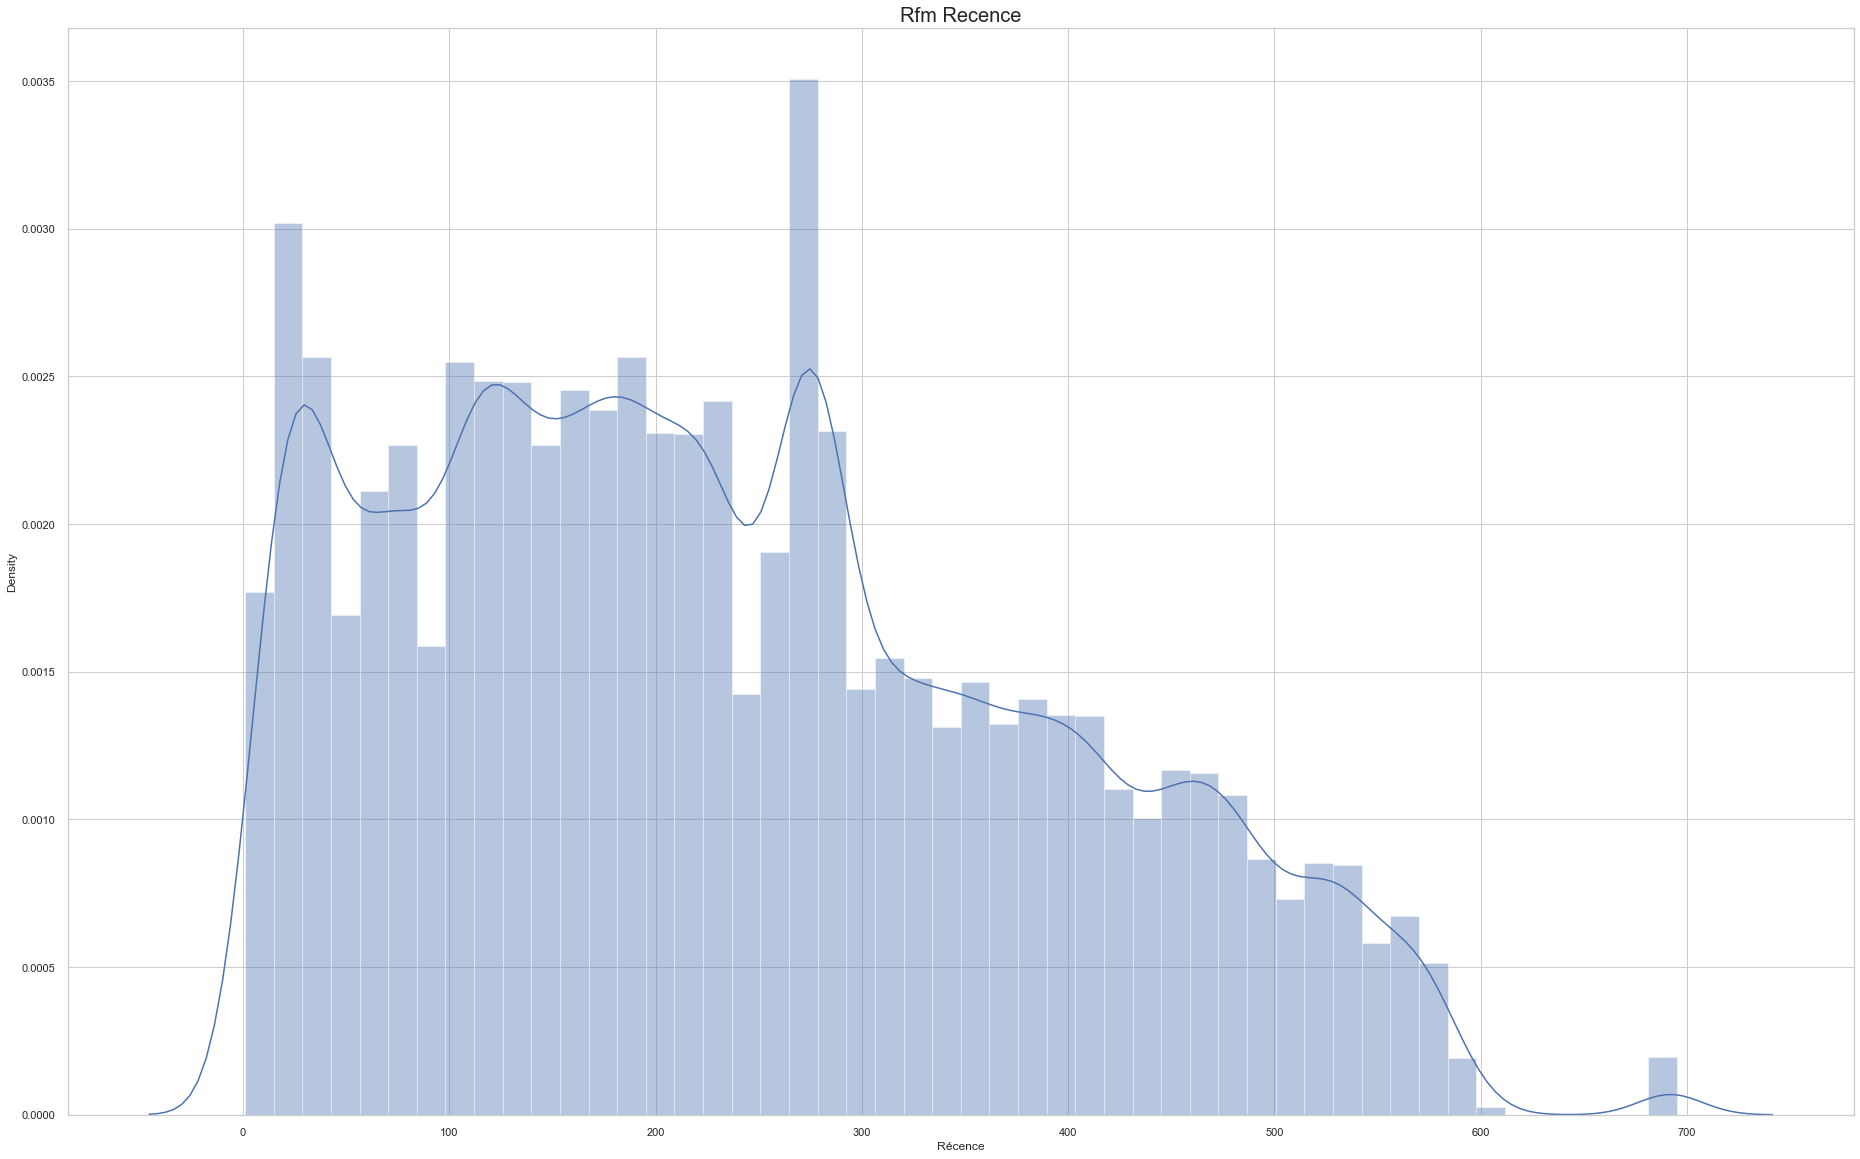

In [215]:
# Rfm Recence :

sns.set_theme(style="whitegrid")

ax = sns.distplot(RFM['Récence'])

ax.set_title("Rfm Recence", fontsize = 20)

# Observations :

On constate que la Récence atteint son maxium, à 300.

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Rfm Frequence')

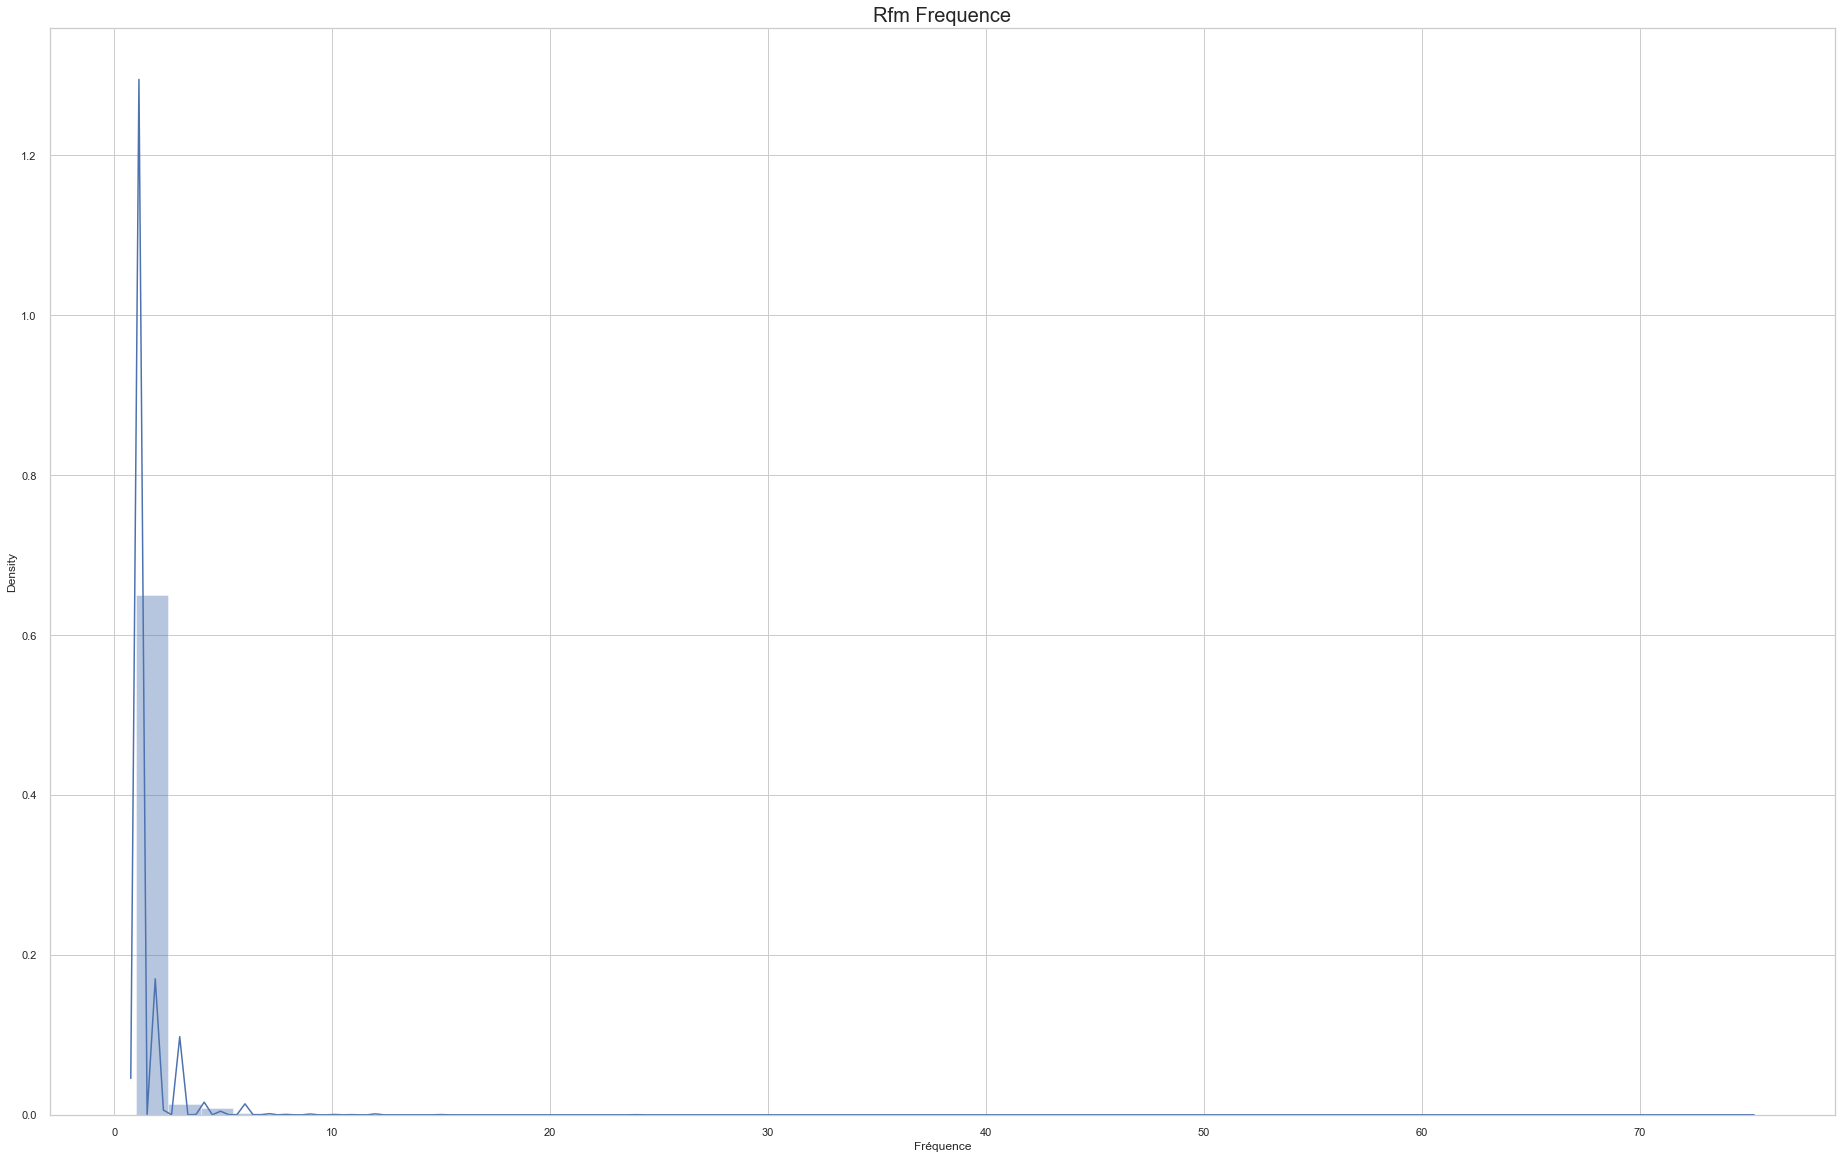

In [216]:
# Rfm Frequence :

sns.set_theme(style="whitegrid")

ax = sns.distplot(RFM['Fréquence'])

ax.set_title("Rfm Frequence", fontsize = 20)

/Users/sylvaincarlevato/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Rfm Montant')

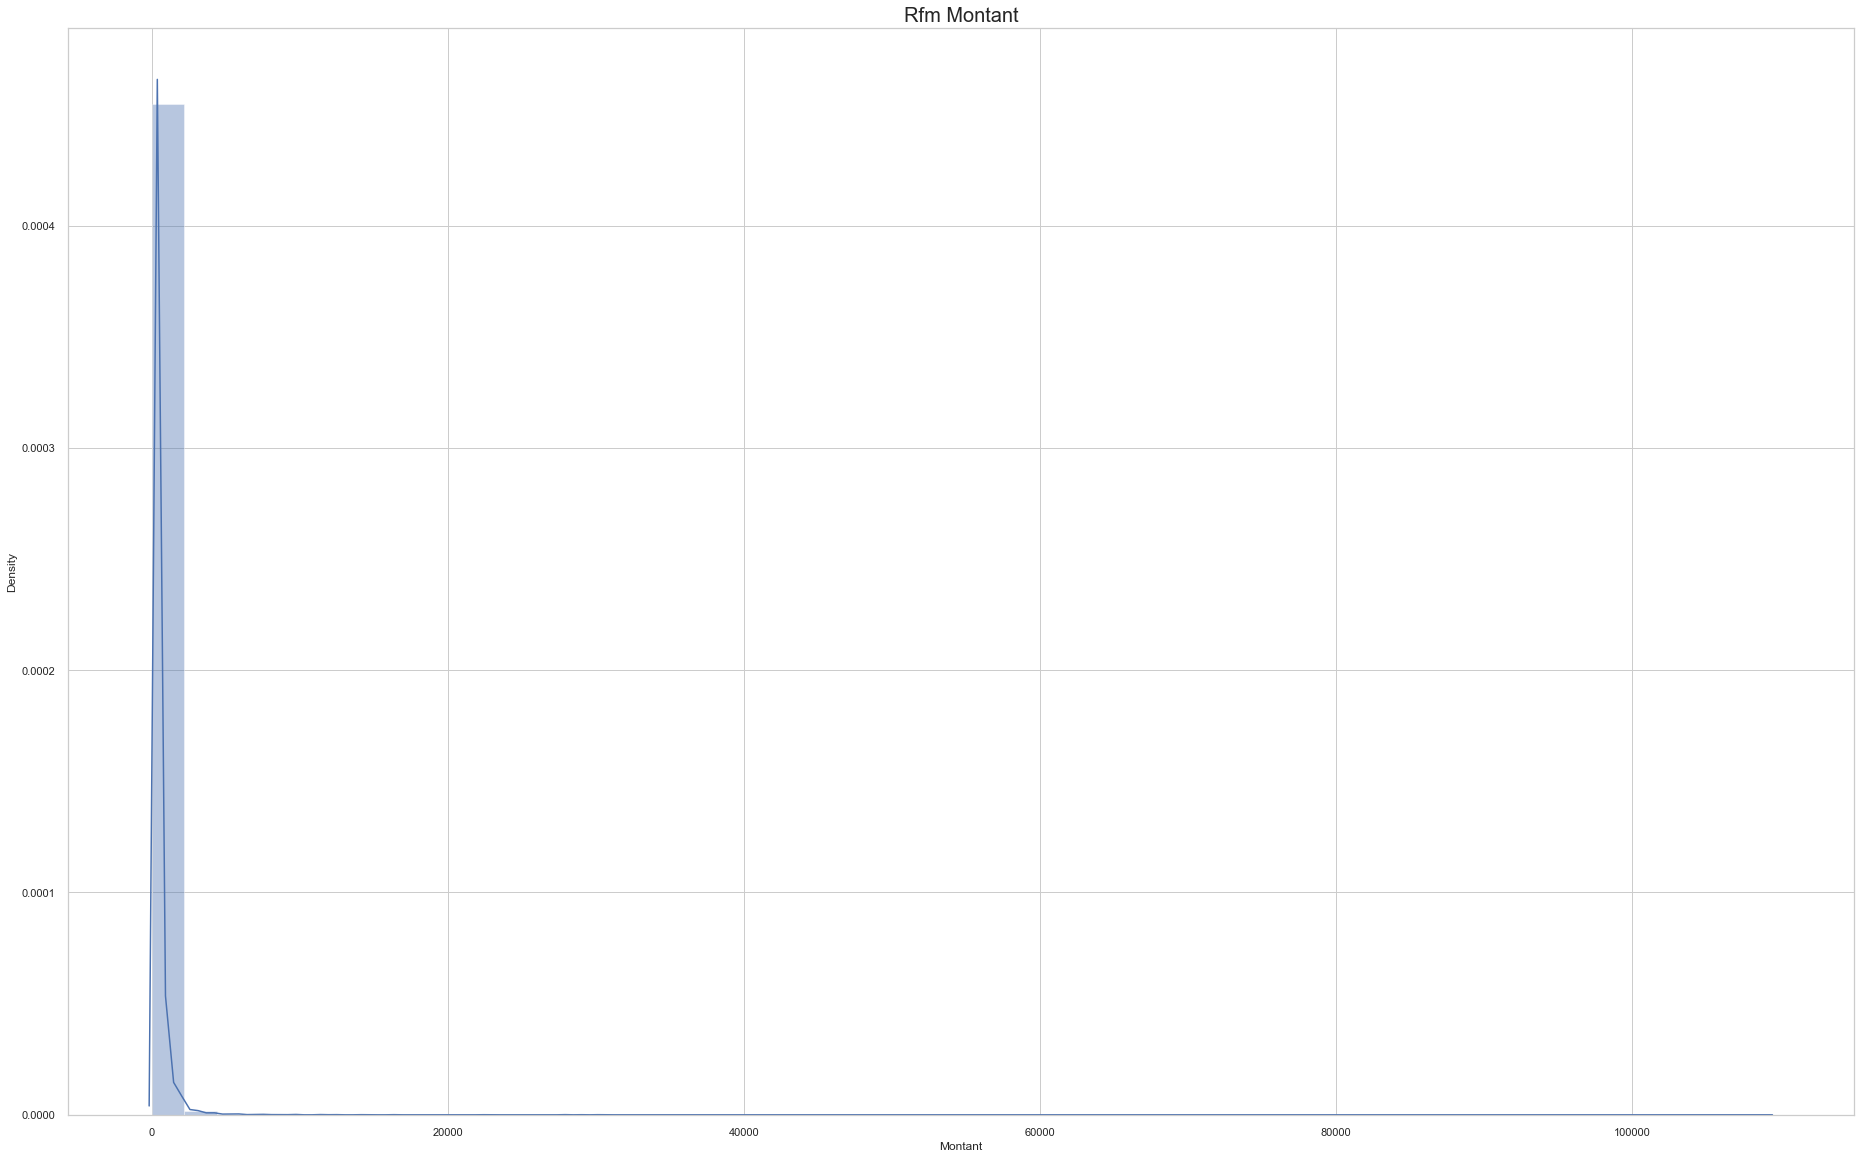

In [217]:
# Rfm Montant :

sns.set_theme(style="whitegrid")

ax = sns.distplot(RFM['Montant'])

ax.set_title("Rfm Montant", fontsize = 20)

# BOXPLOT :

Text(0.5, 1.0, 'Boxplot de Récence')

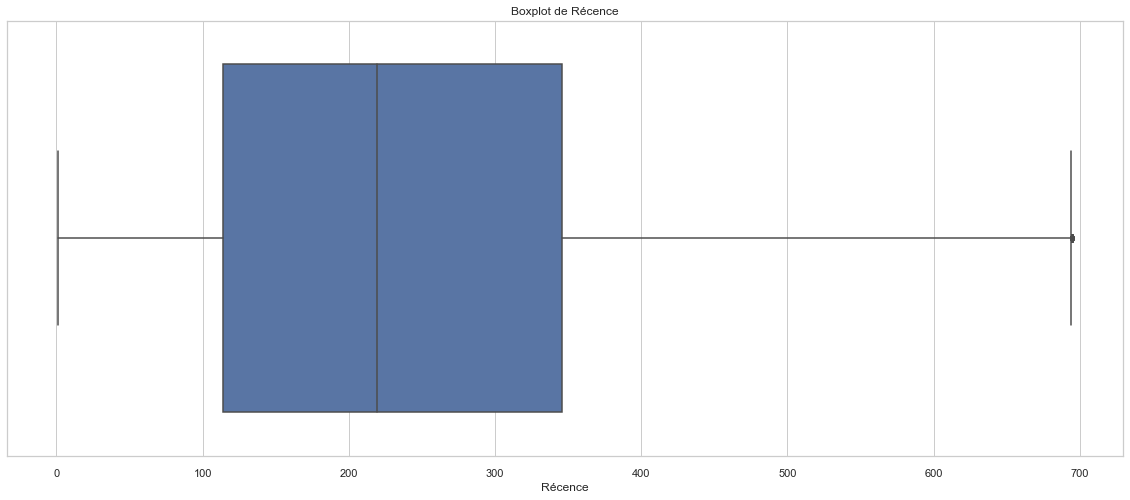

In [218]:
# RFM Récence :

plt.figure(figsize=(20, 8))

sns.boxplot(x='Récence', data=RFM)

plt.title('Boxplot de Récence')

# Interprétation :

La Récence est comprise entre 100 et 350.

Text(0.5, 1.0, 'Boxplot de Fréquence')

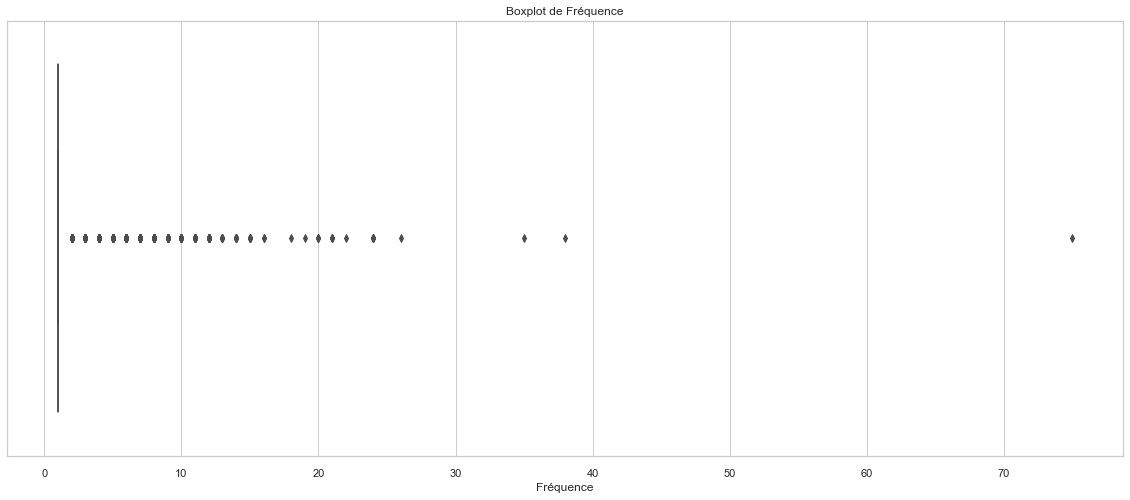

In [219]:
# RFM Fréquence :

plt.figure(figsize=(20, 8))

sns.boxplot(x='Fréquence', data=RFM)

plt.title('Boxplot de Fréquence')

Text(0.5, 1.0, 'Boxplot de Montant')

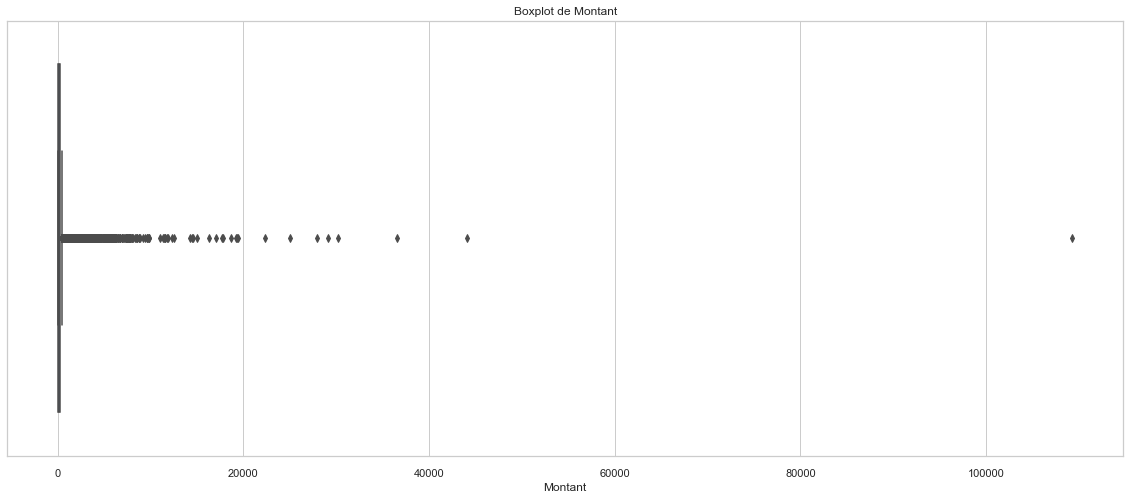

In [220]:
# RFM Montant :

plt.figure(figsize=(20, 8))

sns.boxplot(x='Montant', data=RFM)

plt.title('Boxplot de Montant')

# Fusion "ALL FEATURES / RFM" :

In [221]:
# Visualisation :

datasetfinal.head(10)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.9,1.0,8.0,5.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,111.0,0.1,129.9,5.0,1.0,1.0,1.0,1.0,129.90,12.00,fadbb3709178fc513abc1b2670aa1ad2,7787,Cajamar,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.2,1.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,114.0,0.3,18.9,4.0,1.0,1.0,1.0,1.0,18.90,8.29,4cb282e167ae9234755102258dd52ee8,6053,Osasco,SP
2,0000f46a3911fa3c0805444483337064,1.0,86.2,1.0,8.0,3.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,537.0,0.2,69.0,3.0,1.0,1.0,1.0,1.0,69.00,17.22,9b3932a6253894a02c1df9d19004239f,88115,Sao jose,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.6,1.0,4.0,4.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,321.0,0.4,26.0,4.0,1.0,1.0,1.0,1.0,25.99,17.63,914991f0c02ef0843c0e7010c819d642,66812,Belem,PA
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.9,1.0,6.0,5.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,288.0,0.1,180.0,5.0,1.0,1.0,1.0,1.0,180.00,16.89,47227568b10f5f58a524a75507e6992c,18040,Sorocaba,SP
5,0004bd2a26a76fe21f786e4fbd80607f,1.0,167.0,1.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,146.0,0.1,154.0,4.0,1.0,1.0,1.0,1.0,154.00,12.98,4a913a170c26e3c8052ed0202849b5a8,5036,Sao paulo,SP
6,00050ab1314c0e55a6ca13cf7181fecf,1.0,35.4,1.0,1.0,4.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,131.0,0.2,28.0,4.0,1.0,1.0,1.0,1.0,27.99,7.39,d2509c13692836fc0449e88cf9eb4858,13084,Campinas,SP
7,00053a61a98854899e70ed204dd4bafe,1.0,419.2,1.0,3.0,1.0,16.0,0.0,0.0,0.0,1.0,2.0,2.0,182.0,0.1,382.0,1.0,2.0,2.0,2.0,1.5,191.00,18.59,a81ebb9b32f102298c0c89635b4b3154,80410,Curitiba,PR
8,0005e1862207bf6ccc02e4228effd9a0,1.0,150.1,1.0,3.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,543.0,0.1,135.0,4.0,1.0,1.0,1.0,1.0,135.00,15.12,3b37fb626fdf46cd99d37ec62afa88ff,25966,Teresopolis,RJ
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1.0,129.8,1.0,4.0,1.0,54.0,0.0,0.0,0.0,1.0,1.0,1.0,170.0,0.2,104.9,1.0,1.0,1.0,1.0,1.0,104.90,24.86,c59e8ff99836e90d8b457d4122dc34e9,65060,Sao luis,MA


In [222]:
# Visualisation :

RFM.head(10)

,Récence,Fréquence,Montant
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19
0000f46a3911fa3c0805444483337064,537,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62
0004aac84e0df4da2b147fca70cf8255,288,1,196.89
0004bd2a26a76fe21f786e4fbd80607f,146,1,166.98
00050ab1314c0e55a6ca13cf7181fecf,132,1,35.38
00053a61a98854899e70ed204dd4bafe,183,2,838.36
0005e1862207bf6ccc02e4228effd9a0,543,1,150.12


In [223]:
# Dataset Finale :

datacore = pd.merge(datasetfinal, RFM, how="right", on="customer_unique_id")
datacore.head(10)

,customer_unique_id,nb_orders,total_spend,mean_payment_sequential,mean_payment_installments,mean_review_score,mean_delivery_days,fashion_clothing_accessories,groceries_food_drink,home_furniture,other,total_items,mean_nb_items,order_mean_delay,freight_ratio,mean_price_order,note_review_mean,nb_review,nbr_commandes,nbr_articles,nbr_articles_mean,basket_mean,payment_port_mean,customer_id,customer_zip_code_prefix,customer_city,customer_state,Récence,Fréquence,Montant
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.9,1.0,8.0,5.0,6.0,0.0,0.0,1.0,0.0,1.0,1.0,111.0,0.1,129.9,5.0,1.0,1.0,1.0,1.0,129.90,12.00,fadbb3709178fc513abc1b2670aa1ad2,7787,Cajamar,SP,112,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.2,1.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,1.0,114.0,0.3,18.9,4.0,1.0,1.0,1.0,1.0,18.90,8.29,4cb282e167ae9234755102258dd52ee8,6053,Osasco,SP,115,1,27.19
2,0000f46a3911fa3c0805444483337064,1.0,86.2,1.0,8.0,3.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,537.0,0.2,69.0,3.0,1.0,1.0,1.0,1.0,69.00,17.22,9b3932a6253894a02c1df9d19004239f,88115,Sao jose,SC,537,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.6,1.0,4.0,4.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,321.0,0.4,26.0,4.0,1.0,1.0,1.0,1.0,25.99,17.63,914991f0c02ef0843c0e7010c819d642,66812,Belem,PA,321,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.9,1.0,6.0,5.0,13.0,0.0,0.0,0.0,1.0,1.0,1.0,288.0,0.1,180.0,5.0,1.0,1.0,1.0,1.0,180.00,16.89,47227568b10f5f58a524a75507e6992c,18040,Sorocaba,SP,288,1,196.89
5,0004bd2a26a76fe21f786e4fbd80607f,1.0,167.0,1.0,8.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,146.0,0.1,154.0,4.0,1.0,1.0,1.0,1.0,154.00,12.98,4a913a170c26e3c8052ed0202849b5a8,5036,Sao paulo,SP,146,1,166.98
6,00050ab1314c0e55a6ca13cf7181fecf,1.0,35.4,1.0,1.0,4.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,131.0,0.2,28.0,4.0,1.0,1.0,1.0,1.0,27.99,7.39,d2509c13692836fc0449e88cf9eb4858,13084,Campinas,SP,132,1,35.38
7,00053a61a98854899e70ed204dd4bafe,1.0,419.2,1.0,3.0,1.0,16.0,0.0,0.0,0.0,1.0,2.0,2.0,182.0,0.1,382.0,1.0,2.0,2.0,2.0,1.5,191.00,18.59,a81ebb9b32f102298c0c89635b4b3154,80410,Curitiba,PR,183,2,838.36
8,0005e1862207bf6ccc02e4228effd9a0,1.0,150.1,1.0,3.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,1.0,543.0,0.1,135.0,4.0,1.0,1.0,1.0,1.0,135.00,15.12,3b37fb626fdf46cd99d37ec62afa88ff,25966,Teresopolis,RJ,543,1,150.12
9,0005ef4cd20d2893f0d9fbd94d3c0d97,1.0,129.8,1.0,4.0,1.0,54.0,0.0,0.0,0.0,1.0,1.0,1.0,170.0,0.2,104.9,1.0,1.0,1.0,1.0,1.0,104.90,24.86,c59e8ff99836e90d8b457d4122dc34e9,65060,Sao luis,MA,170,1,129.76


In [224]:
# Localisation des NaN :

datacore.isnull().sum()

customer_unique_id              0
nb_orders                       0
total_spend                     0
mean_payment_sequential         0
mean_payment_installments       0
mean_review_score               0
mean_delivery_days              0
fashion_clothing_accessories    0
groceries_food_drink            0
home_furniture                  0
other                           0
total_items                     0
mean_nb_items                   0
order_mean_delay                0
freight_ratio                   0
mean_price_order                0
note_review_mean                0
nb_review                       0
nbr_commandes                   0
nbr_articles                    0
nbr_articles_mean               0
basket_mean                     0
payment_port_mean               0
customer_id                     0
customer_zip_code_prefix        0
customer_city                   0
customer_state                  0
Récence                         0
Fréquence                       0
Montant       

# Analyse Multivariée :

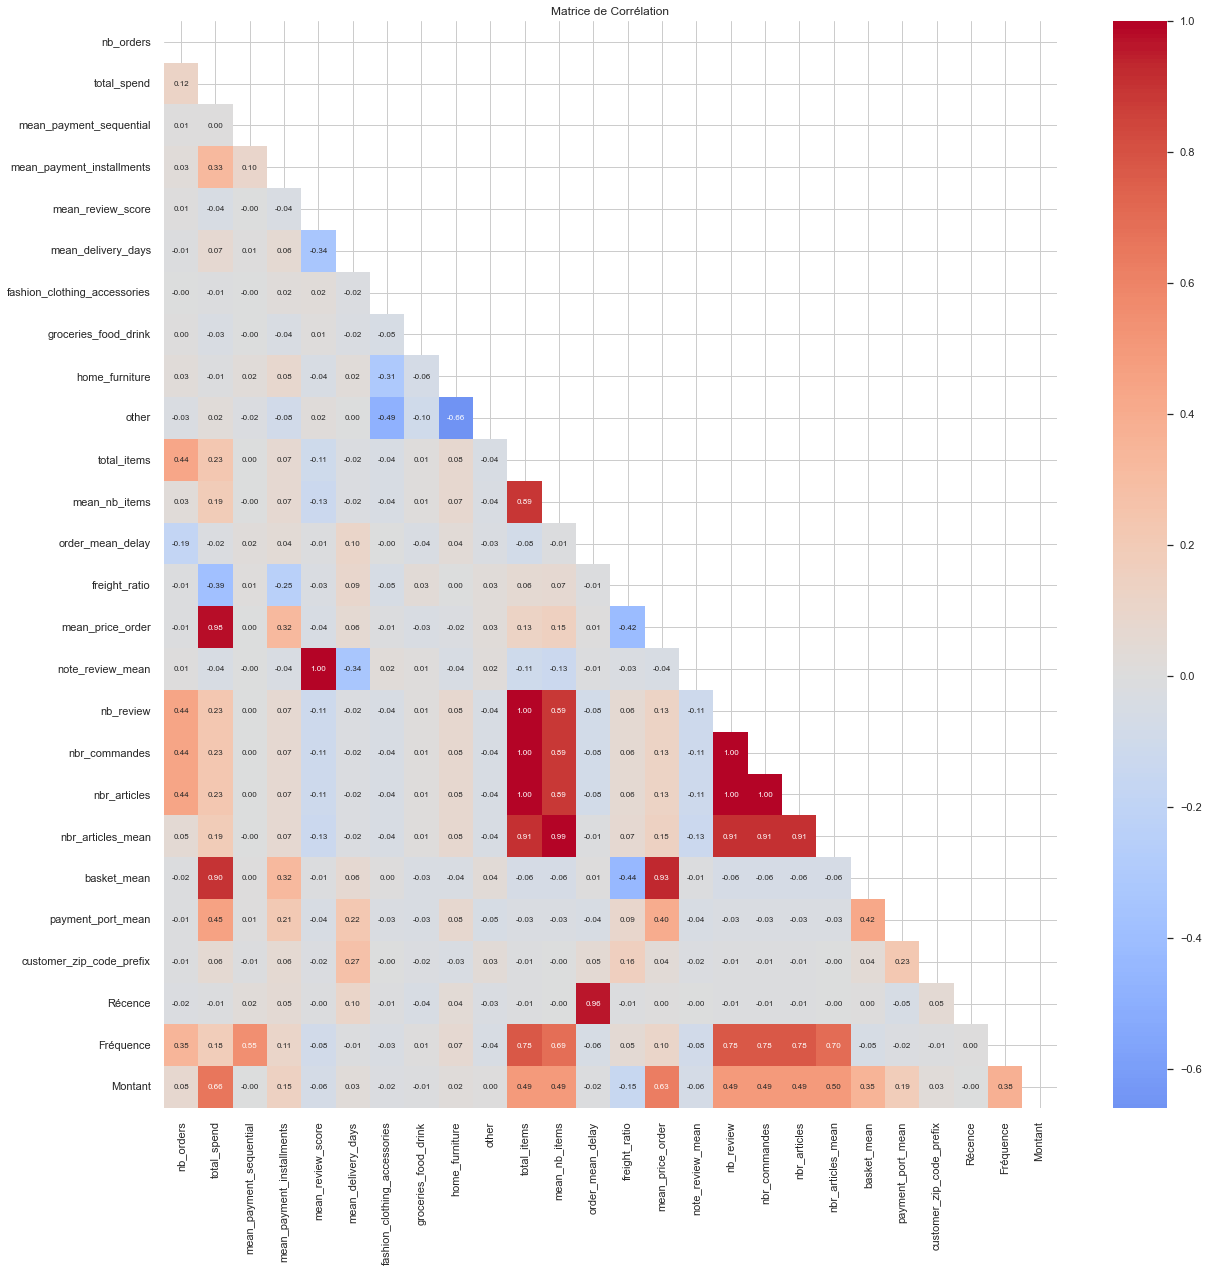

In [225]:
# Heatmap de Corrélation :

sns.set_style("whitegrid")
corr = datacore.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title("Matrice de Corrélation")
plt.grid()
plt.show()

# Observations :

- Les Variables "mean_review_score" et "total_spend" sont très corrélées.
- Les Variables "mean_nb_items" et "total_items" sont très corrélées.
- Les Variables "nbr_articles_mean" et "order_mean_delay" sont très corrélées.

# Sauvegarde du jeu de données nettoyé :

In [226]:
# Export des Données Nettoyées Datacore :

datacore.to_csv('DATACORE.csv')